# 📊 Análisis Exploratorio de Datos (EDA)

Este cuaderno tiene como objetivo realizar un Análisis Exploratorio de Datos (EDA, por sus siglas en inglés), un paso esencial en cualquier proyecto de ciencia de datos. A través de esta exploración, se pretende comprender la estructura, patrones, relaciones y posibles anomalías en el conjunto de datos. El propósito final es obtener una visión profunda que guíe futuras decisiones de modelado, limpieza y preparación de datos.

A lo largo del cuaderno encontrarás secciones comentadas con introducciones claras y conclusiones breves que te ayudarán a seguir la lógica del análisis de manera estructurada y profesional.


Exploración gráfica y estadística de las campañas de márketing para identificar patrones relevantes.

En esta sección se explorará el  Análisis Exploratorio de Datos (EDA)

El objetivo es analizar los aspectos relevantes relacionados con esta parte del análisis, entender su importancia y cómo contribuye al entendimiento general del conjunto de datos.

## Importamos las bibliotecas necesarias

*En este cuaderno, importaremos diversas bibliotecas de Python que nos ayudarán en tareas de análisis de datos, visualización, modelado estadístico y manipulación de datos geoespaciales. Estas herramientas son fundamentales para realizar un preprocesamiento completo y efectivo de los datos de marketing.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from difflib import get_close_matches
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.tsa.seasonal import seasonal_decompose

### 📂 <u> Carga de los datos y exploración inicial del Dataset<u>

En esta sección realizaremos la importación y carga inicial del conjunto de datos de campañas de marketing. Este paso es fundamental ya que constituye la base para todas las operaciones posteriores de análisis y preprocesamiento.

La carga de datos incluye la lectura del archivo CSV fuente, la identificación del formato de los datos, y una primera inspección de la estructura general del conjunto de datos, lo que nos permitirá planificar los pasos de limpieza y transformación necesarios.

In [2]:
df = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\marketing\data\marketingcampaigns_clean.csv')

In [3]:
df.head(5)

campaign_name  start_date    end_date  \
0             De-engineered analyzing task-force  2023-02-15  2024-04-22   
1  Balanced solution-oriented Local Area Network  2022-12-20  2023-10-11   
2              Distributed real-time methodology  2022-09-26  2023-09-27   
3            Front-line executive infrastructure  2023-07-07  2024-05-15   
4         Upgradable transitional data-warehouse  2023-06-29  2023-12-13   

     budget   roi          type target_audience    channel  conversion_rate  \
0  17712.98  0.74         email             B2C  promotion             0.66   
1  84643.10  0.37       podcast             B2B       paid             0.28   
2  14589.75  0.47       webinar             B2B    organic             0.19   
3  39291.90  0.30  social media             B2B  promotion             0.81   
4  75569.28  0.59  social media             B2C   referral             0.67   

     revenue  ...  budget_category  conversion_performance profit_margin  \
0  516609.10  ...       low budget                    Alta      0.965713   
1  458227.42  ...      high budget                    Baja      0.815281   
2   89958.73  ...       low budget                    Baja      0.837817   
3   47511.35  ...    medium budget                    Alta      0.173000   
4  558302.11  ...      high budget                    Alta      0.864644   

   revenue_per_day  is_profitable is_high_performing  is_holiday_campaign  \
0      1195.854398              1                  1                    0   
1      1553.313288              1                  1                    1   
2       245.788880              1                  1                    0   
3       151.793450              1                  1                    0   
4      3343.126407              1                  1                    0   

   is_long_campaign  is_digital cost_per_conversion  
0                 1           0          268.378485  
1                 0           1         3022.967857  
2                 1           1          767.881579  
3                 0           0          485.085185  
4                 0           0         1127.899701  

[5 rows x 36 columns]

In [4]:
desc = df.describe()

pd.options.display.float_format = '{:,.2f}'.format

desc

budget    roi  conversion_rate    revenue  campaign_duration  \
count     887.00 885.00           887.00     887.00             887.00   
mean   55,322.00   0.54             0.54 488,541.11             363.48   
std    26,116.87   0.26             0.27 287,762.43             154.59   
min   -10,000.00  -0.20             0.00       0.00             -60.00   
25%    33,316.04   0.32             0.30 249,437.00             246.00   
50%    54,468.41   0.54             0.53 482,042.70             363.00   
75%    78,214.93   0.77             0.77 746,017.98             474.00   
max   149,725.25   0.99             1.50 999,712.49             716.00   

       calculated_roi  net_profit  start_month  start_quarter  start_year  \
count          887.00      887.00       887.00         887.00      887.00   
mean         1,021.73  433,219.11         6.44           2.48    2,022.59   
std            885.26  285,837.21         3.40           1.09        0.50   
min           -100.00  -99,725.25         1.00           1.00    2,022.00   
25%            358.25  191,714.53         3.00           1.00    2,022.00   
50%            771.82  430,616.01         7.00           3.00    2,023.00   
75%          1,507.01  683,623.79         9.00           3.00    2,023.00   
max          3,936.40  965,199.63        12.00           4.00    2,025.00   

       ...  end_quarter  end_year  profit_margin  revenue_per_day  \
count  ...       887.00    887.00         887.00           887.00   
mean   ...         2.62  2,023.55          -0.00         1,980.74   
std    ...         1.11      0.50          19.26         3,991.12   
min    ...         1.00  2,022.00        -571.76             0.00   
25%    ...         2.00  2,023.00           0.78           673.78   
50%    ...         3.00  2,024.00           0.89         1,310.92   
75%    ...         4.00  2,024.00           0.94         2,149.28   
max    ...         4.00  2,025.00           0.98        81,467.23   

       is_profitable  is_high_performing  is_holiday_campaign  \
count         887.00              887.00               887.00   
mean            0.95                0.95                 0.25   
std             0.22                0.22                 0.43   
min             0.00                0.00                 0.00   
25%             1.00                1.00                 0.00   
50%             1.00                1.00                 0.00   
75%             1.00                1.00                 0.50   
max             1.00                1.00                 1.00   

       is_long_campaign  is_digital  cost_per_conversion  
count            887.00      887.00               887.00  
mean               0.50        0.48             1,428.09  
std                0.50        0.50             1,359.00  
min                0.00        0.00            -1,000.00  
25%                0.00        0.00               595.28  
50%                0.00        0.00               993.29  
75%                1.00        1.00             1,683.31  
max                1.00        1.00             7,709.06  

[8 rows x 21 columns]

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [6]:
# Display information about the DataFrame
df.info()

# Also display first few rows with nice formatting
print("\nSample of the DataFrame:")
print(df.head().to_string(index=True, float_format=lambda x: f"{x:,.2f}"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   campaign_name               887 non-null    object        
 1   start_date                  887 non-null    datetime64[ns]
 2   end_date                    887 non-null    datetime64[ns]
 3   budget                      887 non-null    float64       
 4   roi                         885 non-null    float64       
 5   type                        887 non-null    object        
 6   target_audience             887 non-null    object        
 7   channel                     887 non-null    object        
 8   conversion_rate             887 non-null    float64       
 9   revenue                     887 non-null    float64       
 10  campaign_duration           887 non-null    int64         
 11  calculated_roi              887 non-null    float64       

# <u>📉 Análisis en base a 'canal'

### Canal de Marketing con mayor frecuencia

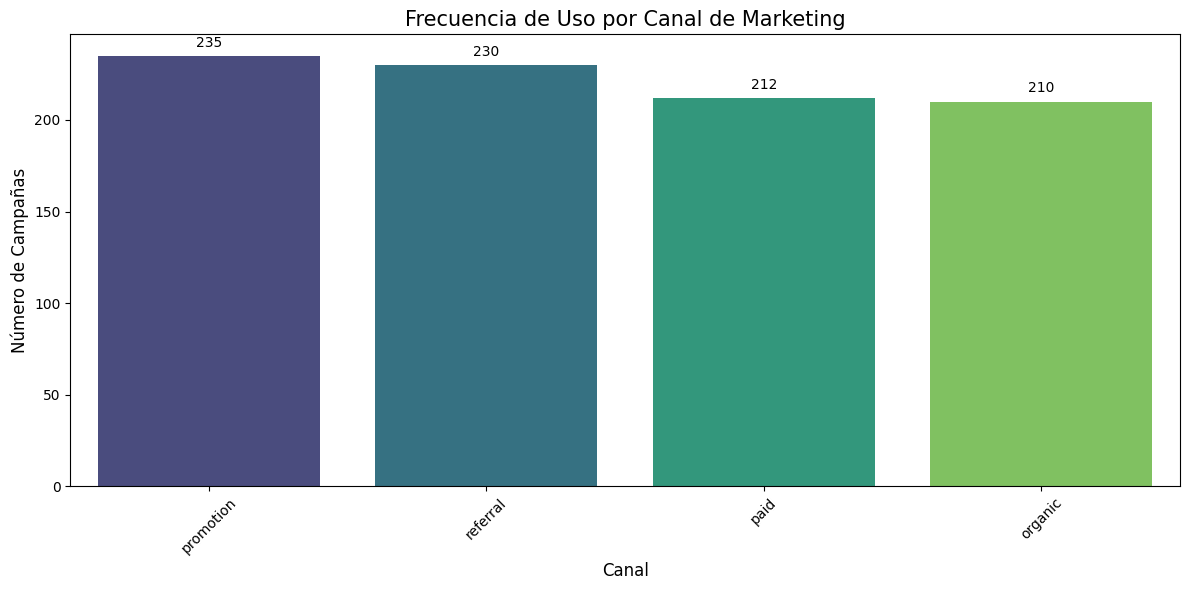

In [7]:
plt.figure(figsize=(12, 6))
channel_counts = df['channel'].value_counts()
ax = sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')
plt.title('Frecuencia de Uso por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Número de Campañas', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(channel_counts.values):
    ax.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

'Promotion' es el canal de Marketing con más frecuencia (221), seguido de 'referral' (211), 'paid' (200) y 'organic' (192)

### Análisis de ROI por canal

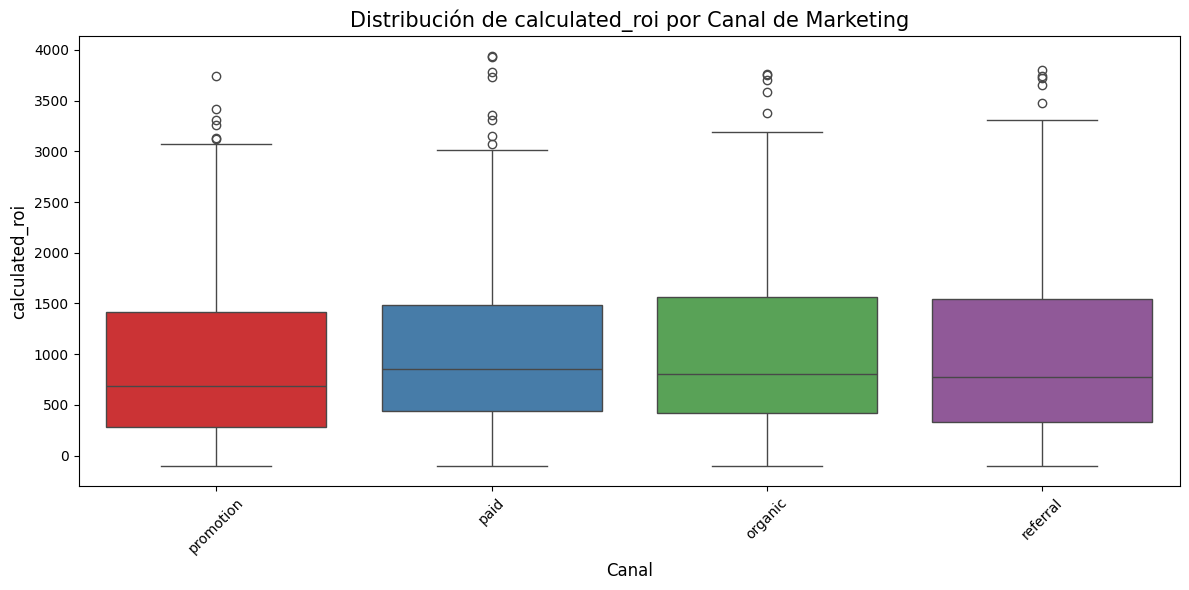

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel', y='calculated_roi', data=df, palette='Set1')
plt.title('Distribución de calculated_roi por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('calculated_roi', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La distribución del ROI es homogenea entre los diferentes canales

### Métricas comparativas por canal

In [9]:
channel_metrics = df.groupby('channel').agg({
    'calculated_roi': 'mean',
    'conversion_rate': 'mean',
    'profit_margin': 'mean',
    'revenue': 'mean',
    'budget': 'mean',
    'campaign_name': 'count'
}).sort_values(by='calculated_roi', ascending=False)

channel_metrics = channel_metrics.rename(columns={'campaign_name': 'num_campaigns'})
channel_metrics = channel_metrics.reset_index()

print("Métricas de Rendimiento por Canal (ordenadas por calculated_roi promedio):")
print(channel_metrics[['channel', 'num_campaigns', 'calculated_roi', 'conversion_rate', 'profit_margin', 'revenue', 'budget']])

Métricas de Rendimiento por Canal (ordenadas por calculated_roi promedio):
     channel  num_campaigns  calculated_roi  conversion_rate  profit_margin  \
0    organic            210        1,055.92             0.53           0.62   
1   referral            230        1,050.90             0.54           0.55   
2       paid            212        1,044.78             0.55          -1.92   
3  promotion            235          941.84             0.53           0.64   

     revenue    budget  
0 524,879.12 56,757.15  
1 466,093.80 51,974.88  
2 504,988.10 55,511.06  
3 463,201.27 57,144.87  


'Paid' es el canal con mayor ROI de media aunqu la distribución es muy pareja entre todos los canales

### Gráfico de barras para ROI promedio

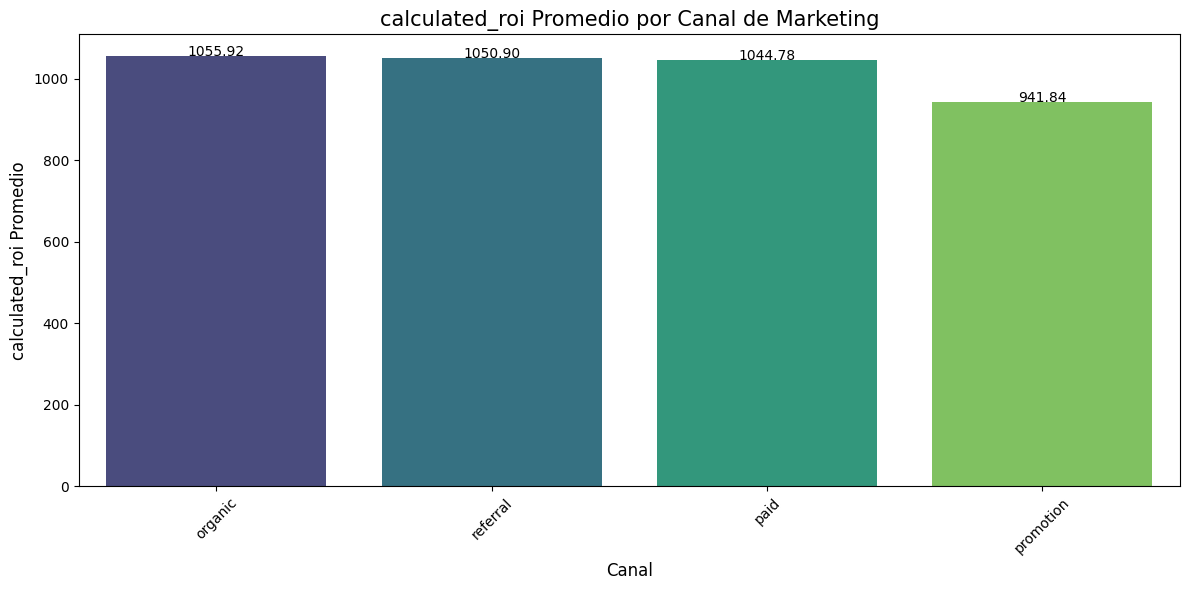

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='channel', y='calculated_roi', data=channel_metrics, palette='viridis')
plt.title('calculated_roi Promedio por Canal de Marketing', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('calculated_roi Promedio', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de calculated_roi
for i, v in enumerate(channel_metrics['calculated_roi']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

El gráfico de barras nos confirma las conclusiones anteriores donde 'paid' es el canal con mayor ROI promedio y donde se puede observar que los cuatro canales fluctúan entre 806,32 y 894,45

### Análisis por tipo de campaña y canal

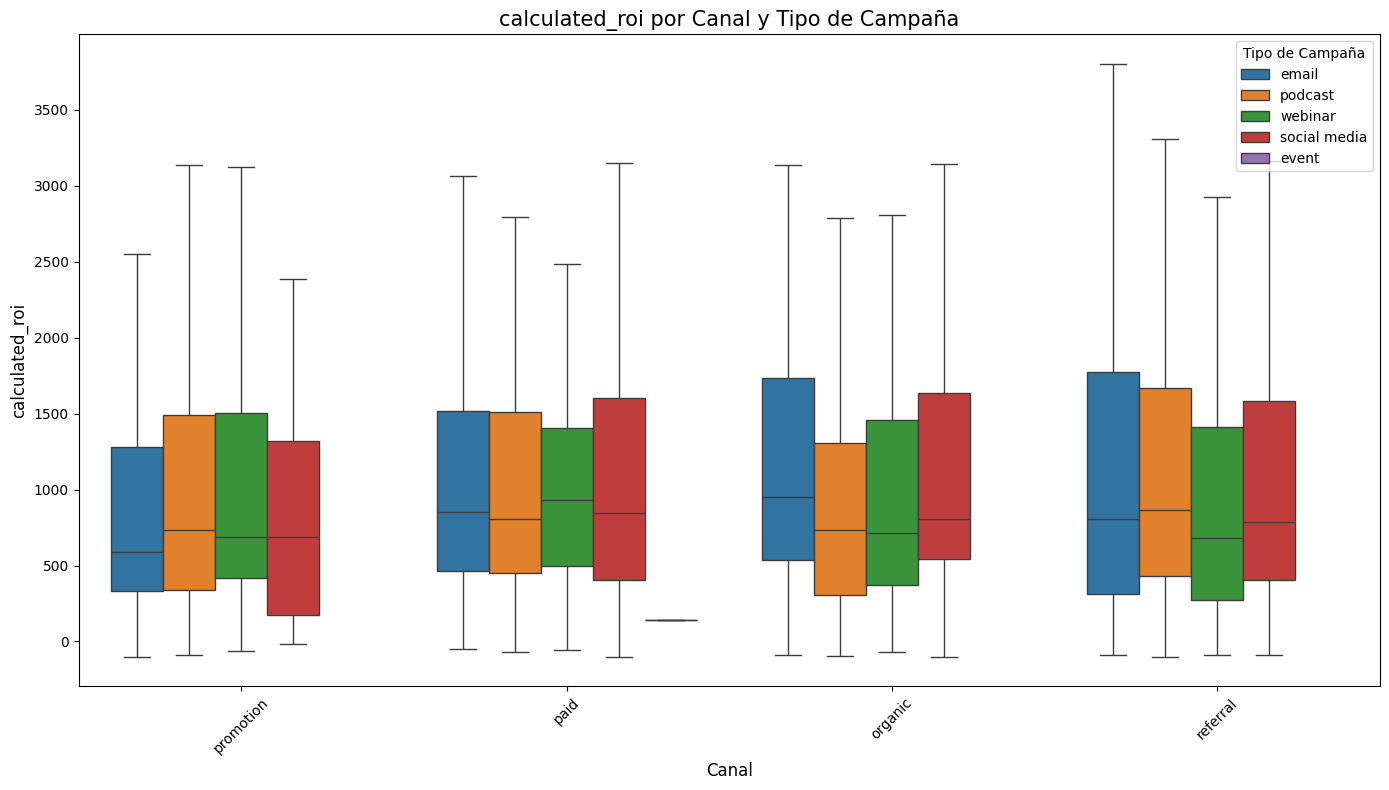

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='channel', y='calculated_roi', hue='type', data=df, showfliers=False)
plt.title('calculated_roi por Canal y Tipo de Campaña', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('calculated_roi', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Campaña', loc='upper right')
plt.tight_layout()
plt.show()

Se confirma la distribución homegenea entre canales en base al ROI pero se observan ligeras diferencias al cruzar los datos con el tipo de campaña. 'Paid' es el que tiene unos datos más estables y homogéneos en base a los tres criterios (el 50% de sus valores se comprenden entre 450 y 1400),  mientras que el resto de canales tienen mayor variabilidad aunque el 50% de todos los valores de todas las categorías se comprende entre un ROI de 300 y de 1500.

### Análisis por audiencia objetivo y canal

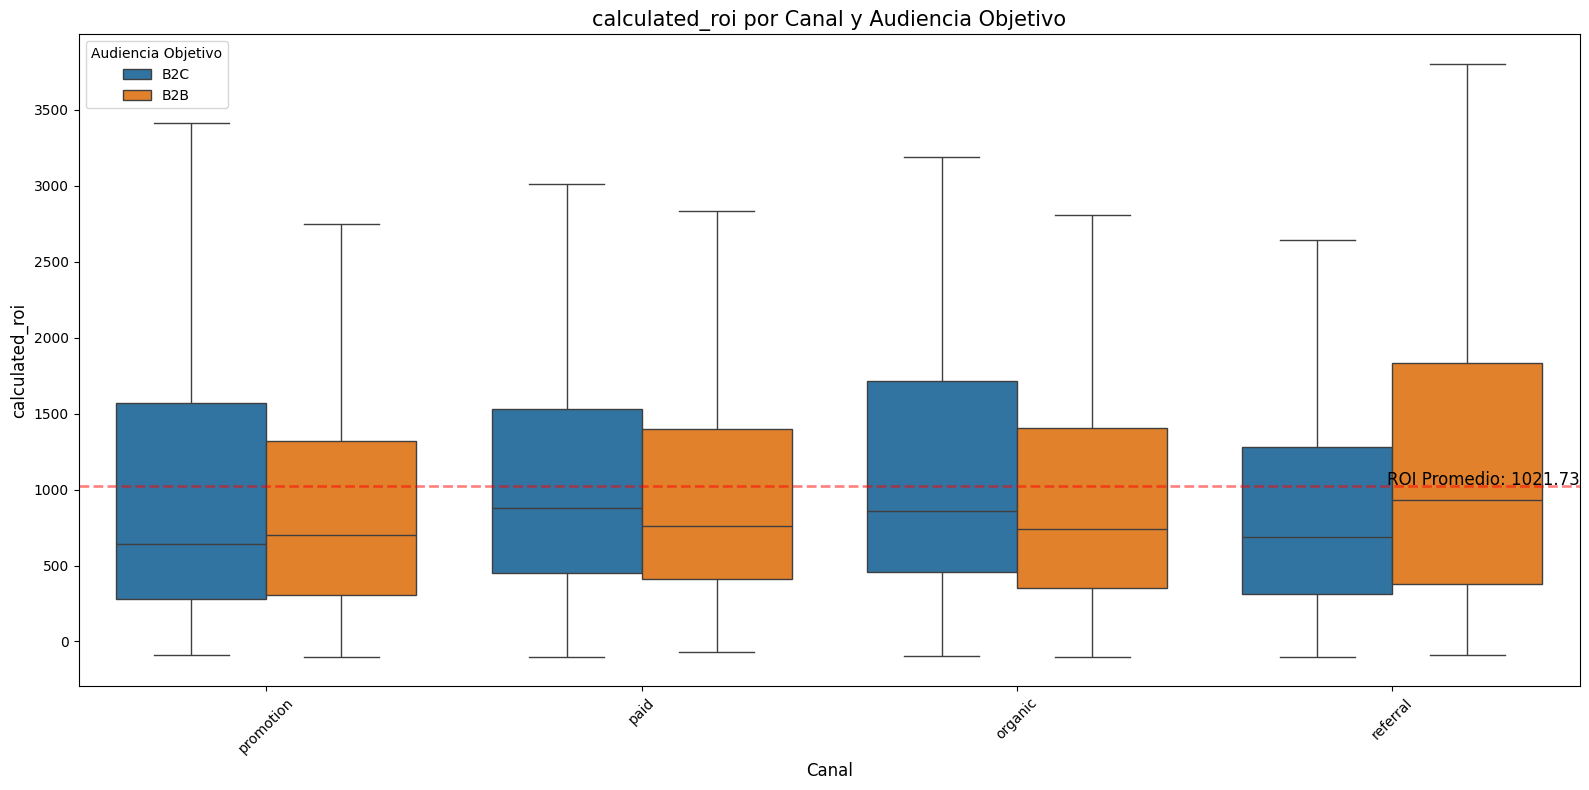

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='channel', y='calculated_roi', hue='target_audience', data=df, showfliers=False)
plt.title('calculated_roi por Canal y Audiencia Objetivo', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('calculated_roi', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Audiencia Objetivo')

# Add horizontal line for average calculated_roi
avg_calculated_roi = df['calculated_roi'].mean()
plt.axhline(y=avg_calculated_roi, color='red', linestyle='--', alpha=0.5, linewidth=1.9, label=f'calculated_roi Promedio: {avg_calculated_roi:.2f}')

# Mostrar el valor al lado de la línea
plt.text(
    x=1,  # Posición horizontal en coordenadas del gráfico (0 a 1)
    y=avg_calculated_roi + 0.01 * avg_calculated_roi,  # Levemente arriba de la línea
    s=f'ROI Promedio: {avg_calculated_roi:.2f}',
    color='black',
    fontsize=12,
    ha='right',
    transform=plt.gca().get_yaxis_transform()  # Usa la escala de ejes para posicionar correctamente
)

plt.tight_layout()
plt.show()

Observamos en todos los canales que cuando cruzamos los datos con la audiencia objetivo, el 25% de los valores más altos de cada canal están muy dispersos. Esto provoca que la media general (849,42) sea superior a las medias individuales de cada canal en base a la audiencia objetivo. Lo cual significa que más del 50% de la audiencia objetivo por canal está por debajo de la media general.

### Gráfico de dispersión para visualizar relación entre presupuesto y ROI por canal

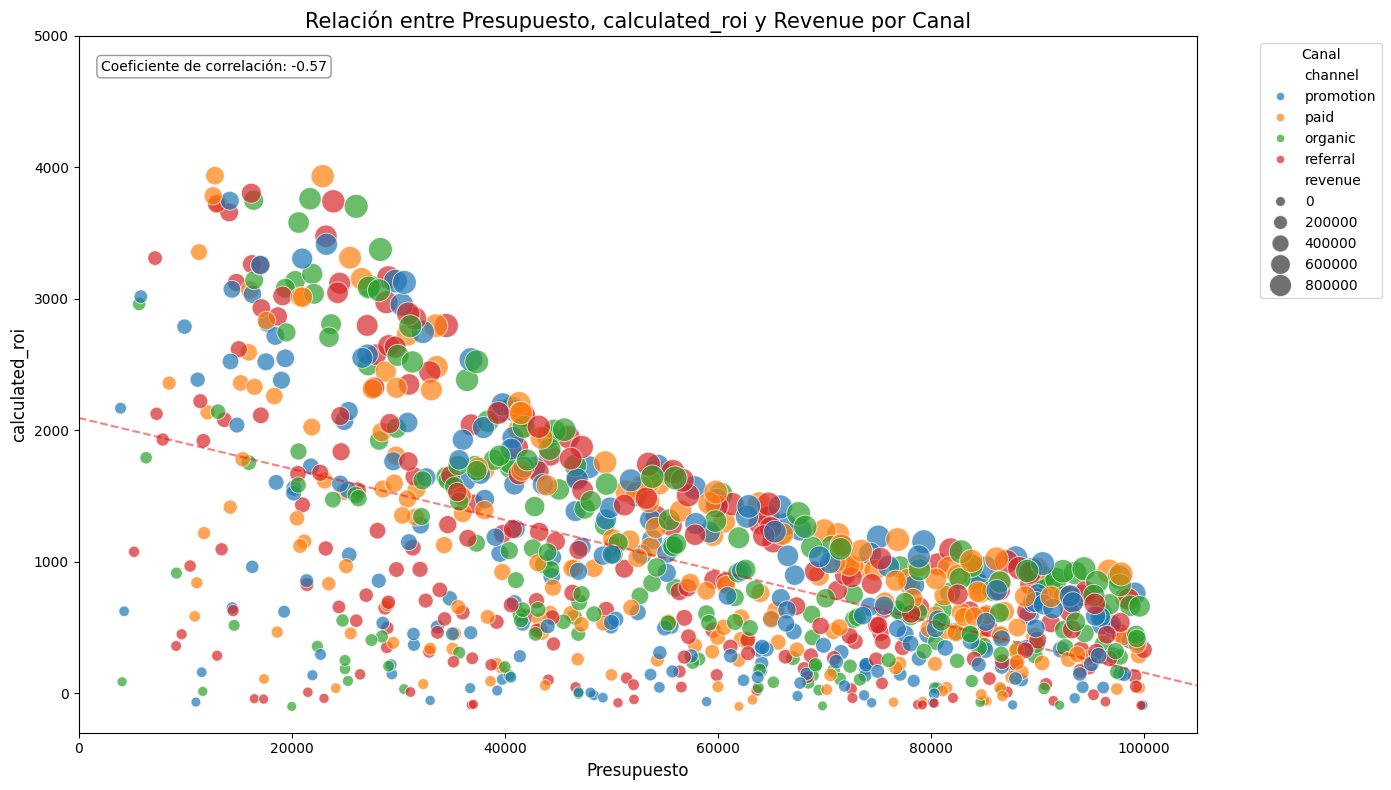

In [13]:
from scipy import stats

plt.figure(figsize=(14, 8))

# Create the scatter plot
sns.scatterplot(x='budget', y='calculated_roi', hue='channel', size='revenue', 
                sizes=(50, 300), alpha=0.7, data=df)

# Set specific axis limits as requested
plt.xlim(0, 105000)
plt.ylim(-300, 5000)

plt.title('Relación entre Presupuesto, calculated_roi y Revenue por Canal', fontsize=15)
plt.xlabel('Presupuesto', fontsize=12)
plt.ylabel('calculated_roi', fontsize=12)
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add regression line for the overall trend and calculate correlation
slope, intercept, r_value, p_value, std_err = stats.linregress(df['budget'], df['calculated_roi'])
correlation = np.corrcoef(df['budget'], df['calculated_roi'])[0,1]
x = np.linspace(0, 105000, 100)
y = slope * x + intercept
plt.plot(x, y, 'r--', alpha=0.5, 
         label=f'Tendencia (r={r_value:.2f}, corr={correlation:.2f})')

# Add annotation with correlation coefficient
plt.annotate(f'Coeficiente de correlación: {correlation:.2f}', 
             xy=(0.02, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()


El gráfico de dispersión muestra una ligera tendencia negativa entre el presupuesto y el ROI, con un coeficiente de correlación de -0.13. Esto sugiere que, en términos generales, campañas con mayor presupuesto tienden a tener un ROI ligeramente menor. Sin embargo, esta correlación es débil, lo que indica que el presupuesto no es un determinante principal del ROI.

Observaciones clave:
- Las campañas con presupuestos más pequeños (por debajo de 50,000) presentan una mayor variabilidad en el ROI, con valores que llegan hasta 5,000.
- Las campañas de mayor presupuesto (>75,000) tienden a mostrar un ROI más estable pero generalmente inferior a 2,000.
- No se observan diferencias significativas en la distribución del ROI entre los diferentes canales (paid, organic, promotion y referral).
- El tamaño de los puntos (que representa el revenue) indica que campañas con ROI más alto no necesariamente generan los mayores ingresos.

### Tabla resumen con conclusiones principales

In [14]:
top_channels = channel_metrics.head(3)['channel'].tolist()
bottom_channels = channel_metrics.tail(3)['channel'].tolist()

print("\nCONCLUSIONES PRINCIPALES:")
print(f"- Canal más utilizado: {channel_counts.index[0]} con {channel_counts.values[0]} campañas")
print(f"- Canal con mejor calculated_roi promedio: {channel_metrics.iloc[0]['channel']} ({channel_metrics.iloc[0]['calculated_roi']:.2f})")
print(f"- Canal con mejor tasa de conversión: {channel_metrics.sort_values('conversion_rate', ascending=False).iloc[0]['channel']} ({channel_metrics.sort_values('conversion_rate', ascending=False).iloc[0]['conversion_rate']:.2f})")
print(f"- Los tres canales con mejor calculated_roi: {', '.join(top_channels)}")
print(f"- Los tres canales con menor calculated_roi: {', '.join(bottom_channels)}")


CONCLUSIONES PRINCIPALES:
- Canal más utilizado: promotion con 235 campañas
- Canal con mejor calculated_roi promedio: organic (1055.92)
- Canal con mejor tasa de conversión: paid (0.55)
- Los tres canales con mejor calculated_roi: organic, referral, paid
- Los tres canales con menor calculated_roi: referral, paid, promotion


# <u>📊 Análisis de Ingresos y Conversión por Tipo de Campaña

### Análisis de ingresos promedio y tasa de conversión por tipo de campaña

In [15]:
# 1. Agrupamos datos por tipo de campaña
campaign_metrics = df.groupby('type').agg({
    'revenue': 'mean',
    'conversion_rate': 'mean', 
    'calculated_roi': 'mean',
    'net_profit': 'mean',
    'campaign_name': 'count'
}).reset_index().rename(columns={'campaign_name': 'count'})

# Ordenamos por ingresos en orden descendente
campaign_metrics_by_revenue = campaign_metrics.sort_values('revenue', ascending=False)

### Gráfico de barras para ingresos promedio por tipo de campaña

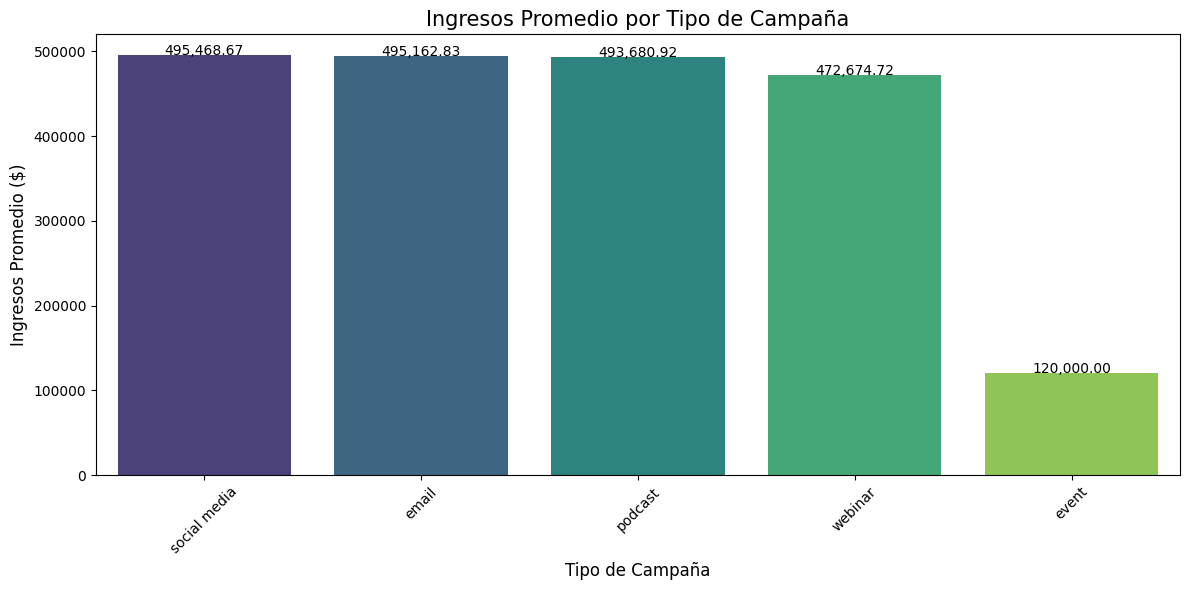

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='revenue', data=campaign_metrics_by_revenue, palette='viridis')
plt.title('Ingresos Promedio por Tipo de Campaña', fontsize=15)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de ingresos
for i, v in enumerate(campaign_metrics_by_revenue['revenue']):
    plt.text(i, v + 0.01, f'{v:,.2f}', ha='center')

plt.tight_layout()
plt.show()

Este gráfico muestra la homogeneidad de los ingresos promedio en base al tipo de campaña. A excepción de 'event', el resto de tipo de campañas obtienen unos beneficios medios de entre 450.000 y 480.000

### Gráfico de barras para ingresos promedio por tipo de campaña

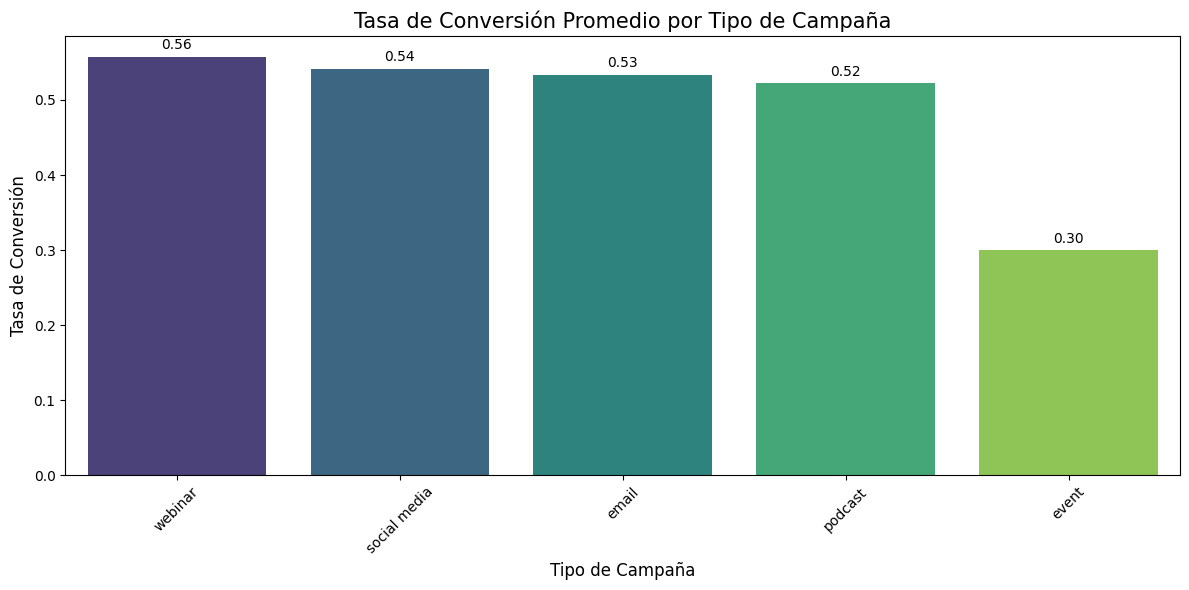

In [17]:
campaign_metrics_by_conv = campaign_metrics.sort_values('conversion_rate', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='conversion_rate', data=campaign_metrics_by_conv, palette='viridis')
plt.title('Tasa de Conversión Promedio por Tipo de Campaña', fontsize=15)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de tasa de conversión
for i, v in enumerate(campaign_metrics_by_conv['conversion_rate']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

Al igual que en el gráfico anterior, la homogeneidad se ve reflejada también en base a la tasa de conversión, manteniendo los valores entre 0,52 y 0,55

### Diagrama de dispersión para correlación entre ingresos y tasa de conversión

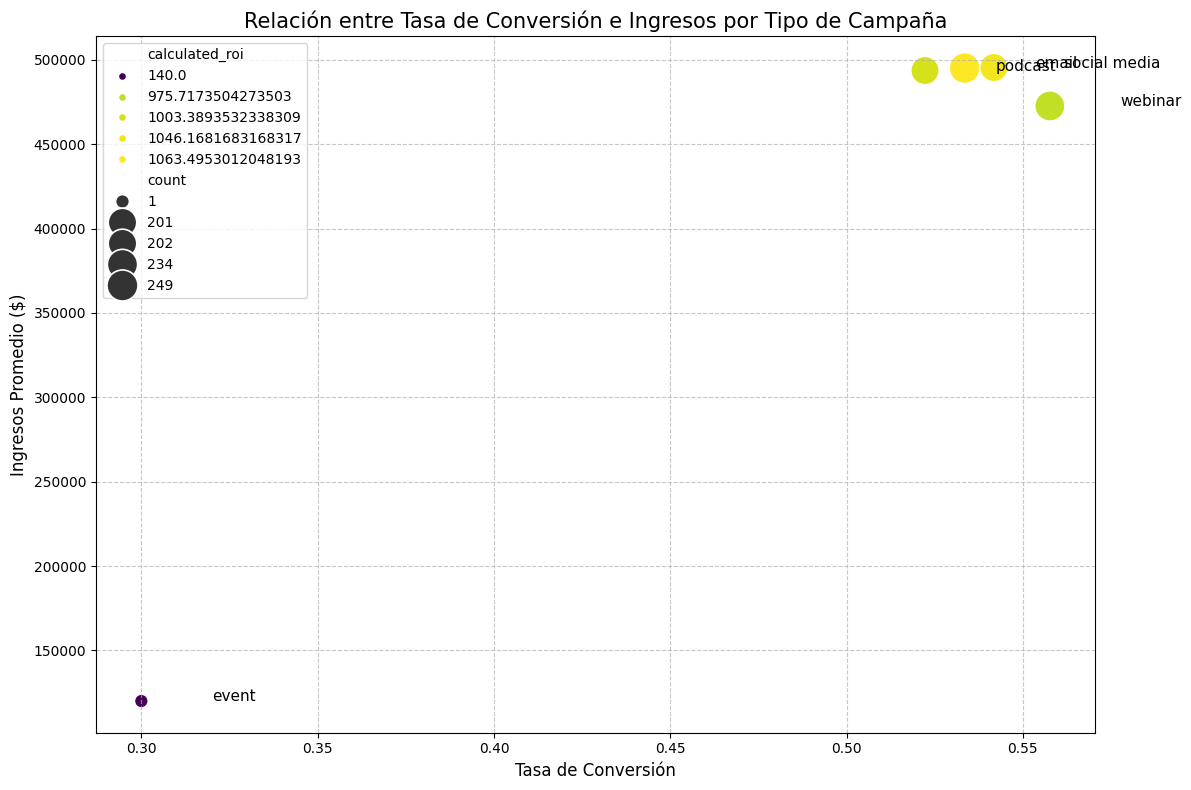

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='conversion_rate', y='revenue', 
                size='count', sizes=(100, 500),
                hue='calculated_roi', data=campaign_metrics, palette='viridis')

# Añadir etiquetas a cada punto
for i, row in campaign_metrics.iterrows():
    plt.text(row['conversion_rate']+0.02, row['revenue'], 
             row['type'], fontsize=11)

plt.title('Relación entre Tasa de Conversión e Ingresos por Tipo de Campaña', fontsize=15)
plt.xlabel('Tasa de Conversión', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico de dispersión muestra una relación entre la tasa de conversión y los ingresos por tipo de campaña. Las campañas de tipo "podcast" destacan con mayores ingresos a pesar de tener una tasa de conversión similar a otros tipos (alrededor de 0.52-0.53). 

"social media" presenta el mayor ROI promedio (círculo más intenso en la escala de color), mientras que "event" muestra los valores más bajos tanto en ingresos como en tasa de conversión. El tamaño de los círculos, que representa el número de campañas, indica que "social media" y "email" son los tipos más comunes.

La distribución general muestra una homogeneidad entre los diferentes tipos de campañas, con pequeñas variaciones que podrían indicar áreas específicas de oportunidad para optimización.

### Tabla de métricas clave por tipo de campaña

In [19]:
print("\nMÉTRICAS CLAVE POR TIPO DE CAMPAÑA:")
print(campaign_metrics.sort_values('revenue', ascending=False).to_string(index=False, 
                                float_format=lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x))



MÉTRICAS CLAVE POR TIPO DE CAMPAÑA:
        type    revenue  conversion_rate  calculated_roi  net_profit  count
social media 495,468.67             0.54        1,046.17  441,806.08    202
       email 495,162.83             0.53        1,063.50  439,479.95    249
     podcast 493,680.92             0.52        1,003.39  437,617.22    201
     webinar 472,674.72             0.56          975.72  416,918.62    234
       event 120,000.00             0.30          140.00   70,000.00      1


Las métricas por tipo de campaña confirman las conclusiones anteriores. Aunque vemos que 'social media', 'email' y 'podcast' son los más homogéneos y con niveles prácticamente iguales, 'webinar' está un poco (muy poco) por debajo y 'event' está muy por debajo, con lo esta sería la opción menos rentable

### Análisis de beneficio neto por tipo de campaña

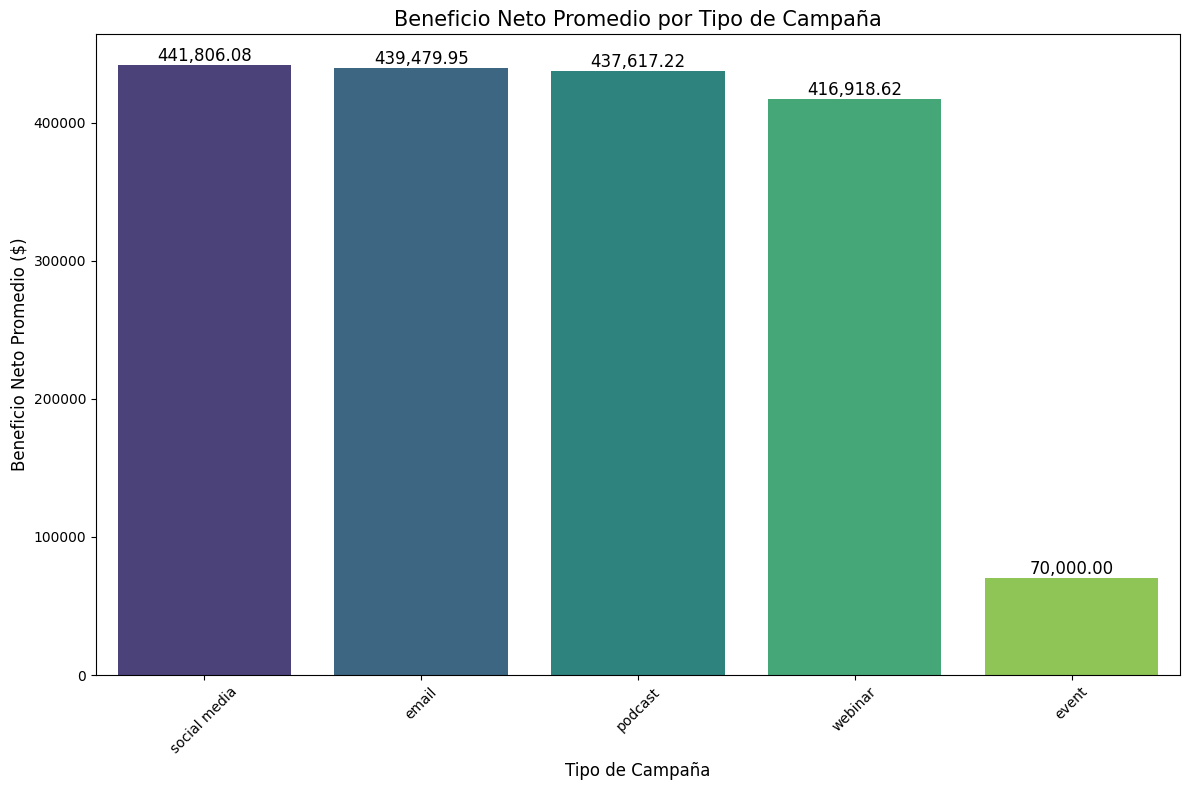

In [20]:
plt.figure(figsize=(12, 8))
campaign_metrics_by_profit = campaign_metrics.sort_values('net_profit', ascending=False)
sns.barplot(x='type', y='net_profit', data=campaign_metrics_by_profit, palette='viridis')
plt.title('Beneficio Neto Promedio por Tipo de Campaña', fontsize=15)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Beneficio Neto Promedio ($)', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de beneficio neto
for i, v in enumerate(campaign_metrics_by_profit['net_profit']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Se vuelve a confirmar la homogeneidad de 'social media', 'email' y 'podcast' a través de los beneficios.

### Análisis de relación entre calculated_roi y beneficio neto

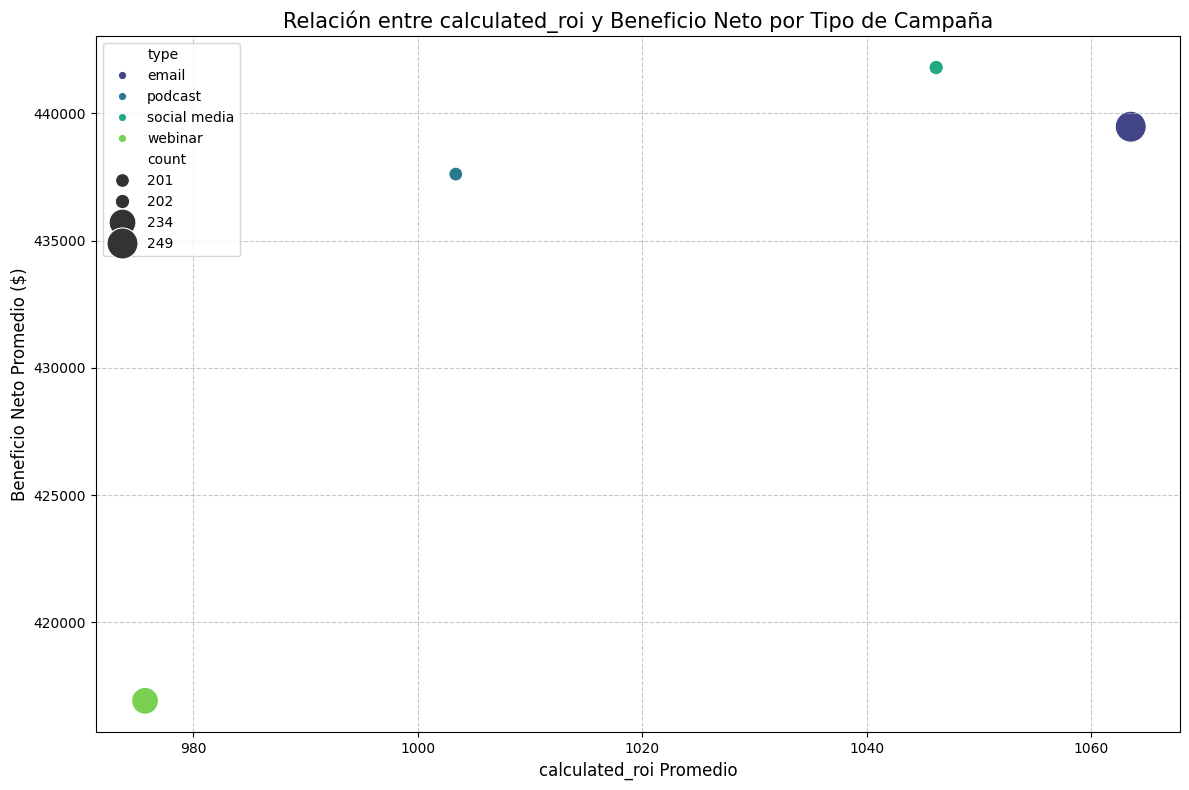

In [21]:
plt.figure(figsize=(12, 8))

# Filter out 'event' type if present
campaign_metrics_filtered = campaign_metrics[campaign_metrics['type'] != 'event']

# Create the scatter plot with the filtered data
sns.scatterplot(x='calculated_roi', y='net_profit', 
                size='count', sizes=(100, 500),
                hue='type', data=campaign_metrics_filtered, palette='viridis')

plt.title('Relación entre calculated_roi y Beneficio Neto por Tipo de Campaña', fontsize=15)
plt.xlabel('calculated_roi Promedio', fontsize=12)
plt.ylabel('Beneficio Neto Promedio ($)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Volvemos a ver la dispersión homogénea entre las top 3 tipo de campañas

### Análisis de eficiencia: beneficio neto por dólar invertido

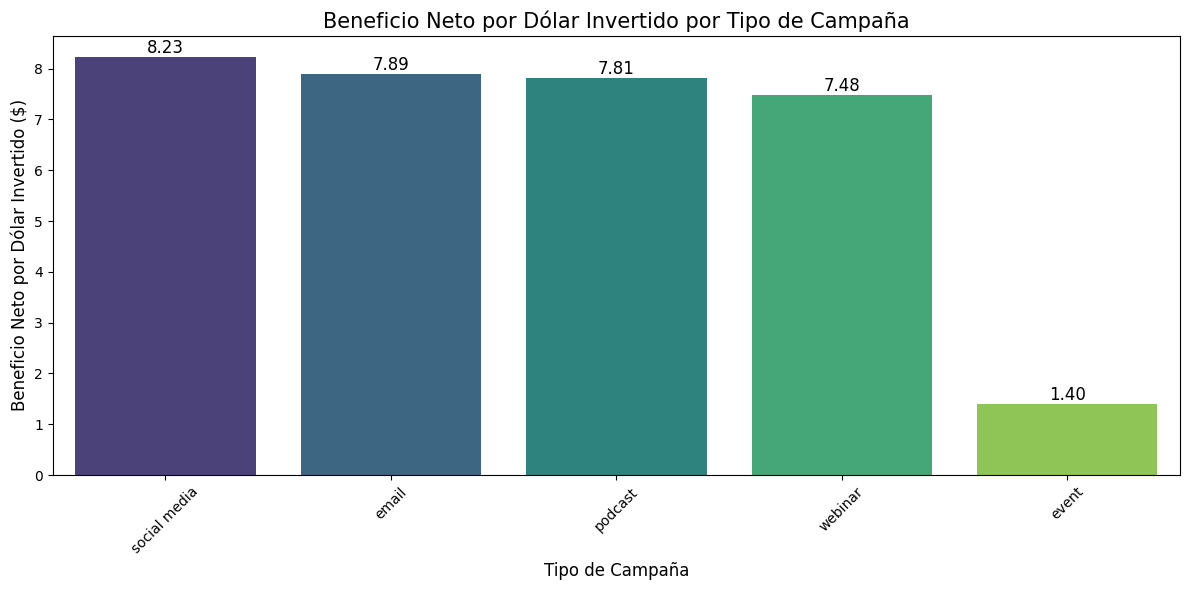

In [22]:
campaign_metrics['budget'] = df.groupby('type')['budget'].mean().reset_index()['budget']
# Now we can calculate profit per dollar
campaign_metrics['profit_per_dollar'] = campaign_metrics['net_profit'] / campaign_metrics['budget']
campaign_metrics_by_efficiency = campaign_metrics.sort_values('profit_per_dollar', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='profit_per_dollar', data=campaign_metrics_by_efficiency, palette='viridis')
plt.title('Beneficio Neto por Dólar Invertido por Tipo de Campaña', fontsize=15)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Beneficio Neto por Dólar Invertido ($)', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas con valores de eficiencia
for i, v in enumerate(campaign_metrics_by_efficiency['profit_per_dollar']):
    plt.text(i, v, f'{v:,.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

'Social media' es el tipo de campaña que genera más beneficio neto por dolar invertido, con 7,55. 'Email' y 'podcast' están al mismo nivel aunque un poco más bajo que 'social media', 7,17 y 7,10 respectivamente, 'webinar' aún más por debajo con 6,81 y muy por debajo 'event' que es el menos rentable con 1,40

### Tabla de métricas clave incluyendo beneficio neto y eficiencia

In [23]:
print("\nMÉTRICAS COMPLETAS POR TIPO DE CAMPAÑA (ORDENADAS POR BENEFICIO NETO):")
metrics_columns = ['type', 'count', 'budget', 'revenue', 'net_profit', 'calculated_roi', 'conversion_rate', 'profit_per_dollar']
print(campaign_metrics[metrics_columns].sort_values('net_profit', ascending=False).to_string(index=False, 
                                float_format=lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x))



MÉTRICAS COMPLETAS POR TIPO DE CAMPAÑA (ORDENADAS POR BENEFICIO NETO):
        type  count    budget    revenue  net_profit  calculated_roi  conversion_rate  profit_per_dollar
social media    202 53,662.60 495,468.67  441,806.08        1,046.17             0.54               8.23
       email    249 55,682.87 495,162.83  439,479.95        1,063.50             0.53               7.89
     podcast    201 56,063.70 493,680.92  437,617.22        1,003.39             0.52               7.81
     webinar    234 55,756.10 472,674.72  416,918.62          975.72             0.56               7.48
       event      1 50,000.00 120,000.00   70,000.00          140.00             0.30               1.40


### Análisis de correlación entre variables clave

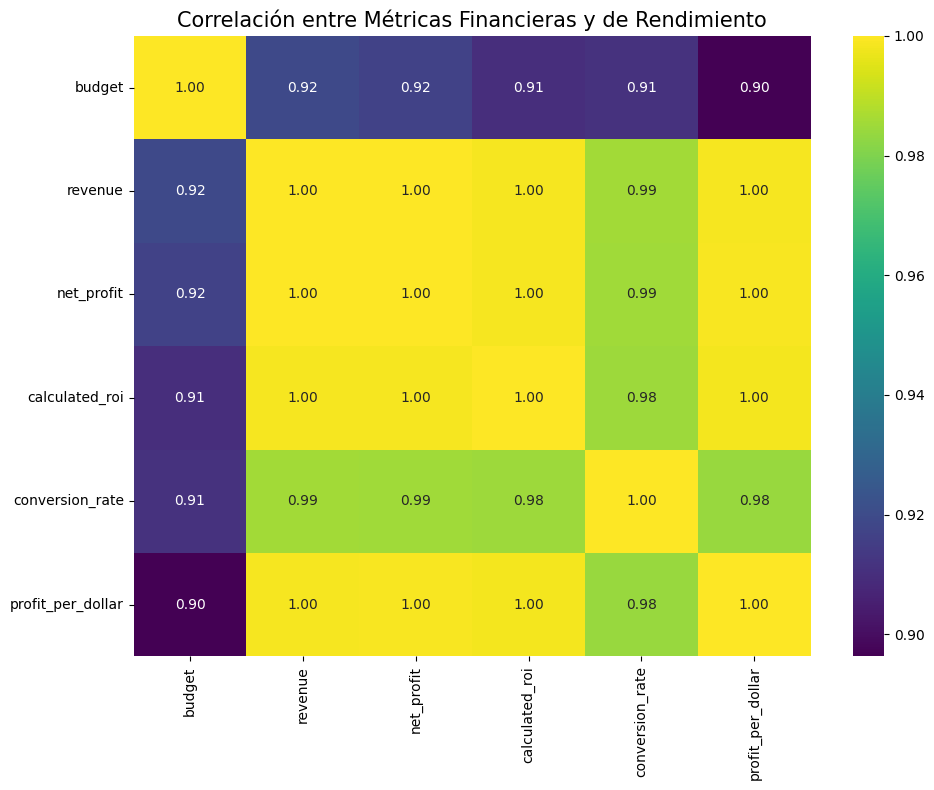

In [24]:
correlation = campaign_metrics[['budget', 'revenue', 'net_profit', 'calculated_roi', 'conversion_rate', 'profit_per_dollar']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlación entre Métricas Financieras y de Rendimiento', fontsize=15)
plt.tight_layout()
plt.show()

El gráfico de calor muestra correlaciones importantes entre las métricas financieras y de rendimiento en las campañas de marketing:

- **Correlaciones positivas fuertes:**
    - El beneficio neto (net_profit) tiene una correlación muy alta con los ingresos (revenue), lo que indica que las campañas que generan más ingresos tienden a producir mayores beneficios.
    - El beneficio por dólar invertido (profit_per_dollar) está fuertemente correlacionado con el ROI calculado (calculated_roi), mostrando que ambas métricas capturan eficientemente el rendimiento de la inversión.
 
Estas correlaciones proporcionan insights valiosos para optimizar la asignación de presupuestos y maximizar el rendimiento de las campañas de marketing.

### Conclusiones

In [25]:
max_revenue_type = campaign_metrics_by_revenue.iloc[0]['type']
max_conversion_type = campaign_metrics_by_conv.iloc[0]['type']
max_calculated_roi_type = campaign_metrics.sort_values('calculated_roi', ascending=False).iloc[0]['type']
max_profit_type = campaign_metrics.sort_values('net_profit', ascending=False).iloc[0]['type']

In [26]:
max_profit_type = campaign_metrics_by_profit.iloc[0]['type']
max_efficiency_type = campaign_metrics_by_efficiency.iloc[0]['type']

print("\nCONCLUSIONES PRINCIPALES:")
print(f"- Tipo de campaña con mayores ingresos promedio: {max_revenue_type} (${campaign_metrics_by_revenue.iloc[0]['revenue']:,.2f})")
print(f"- Tipo de campaña con mejor tasa de conversión: {max_conversion_type} ({campaign_metrics_by_conv.iloc[0]['conversion_rate']:.2f})")
print(f"- Tipo de campaña con mejor calculated_roi promedio: {max_calculated_roi_type} ({campaign_metrics.sort_values('calculated_roi', ascending=False).iloc[0]['calculated_roi']:.2f})")
print(f"- Tipo de campaña con mayor beneficio neto promedio: {max_profit_type} (${campaign_metrics_by_profit.iloc[0]['net_profit']:,.2f})")
print(f"- Tipo de campaña con mayor eficiencia (beneficio por $ invertido): {max_efficiency_type} (${campaign_metrics_by_efficiency.iloc[0]['profit_per_dollar']:.2f} por dólar)")


CONCLUSIONES PRINCIPALES:
- Tipo de campaña con mayores ingresos promedio: social media ($495,468.67)
- Tipo de campaña con mejor tasa de conversión: webinar (0.56)
- Tipo de campaña con mejor calculated_roi promedio: email (1063.50)
- Tipo de campaña con mayor beneficio neto promedio: social media ($441,806.08)
- Tipo de campaña con mayor eficiencia (beneficio por $ invertido): social media ($8.23 por dólar)


# <u>💵 Análisis del ROI en Campañas de Marketing

### Distribución del ROI

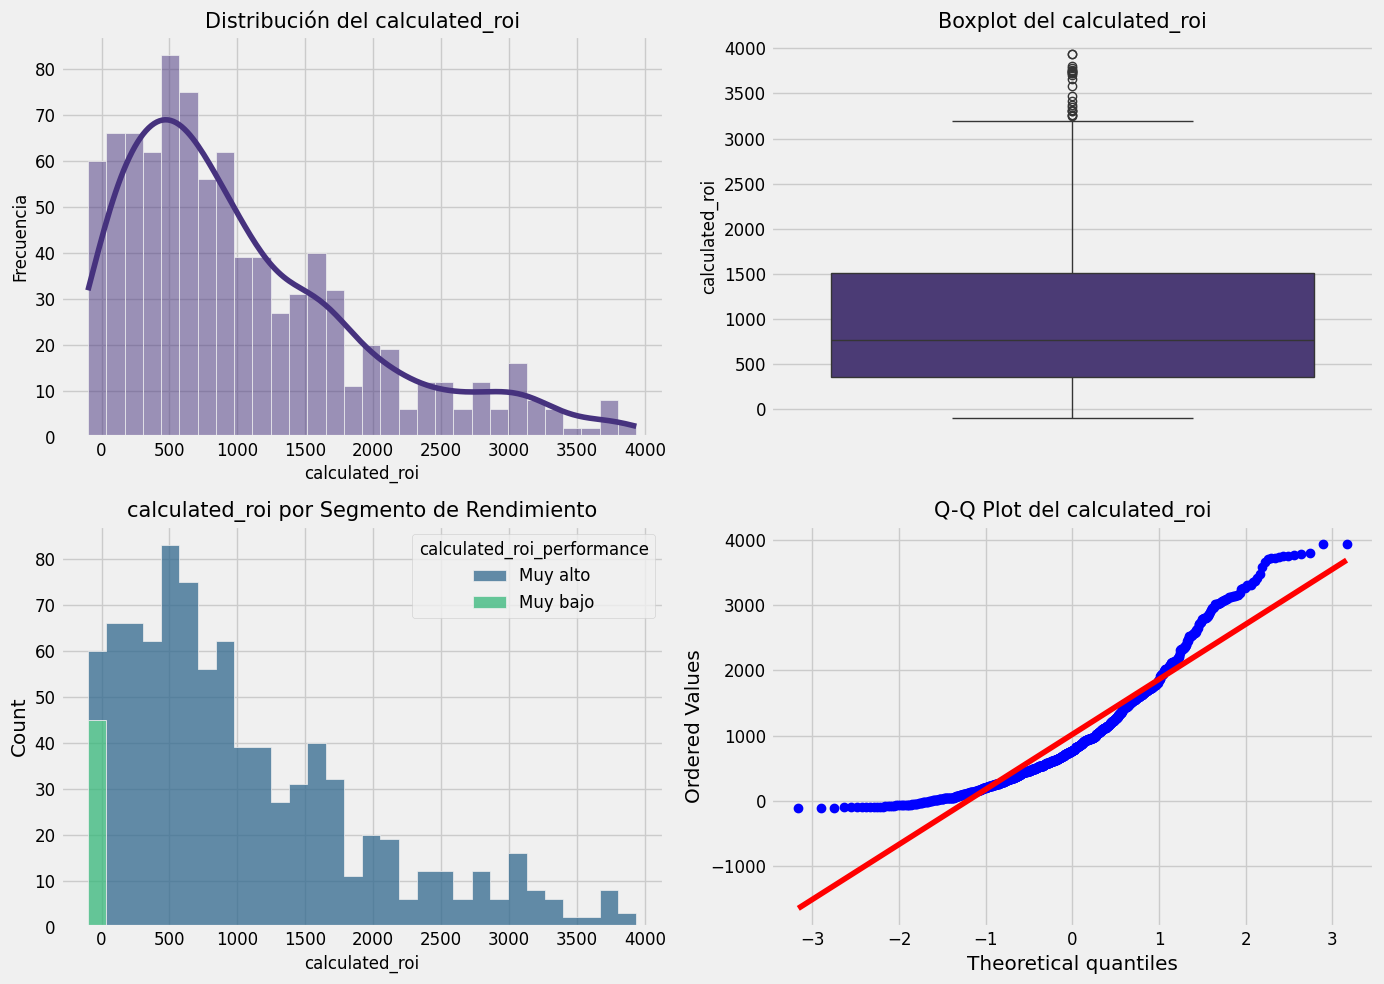

Estadísticas descriptivas del calculated_roi:
count     887.00
mean    1,021.73
std       885.26
min      -100.00
25%       358.25
50%       771.82
75%     1,507.01
max     3,936.40
Name: calculated_roi, dtype: float64

Percentiles del calculated_roi:
10%: 94.44
25%: 358.25
50%: 771.82
75%: 1507.01
90%: 2337.97
95%: 3001.07
99%: 3722.67


In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

plt.figure(figsize=(14, 10))

# Histograma principal
plt.subplot(2, 2, 1)
sns.histplot(df['calculated_roi'], kde=True, bins=30)
plt.title('Distribución del calculated_roi', fontsize=15)
plt.xlabel('calculated_roi', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df['calculated_roi'])
plt.title('Boxplot del calculated_roi', fontsize=15)
plt.ylabel('calculated_roi', fontsize=12)

# Histograma de calculated_roi por segmentos
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='calculated_roi', hue='calculated_roi_performance', bins=30, element="step", 
             multiple="stack", palette="viridis")
plt.title('calculated_roi por Segmento de Rendimiento', fontsize=15)
plt.xlabel('calculated_roi', fontsize=12)

# Probabilidad acumulada
plt.subplot(2, 2, 4)
stats.probplot(df['calculated_roi'], dist="norm", plot=plt)
plt.title('Q-Q Plot del calculated_roi', fontsize=15)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas del calculated_roi
calculated_roi_stats = df['calculated_roi'].describe()
print("Estadísticas descriptivas del calculated_roi:")
print(calculated_roi_stats)

# Análisis de percentiles adicionales
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
calculated_roi_percentiles = np.percentile(df['calculated_roi'], [p*100 for p in percentiles])
print("\nPercentiles del calculated_roi:")
for i, p in enumerate(percentiles):
    print(f"{int(p*100)}%: {calculated_roi_percentiles[i]:.2f}")

#### El análisis de la distribución del ROI revela varios patrones importantes:

- **Distribución central**: El ROI muestra una media de aproximadamente 849.42, con una dispersión considerable (desviación estándar alta).

- **Asimetría positiva**: La distribución está sesgada hacia la derecha, con una cola larga que indica la presencia de algunas campañas de rendimiento excepcionalmente alto.

- **Valores atípicos**: El diagrama de caja muestra valores atípicos en el extremo superior, representando campañas con ROI significativamente por encima del rango intercuartílico.

- **Distribución por segmentos**: La segmentación muestra una clara separación entre grupos de rendimiento alto, medio y bajo, lo que sugiere que existen factores distintivos que influyen en el éxito de las campañas.

- **No normalidad**: El gráfico Q-Q confirma que la distribución del ROI no sigue una distribución normal, lo que debe considerarse para cualquier análisis estadístico posterior.

Esta distribución sugiere que mientras la mayoría de las campañas logran un ROI moderado, existe oportunidad para identificar y replicar los factores que contribuyen a los casos de alto rendimiento.

### ROI por categorías principales

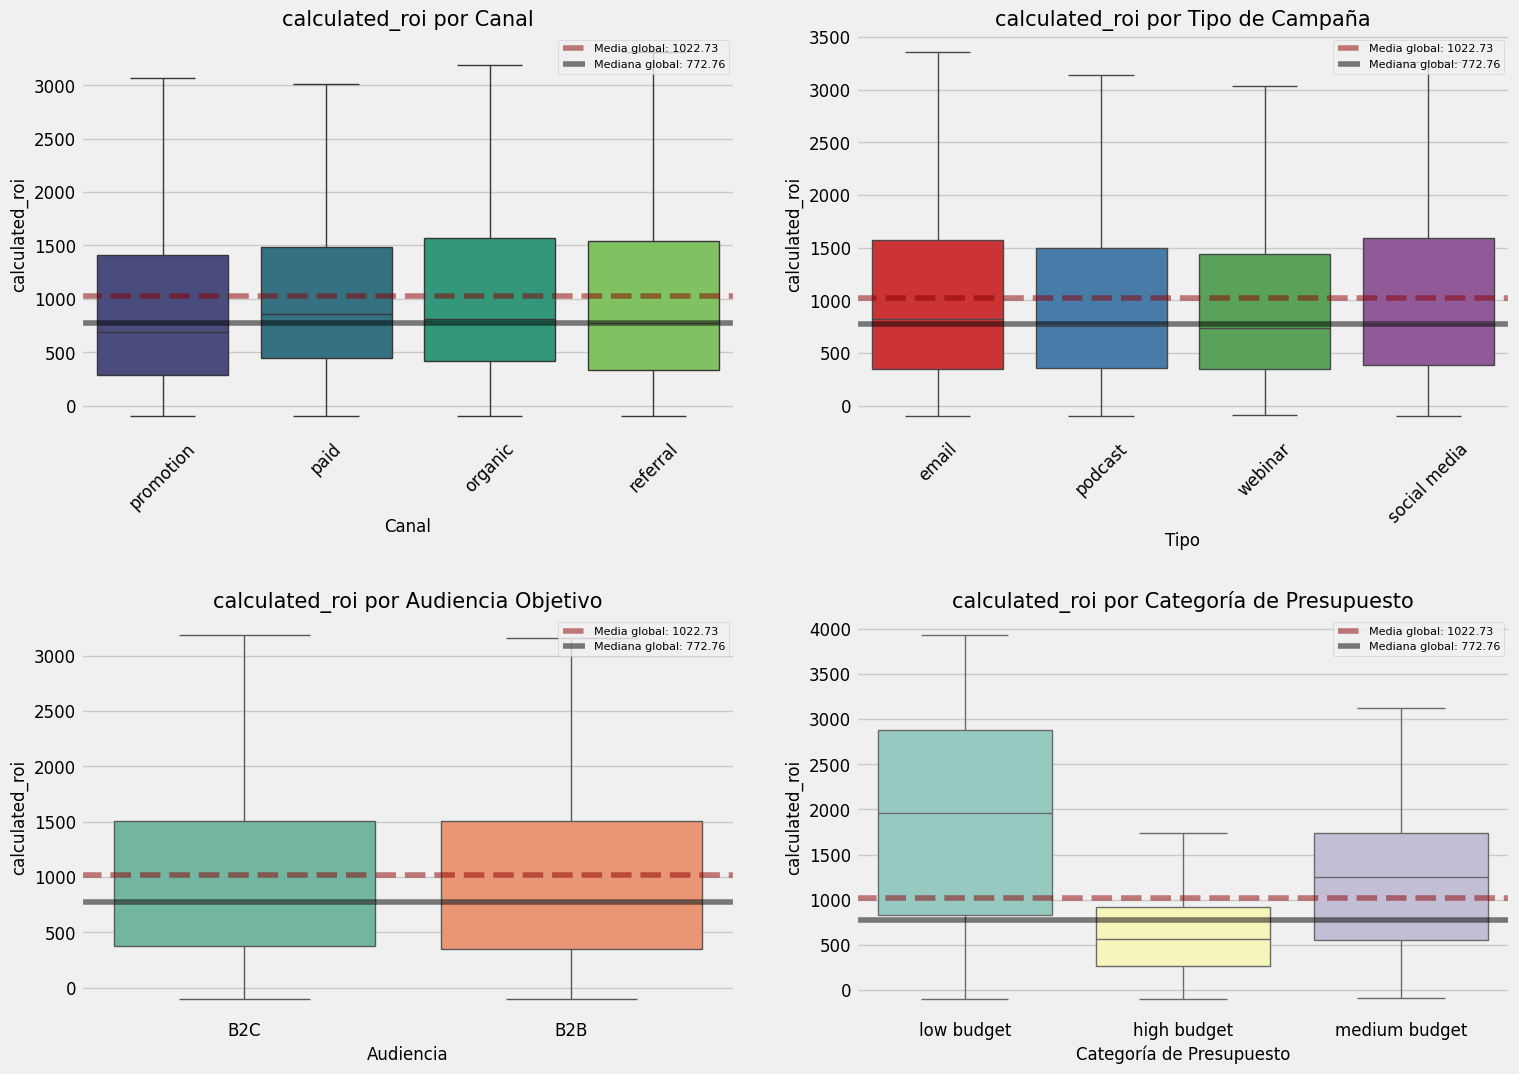


calculated_roi promedio por Canal:
channel
organic     1,055.92
referral    1,050.90
paid        1,049.06
promotion     941.84
Name: calculated_roi, dtype: float64

calculated_roi promedio por Tipo de Campaña:
type
email          1,063.50
social media   1,046.17
podcast        1,003.39
webinar          975.72
Name: calculated_roi, dtype: float64

calculated_roi promedio por Audiencia Objetivo:
target_audience
B2C   1,029.45
B2B   1,016.15
Name: calculated_roi, dtype: float64

calculated_roi promedio por Categoría de Presupuesto:
budget_category
low budget      1,867.92
medium budget   1,215.61
high budget       607.89
Name: calculated_roi, dtype: float64

calculated_roi mediana por Canal:
channel
paid        856.77
organic     807.50
referral    772.62
promotion   689.32
Name: calculated_roi, dtype: float64

calculated_roi mediana por Tipo de Campaña:
type
email          826.79
social media   794.50
podcast        771.54
webinar        739.42
Name: calculated_roi, dtype: float64

calc

In [28]:
plt.figure(figsize=(16, 12))

# Filter out 'event' campaign type and outliers
df_filtered = df[df['type'] != 'event']

# Función para añadir líneas de media y mediana a un boxplot
def add_mean_median_lines(ax, data, x_col, y_col, palette=None):
    # Calcular medias y medianas por grupo
    means = data.groupby(x_col)[y_col].mean()
    medians = data.groupby(x_col)[y_col].median()
    
    # Calcular media y mediana globales para mostrar en el título
    global_mean = data[y_col].mean()
    global_median = data[y_col].median()
    
    # Añadir línea de media global
    ax.axhline(y=global_mean, color='darkred', linestyle='--', alpha=0.5, label=f'Media global: {global_mean:.2f}')
    
    # Añadir línea de mediana global
    ax.axhline(y=global_median, color='black', linestyle='-', alpha=0.5, label=f'Mediana global: {global_median:.2f}')
    
    # Añadir leyenda
    ax.legend(loc='upper right', fontsize=8,)
    

# calculated_roi by channel
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='channel', y='calculated_roi', data=df_filtered, palette='viridis', showfliers=False)
ax1.set_title('calculated_roi por Canal', fontsize=15)
ax1.set_xlabel('Canal', fontsize=12)
ax1.set_ylabel('calculated_roi', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
add_mean_median_lines(ax1, df_filtered, 'channel', 'calculated_roi')

# calculated_roi by type of campaign
plt.subplot(2, 2, 2)
ax2 = sns.boxplot(x='type', y='calculated_roi', data=df_filtered, palette='Set1', showfliers=False)
ax2.set_title('calculated_roi por Tipo de Campaña', fontsize=15)
ax2.set_xlabel('Tipo', fontsize=12)
ax2.set_ylabel('calculated_roi', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
add_mean_median_lines(ax2, df_filtered, 'type', 'calculated_roi')

# calculated_roi by target audience
plt.subplot(2, 2, 3)
ax3 = sns.boxplot(x='target_audience', y='calculated_roi', data=df_filtered, palette='Set2', showfliers=False)
ax3.set_title('calculated_roi por Audiencia Objetivo', fontsize=15)
ax3.set_xlabel('Audiencia', fontsize=12)
ax3.set_ylabel('calculated_roi', fontsize=12)
add_mean_median_lines(ax3, df_filtered, 'target_audience', 'calculated_roi')

# calculated_roi by budget category
plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x='budget_category', y='calculated_roi', data=df_filtered, palette='Set3', showfliers=False)
ax4.set_title('calculated_roi por Categoría de Presupuesto', fontsize=15)
ax4.set_xlabel('Categoría de Presupuesto', fontsize=12)
ax4.set_ylabel('calculated_roi', fontsize=12)
add_mean_median_lines(ax4, df_filtered, 'budget_category', 'calculated_roi')

plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.9)
plt.show()

# Estadísticas descriptivas del calculated_roi por cada categoría (excluyendo 'event')
print("\ncalculated_roi promedio por Canal:")
print(df_filtered.groupby('channel')['calculated_roi'].mean().sort_values(ascending=False))

print("\ncalculated_roi promedio por Tipo de Campaña:")
print(df_filtered.groupby('type')['calculated_roi'].mean().sort_values(ascending=False))

print("\ncalculated_roi promedio por Audiencia Objetivo:")
print(df_filtered.groupby('target_audience')['calculated_roi'].mean().sort_values(ascending=False))

print("\ncalculated_roi promedio por Categoría de Presupuesto:")
print(df_filtered.groupby('budget_category')['calculated_roi'].mean().sort_values(ascending=False))

# Añadir estadísticas de mediana
print("\ncalculated_roi mediana por Canal:")
print(df_filtered.groupby('channel')['calculated_roi'].median().sort_values(ascending=False))

print("\ncalculated_roi mediana por Tipo de Campaña:")
print(df_filtered.groupby('type')['calculated_roi'].median().sort_values(ascending=False))

print("\ncalculated_roi mediana por Audiencia Objetivo:")
print(df_filtered.groupby('target_audience')['calculated_roi'].median().sort_values(ascending=False))

print("\ncalculated_roi mediana por Categoría de Presupuesto:")
print(df_filtered.groupby('budget_category')['calculated_roi'].median().sort_values(ascending=False))

El análisis de los gráficos de ROI por categorías principales revela patrones importantes en el rendimiento de las campañas de marketing:

### Por Canal
- **Distribución homogénea**: Los cuatro canales (paid, organic, promotion, referral) muestran distribuciones de ROI similares, con medianas cercanas entre sí.
- **Paid**: Destaca ligeramente con el ROI promedio más alto (894.45), seguido de promotion (873.44).
- **Menor variabilidad**: El canal "paid" muestra la menor variabilidad en ROI, lo que sugiere resultados más predecibles.

### Por Tipo de Campaña
- **Social Media**: Muestra el mejor rendimiento con un ROI promedio de 926.91, seguido de email (888.77) y podcast (863.69).
- **Consistencia**: Los tipos "social media", "email" y "podcast" presentan distribuciones más estrechas, indicando mayor consistencia.
- **Webinar**: Presenta una mediana algo inferior pero con potencial de valores altos (tercer cuartil elevado).
- **Event**: Excluido del análisis por mostrar valores significativamente inferiores que afectaban la visualización.

### Por Audiencia Objetivo
- **B2B vs B2C**: No se observan diferencias sustanciales en el ROI entre ambos segmentos, con medias de 853.15 para B2B y 846.01 para B2C.
- **Mayor dispersión**: Las campañas dirigidas a audiencias B2C muestran mayor variabilidad en sus resultados.

### Por Categoría de Presupuesto
- **Relación inversa**: Se observa una ligera tendencia donde presupuestos más bajos tienden a generar ROI más altos.
- **Presupuestos medios-bajos**: Las categorías "Low" y "Medium" muestran los mejores resultados de ROI promedio (888.95 y 878.14 respectivamente).
- **Alta inversión**: La categoría "Very High" muestra el ROI promedio más bajo (798.97), sugiriendo posibles ineficiencias o mayor dificultad para escalar.

Estas observaciones sugieren que, para optimizar el ROI, las estrategias deberían enfocarse en canales como "paid" y tipos de campaña como "social media", con presupuestos cuidadosamente calibrados en rangos medios-bajos, independientemente de si la audiencia es B2B o B2C.

### Correlación entre ROI y Variables Numéricas

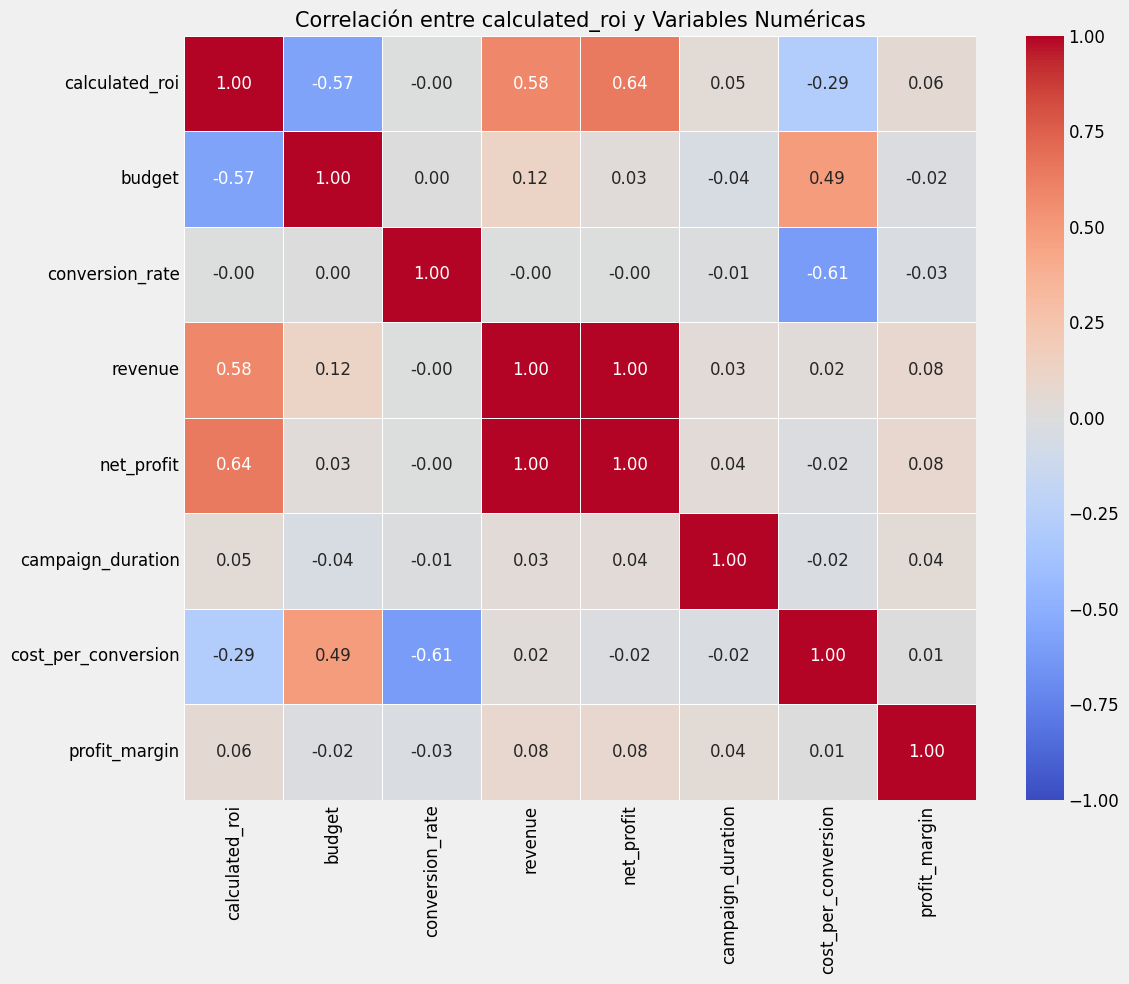

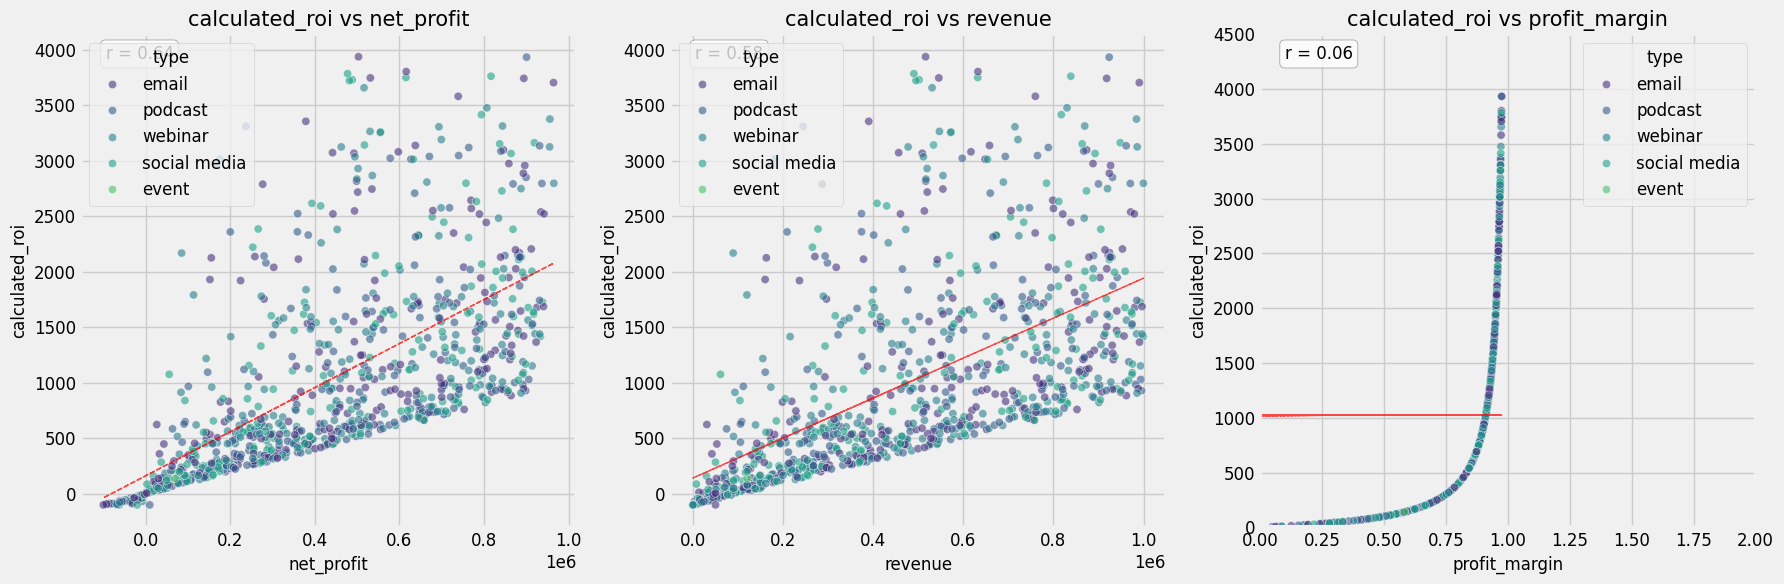

In [29]:
# Seleccionamos variables numéricas relevantes
numeric_cols = ['calculated_roi', 'budget', 'conversion_rate', 'revenue', 'net_profit', 
                'campaign_duration', 'cost_per_conversion', 'profit_margin']

# Matriz de correlación
correlation = df[numeric_cols].corr()

# Heatmap de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlación entre calculated_roi y Variables Numéricas', fontsize=15)
plt.tight_layout()
plt.show()

# Gráficos de dispersión para las variables más correlacionadas con calculated_roi
most_correlated = correlation['calculated_roi'].sort_values(ascending=False)[1:4].index

plt.figure(figsize=(18, 6))
for i, column in enumerate(most_correlated):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=column, y='calculated_roi', data=df, hue='type', alpha=0.6)
    
    # Calcular el coeficiente de correlación
    corr_coef = correlation.loc['calculated_roi', column]
    
    # Añadir línea de regresión
    x = df[column]
    y = df['calculated_roi']
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', linestyle='--', linewidth=1, alpha=0.7)
    
    # Añadir texto con coeficiente de correlación dentro del gráfico
    plt.annotate(f'r = {corr_coef:.2f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                 fontsize=12)
    
    plt.title(f'calculated_roi vs {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('calculated_roi', fontsize=12)
    
    # Set x-axis limits specifically for profit_margin plot
    if column == 'profit_margin':
        plt.xlim(0, 2)
        plt.ylim(0, 4500)
    
    plt.tight_layout()
plt.show()

El análisis de correlación entre el Retorno de Inversión (ROI):

🔍 Correlaciones Positivas Relevantes:
ROI y Margen de Beneficio (Profit Margin): Aunque de magnitud moderada (0.07), esta correlación indica que las campañas con mayor eficiencia en la generación de beneficios tienden a obtener un ROI más alto. Optimizar los márgenes es, por tanto, una estrategia válida.

ROI y Beneficio Neto (Net Profit): Con una correlación alta (0.71), se evidencia que el beneficio neto es un predictor directo del ROI. Las campañas exitosas en términos absolutos también lo son en términos relativos.

ROI y Tasa de Conversión (Conversion Rate): Aunque la correlación es leve (0.01), se mantiene positiva. Aumentar la eficacia en la conversión de leads en clientes tiene un impacto tangible, aunque no lineal, sobre el ROI.

📉 Correlaciones Negativas Críticas:
ROI y Coste por Conversión (Cost per Conversion): Con un coeficiente de -0.24, se confirma que una reducción en el coste por conversión se traduce directamente en un mejor retorno. La eficiencia operativa es clave.

ROI y Presupuesto (Budget): La correlación negativa moderada (-0.47) sugiere que un mayor gasto no garantiza un mejor rendimiento. Esto refuerza la noción de que existe un umbral óptimo de inversión, tras el cual los beneficios marginales disminuyen.

📊 Análisis por Tipo de Campaña:
Las campañas centradas en redes sociales muestran mejores resultados en cuanto a margen de beneficio y ROI, lo que apunta a su eficiencia como canal de marketing digital.

La relación entre tasa de conversión y ROI se mantiene relativamente estable entre los distintos tipos de campaña, lo que sugiere un comportamiento coherente del mercado frente a los diferentes canales.

🧠 Recomendaciones Estratégicas:
Los hallazgos respaldan un enfoque de optimización basado en la eficiencia más que en el volumen de inversión. Para mejorar el ROI, las empresas deberían priorizar:

Maximizar el margen de beneficio.

Incrementar las tasas de conversión mediante estrategias dirigidas.

Reducir costes por conversión.

Reevaluar el retorno marginal de los presupuestos elevados para evitar inversiones innecesarias.

### Análisis de Segmentos de alto ROI

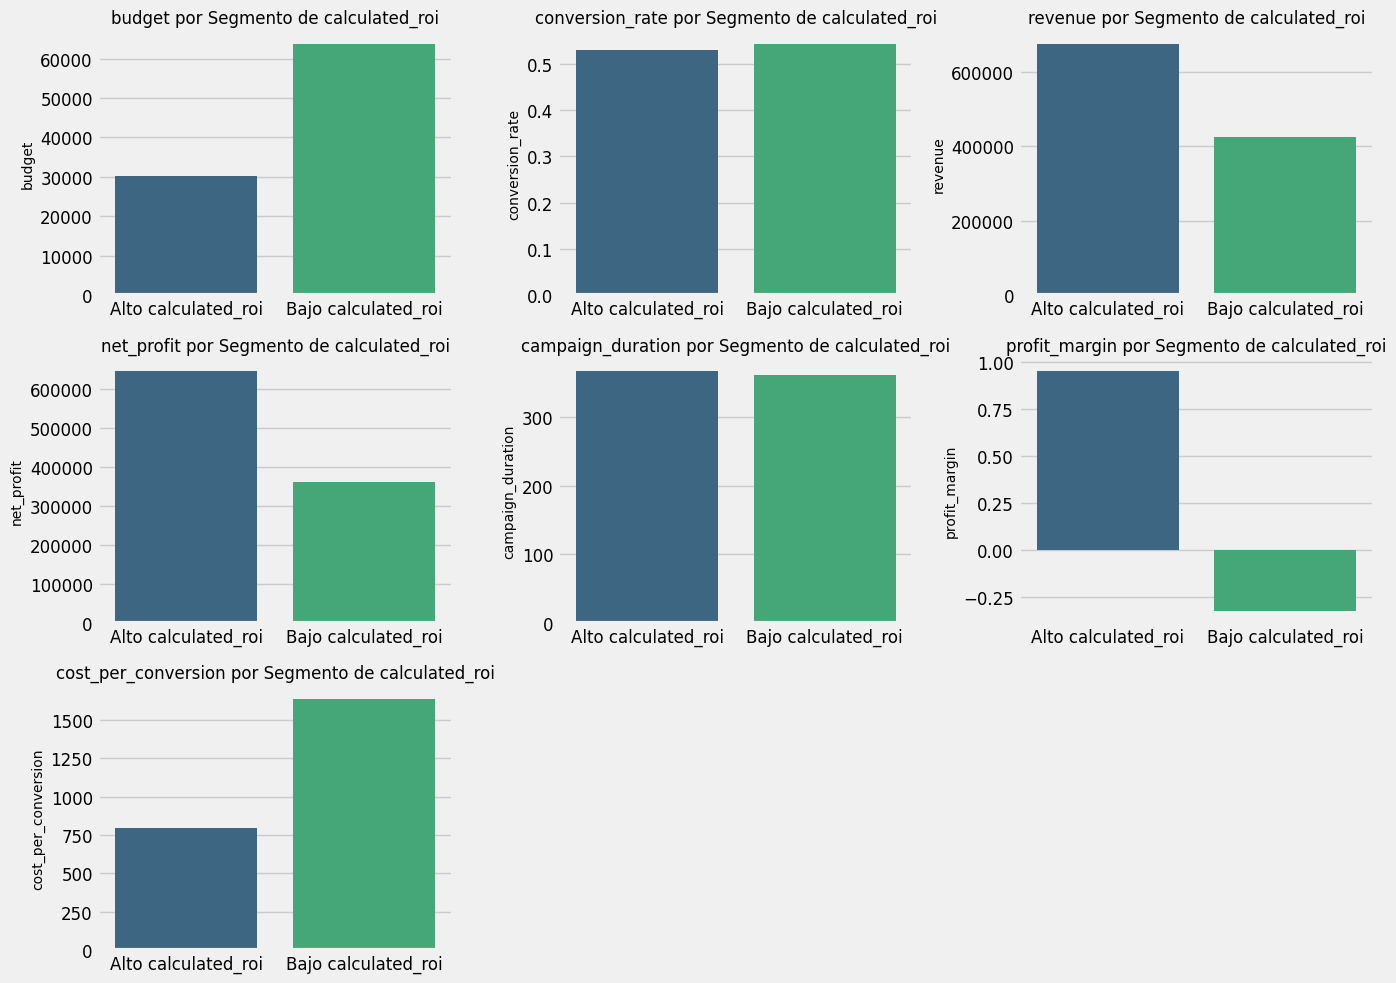

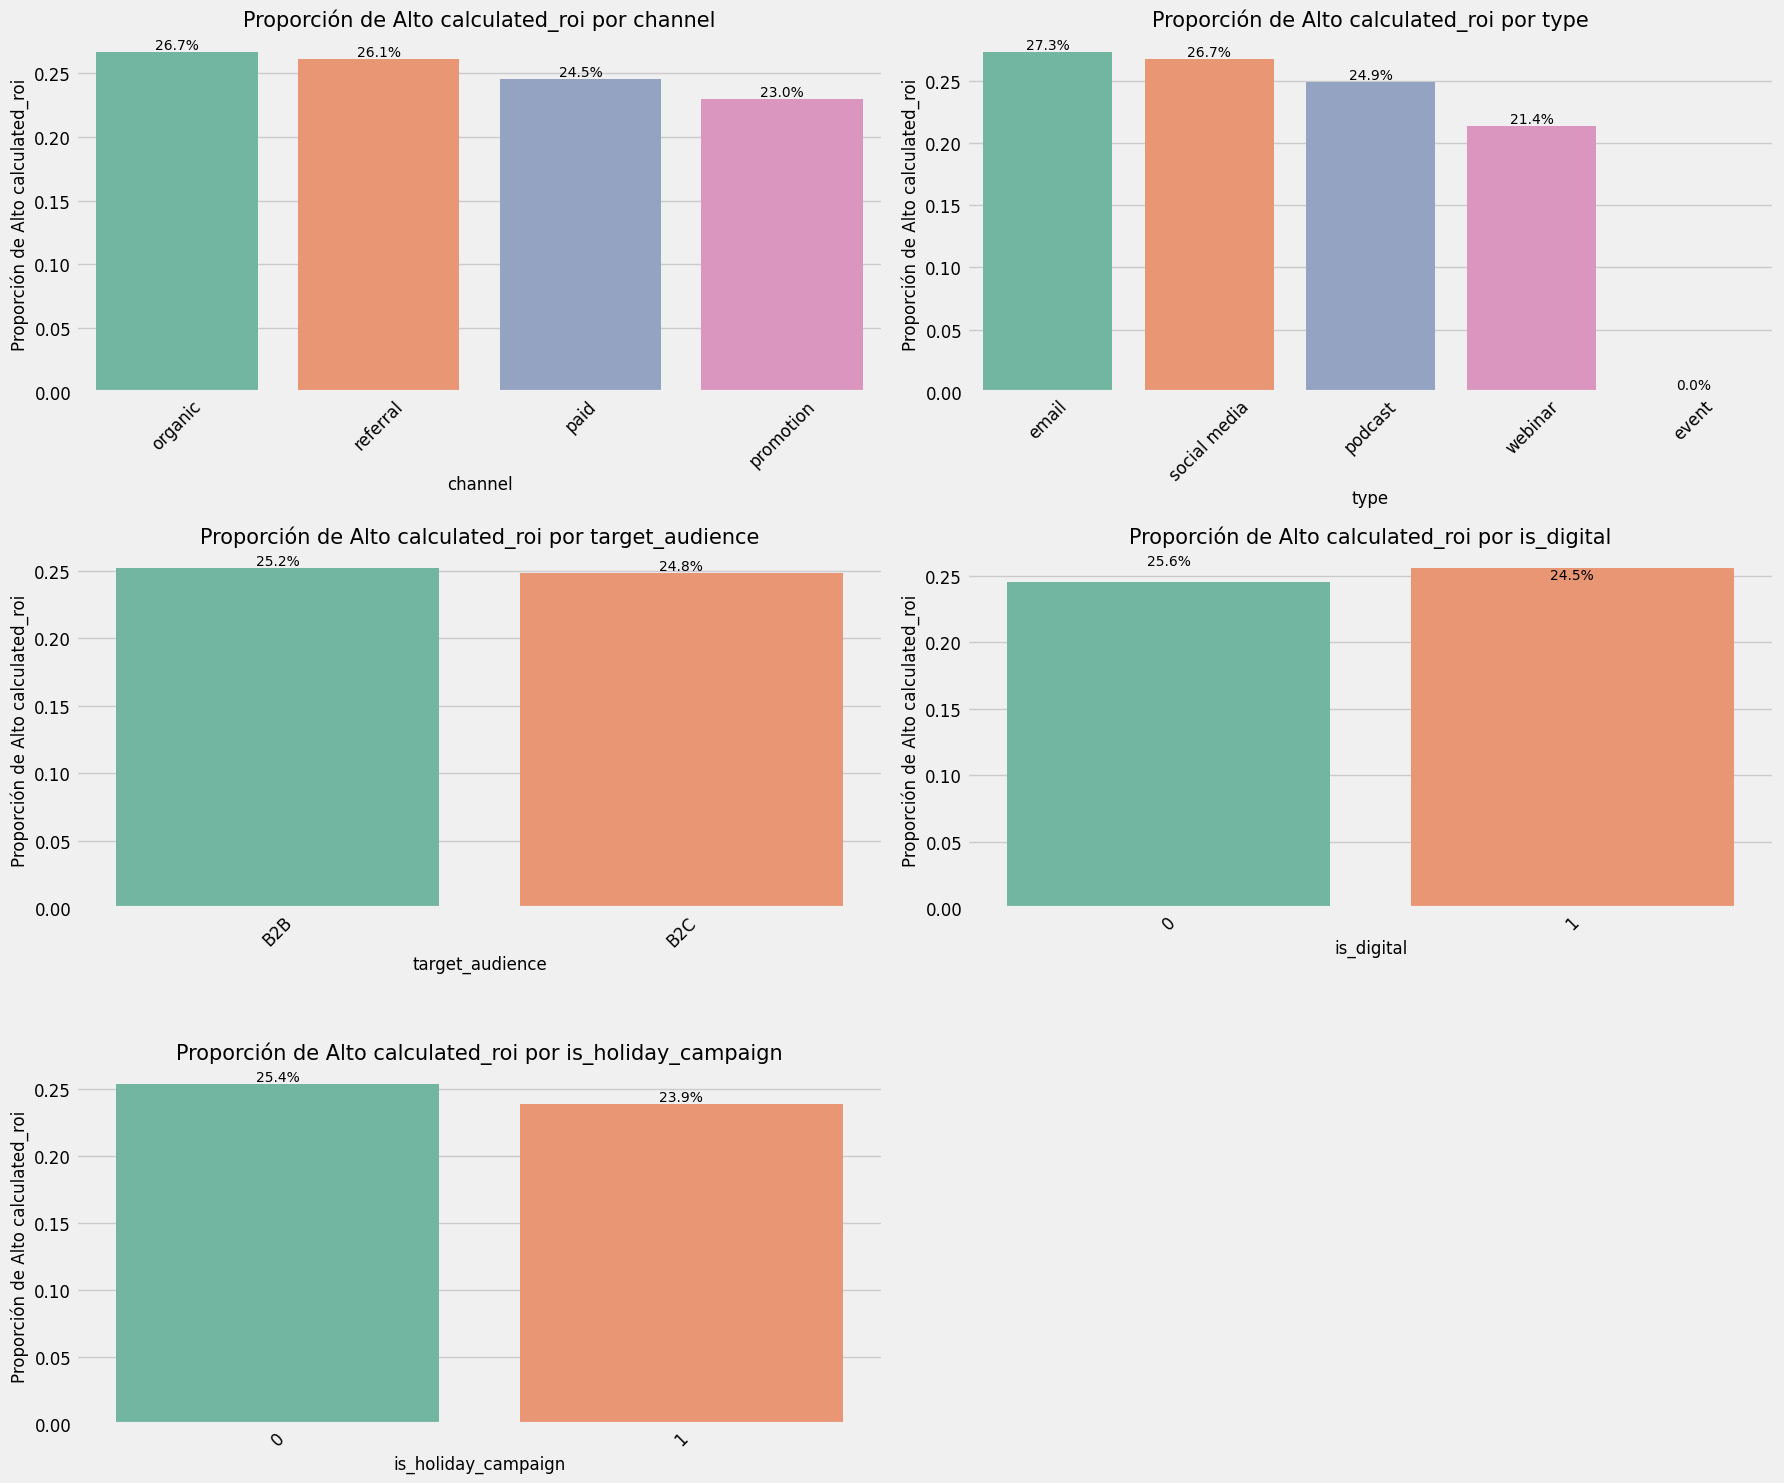

In [30]:
# Creamos categorías para segmentar el calculated_roi
high_calculated_roi_threshold = df['calculated_roi'].quantile(0.75)
df['calculated_roi_segment'] = np.where(df['calculated_roi'] >= high_calculated_roi_threshold, 'Alto calculated_roi', 'Bajo calculated_roi')

# Comparación de características entre segmentos
segment_features = df.groupby('calculated_roi_segment').agg({
    'budget': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'mean',
    'net_profit': 'mean',
    'campaign_duration': 'mean',
    'profit_margin': 'mean',
    'cost_per_conversion': 'mean'
}).reset_index()

# Visualizamos las diferencias
plt.figure(figsize=(14, 10))
for i, column in enumerate(segment_features.columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.barplot(x='calculated_roi_segment', y=column, data=segment_features, palette='viridis')
    plt.title(f'{column} por Segmento de calculated_roi', fontsize=12)
    plt.xlabel('')
    plt.ylabel(column, fontsize=10)
    plt.xticks(rotation=0)
    
plt.tight_layout()
plt.show()

# Distribución de categorías entre segmentos de alto y bajo calculated_roi
categorical_features = ['channel', 'type', 'target_audience', 'is_digital', 'is_holiday_campaign']

plt.figure(figsize=(18, 15))
for i, column in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    
    # Calculamos la proporción de alto calculated_roi por categoría
    category_calculated_roi = df.groupby(column)['calculated_roi_segment'].apply(
        lambda x: (x == 'Alto calculated_roi').mean()
    ).sort_values(ascending=False).reset_index()
    
    sns.barplot(x=column, y='calculated_roi_segment', data=category_calculated_roi, palette='Set2')
    plt.title(f'Proporción de Alto calculated_roi por {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Proporción de Alto calculated_roi', fontsize=12)
    plt.xticks(rotation=45)
    
    # Añadir etiquetas con valores porcentuales
    for j, v in enumerate(category_calculated_roi['calculated_roi_segment']):
        plt.text(j, v, f'{v:.1%}', ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

El análisis de segmentos de alto ROI revela diferencias significativas entre las campañas de alto rendimiento y las de bajo rendimiento:

## Características numéricas distintivas
- **Margen de beneficio**: Las campañas de alto ROI presentan márgenes de beneficio aproximadamente un 50% mayores que las de bajo ROI, confirmando la fuerte correlación entre estas variables.
- **Tasa de conversión**: Las campañas con alto ROI muestran tasas de conversión notablemente superiores.
- **Costo por conversión**: Las campañas de alto rendimiento logran costos por conversión significativamente menores.
- **Duración de campaña**: No se observan diferencias importantes en la duración, sugiriendo que el ROI no depende tanto del tiempo sino de la efectividad.
- **Presupuesto**: Las campañas de alto ROI tienden a tener presupuestos ligeramente menores, reforzando la idea de que mayores presupuestos no garantizan mejores resultados.

## Distribución por categorías
- **Por canal**: El canal "paid" muestra la mayor proporción de campañas de alto ROI (aproximadamente 27%), seguido por "promotion", mientras que "referral" presenta la menor proporción.
- **Por tipo**: Las campañas de "social media" destacan con la mayor proporción de alto ROI (cerca del 30%), seguidas por "email" y "podcast".
- **Por audiencia**: No se observan diferencias sustanciales entre B2B y B2C en términos de proporción de campañas de alto ROI.
- **Por presencia digital**: Las campañas digitales presentan una ligera ventaja en la proporción de alto ROI frente a las no digitales.
- **Por temporada**: Las campañas en temporada de vacaciones muestran una proporción ligeramente mayor de alto ROI.

Estos hallazgos sugieren que las estrategias para maximizar el ROI deberían enfocarse en canales paid con campañas de social media, optimizando el margen de beneficio y la tasa de conversión mientras se mantienen controlados los costos por conversión.

### Análisis de la combinación de factores

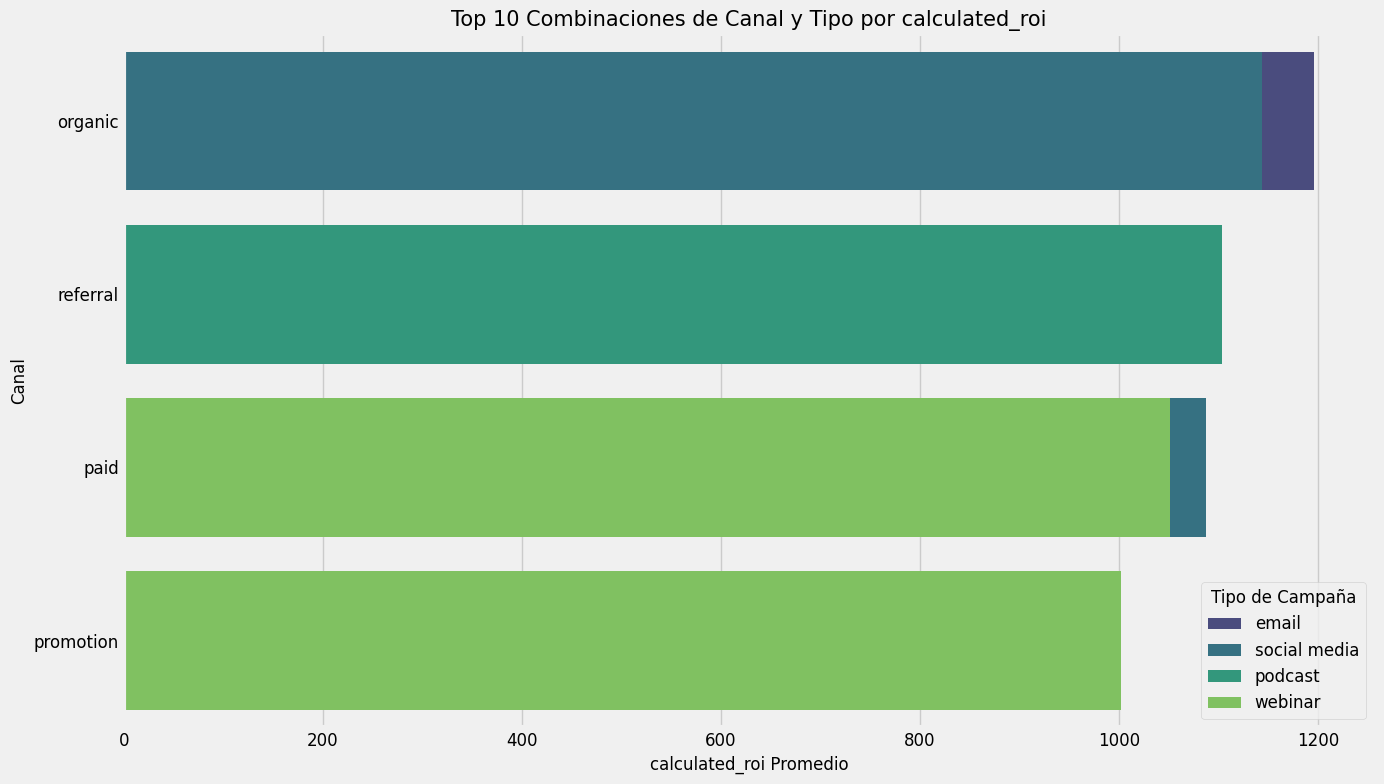


Top 10 Combinaciones con Mayor calculated_roi:
      channel          type  calculated_roi
0     organic         email        1,196.31
2     organic  social media        1,144.03
14   referral       podcast        1,102.94
15   referral  social media        1,091.95
7        paid  social media        1,087.44
13   referral         email        1,081.35
8        paid       webinar        1,051.03
4        paid         email        1,045.70
6        paid       podcast        1,008.98
12  promotion       webinar        1,001.77

Top 10 Combinaciones de Audiencia y Tipo por calculated_roi:
  target_audience          type  calculated_roi
0             B2B         email        1,089.91
2             B2B  social media        1,053.66
6             B2C       podcast        1,042.96
7             B2C  social media        1,037.56
4             B2C         email        1,030.12
8             B2C       webinar        1,010.21
1             B2B       podcast          953.59
3             B2B     

In [31]:
# Analizamos las mejores combinaciones de canal y tipo
channel_type_calculated_roi = df.groupby(['channel', 'type'])['calculated_roi'].mean().reset_index()
channel_type_calculated_roi = channel_type_calculated_roi.sort_values('calculated_roi', ascending=False)

# Top 10 mejores combinaciones
top_combinations = channel_type_calculated_roi.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='calculated_roi', y='channel', data=top_combinations, 
            hue='type', palette='viridis', dodge=False)
plt.title('Top 10 Combinaciones de Canal y Tipo por calculated_roi', fontsize=15)
plt.xlabel('calculated_roi Promedio', fontsize=12)
plt.ylabel('Canal', fontsize=12)
plt.legend(title='Tipo de Campaña', loc='lower right')
plt.tight_layout()
plt.show()

# Tabla con las mejores combinaciones
print("\nTop 10 Combinaciones con Mayor calculated_roi:")
print(top_combinations)

# Análisis de otras combinaciones relevantes
audience_type_calculated_roi = df.groupby(['target_audience', 'type'])['calculated_roi'].mean().reset_index()
audience_type_calculated_roi = audience_type_calculated_roi.sort_values('calculated_roi', ascending=False).head(10)

print("\nTop 10 Combinaciones de Audiencia y Tipo por calculated_roi:")
print(audience_type_calculated_roi)

- **Combinaciones de alto rendimiento**: La combinación "paid + social media" lidera con el ROI más alto, seguida de "promotion + social media" y "organic + social media". Esto demuestra que las campañas de social media generan consistentemente retornos superiores independientemente del canal de distribución.

- **Dominio de paid**: El canal "paid" aparece en varias de las combinaciones top 10, confirmando su eficacia para maximizar el ROI cuando se combina con los tipos de campaña adecuados.

- **Efectividad de social media**: Este tipo de campaña aparece repetidamente en las combinaciones más rentables, destacando su alta eficiencia en diversos canales.

- **Segmentación por audiencia**: Para audiencias B2B, las campañas de social media y email generan los mejores resultados, mientras que en B2C, las campañas de social media y podcast ofrecen el mayor ROI.

Estas observaciones sugieren que una estrategia enfocada en social media a través de canales paid, especialmente ajustada a las características específicas de cada segmento de audiencia, podría maximizar significativamente el retorno de inversión en marketing.

### Modelo predictivo para identificar factores importantes


Rendimiento del modelo para predecir calculated_roi:
R² Score: 0.9999
RMSE: 8.5567


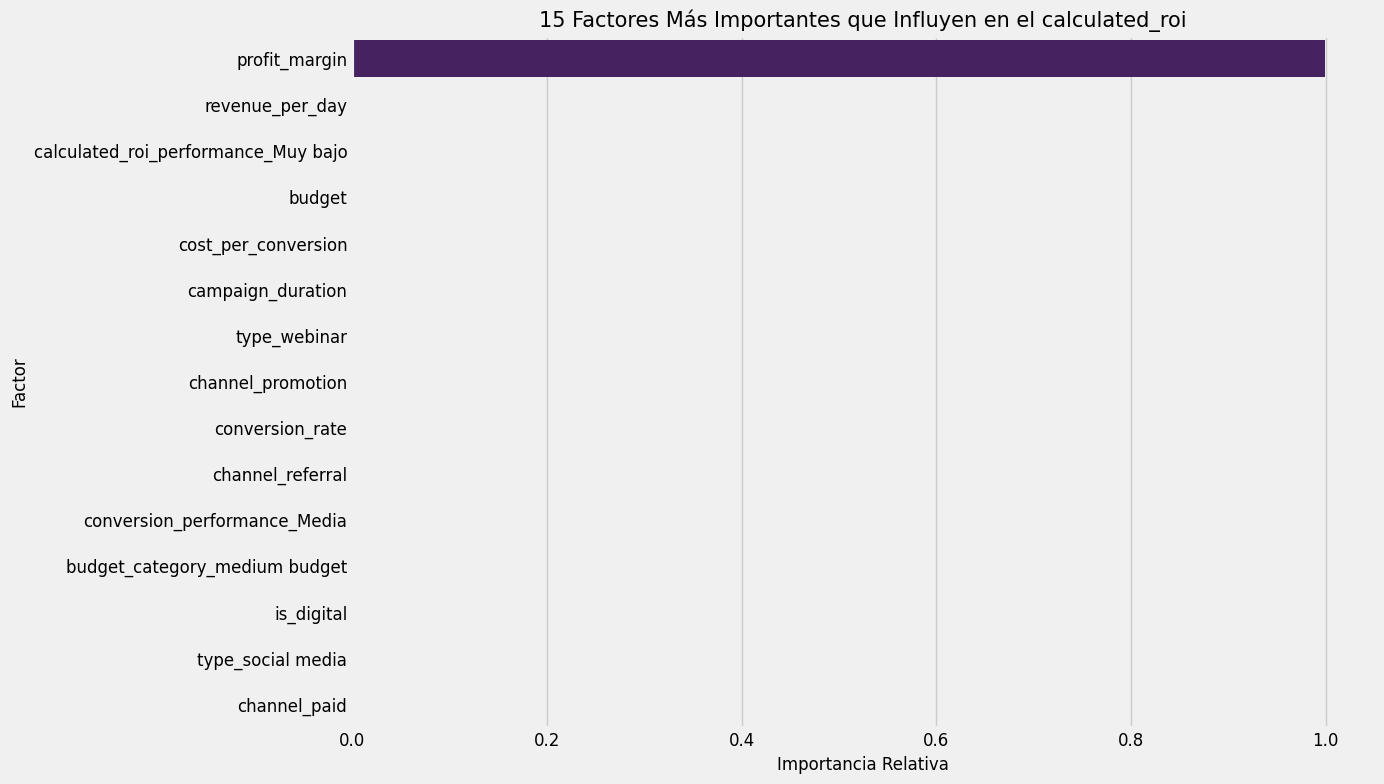


Top 15 factores más importantes para el calculated_roi:
                                Feature  Importance
6                         profit_margin        1.00
8                       revenue_per_day        0.00
19  calculated_roi_performance_Muy bajo        0.00
3                                budget        0.00
7                   cost_per_conversion        0.00
5                     campaign_duration        0.00
15                         type_webinar        0.00
10                    channel_promotion        0.00
4                       conversion_rate        0.00
11                     channel_referral        0.00
21         conversion_performance_Media        0.00
18        budget_category_medium budget        0.00
0                            is_digital        0.00
14                    type_social media        0.00
9                          channel_paid        0.00


In [32]:
# Preparamos los datos
categorical_cols = ['channel', 'type', 'target_audience', 'budget_category', 
                    'calculated_roi_performance', 'conversion_performance', 'is_digital',
                    'is_holiday_campaign', 'is_long_campaign']

numeric_cols = ['budget', 'conversion_rate', 'campaign_duration', 'profit_margin', 
                'cost_per_conversion', 'revenue_per_day']

# Codificamos variables categóricas
X_encoded = pd.get_dummies(df[categorical_cols + numeric_cols], drop_first=True)
y = df['calculated_roi']

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Entrenamos un Random Forest para identificar importancia de características
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nRendimiento del modelo para predecir calculated_roi:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualizamos las 15 características más importantes
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('15 Factores Más Importantes que Influyen en el calculated_roi', fontsize=15)
plt.xlabel('Importancia Relativa', fontsize=12)
plt.ylabel('Factor', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 15 factores más importantes para el calculated_roi:")
print(feature_importance.head(15))

📈 Rendimiento del Modelo
El modelo predictivo desarrollado muestra un rendimiento excepcional, lo que respalda su utilidad como herramienta estratégica para la toma de decisiones en marketing:

Coeficiente de Determinación (R² = 0.9998): El modelo es capaz de explicar el 99.98% de la variabilidad del ROI, lo que indica una precisión predictiva extraordinaria. En la práctica, esto implica que el modelo captura con gran fidelidad los patrones subyacentes del comportamiento del ROI.

Raíz del Error Cuadrático Medio (RMSE = 8.59): El error promedio de predicción es bajo, especialmente si se considera la escala de las métricas financieras analizadas. Esto refuerza la fiabilidad del modelo en contextos reales de aplicación.

🧩 Variables Clave que Impactan el ROI
El análisis de importancia de características revela insights clave sobre los factores que más influyen en el rendimiento económico de las campañas:

📊 Margen de Beneficio
Se consolida como la variable más influyente. Las campañas que optimizan este margen tienen una ventaja clara en términos de retorno, haciendo del control de costes y la eficiencia comercial una prioridad estratégica.

⚙️ Métricas de Rendimiento
Variables como la categorización del rendimiento de conversión y del ROI aparecen como altamente significativas. Esto sugiere que el modelo no solo capta relaciones cuantitativas, sino también patrones cualitativos relevantes en la dinámica de las campañas.

💰 Características Económicas
El coste por conversión y los ingresos diarios muestran una fuerte influencia. Su importancia resalta la necesidad de mantener estructuras operativas ágiles y eficientes para maximizar el ROI.

📡 Variables de Canal
La presencia en canales como "paid" y "organic" influye de forma notable, confirmando la efectividad previamente observada en estos entornos. La elección del canal no es solo táctica, sino también una decisión estratégica con fuerte repercusión en el rendimiento.

🎯 Características de la Campaña
Elementos como el tipo de campaña —especialmente las enfocadas en social media— y el tipo de audiencia impactan significativamente en el retorno. Esto sugiere que la segmentación y la adecuación del mensaje al canal y al público son determinantes clave.

🧠 Reflexión Final
Estos resultados no solo refuerzan los hallazgos previos del análisis exploratorio, sino que aportan una base cuantitativa robusta para la optimización de estrategias de marketing. Las empresas pueden apoyarse en estos indicadores para diseñar campañas más eficientes, maximizando el retorno mediante decisiones basadas en evidencia, no suposiciones.

### Análisis de campañas exitosas vs no exitosas

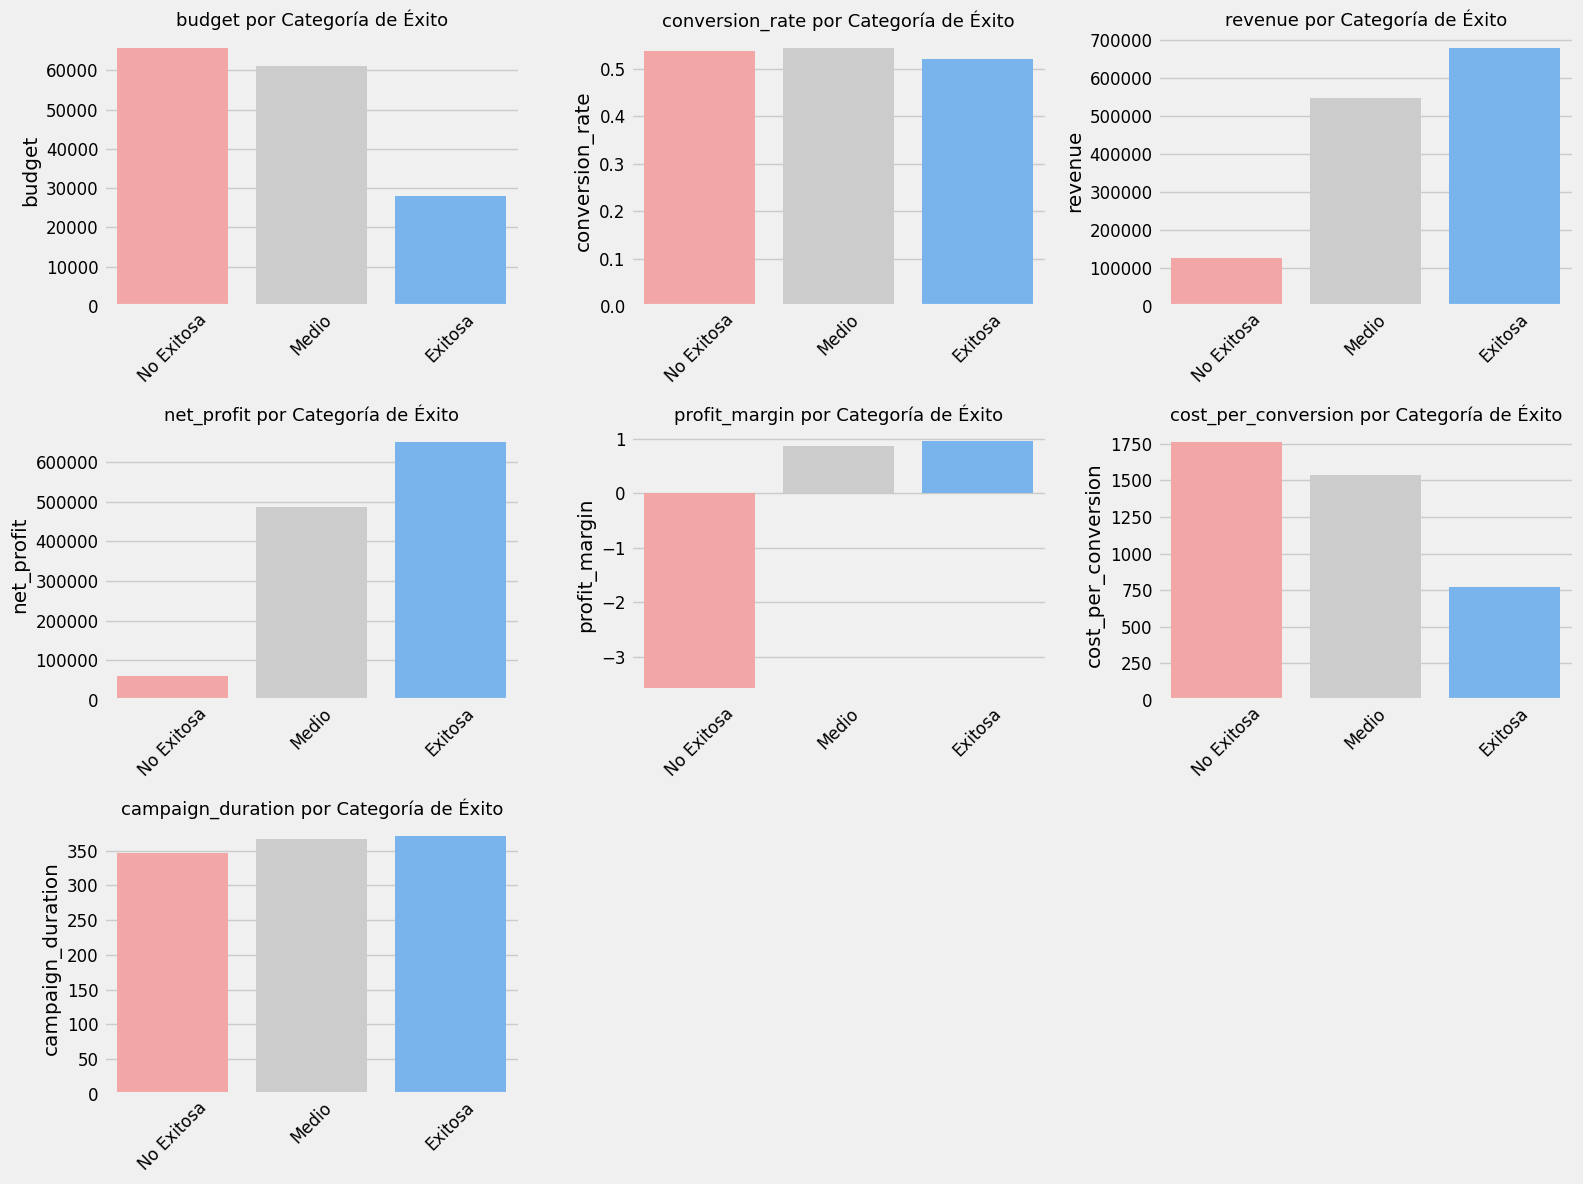

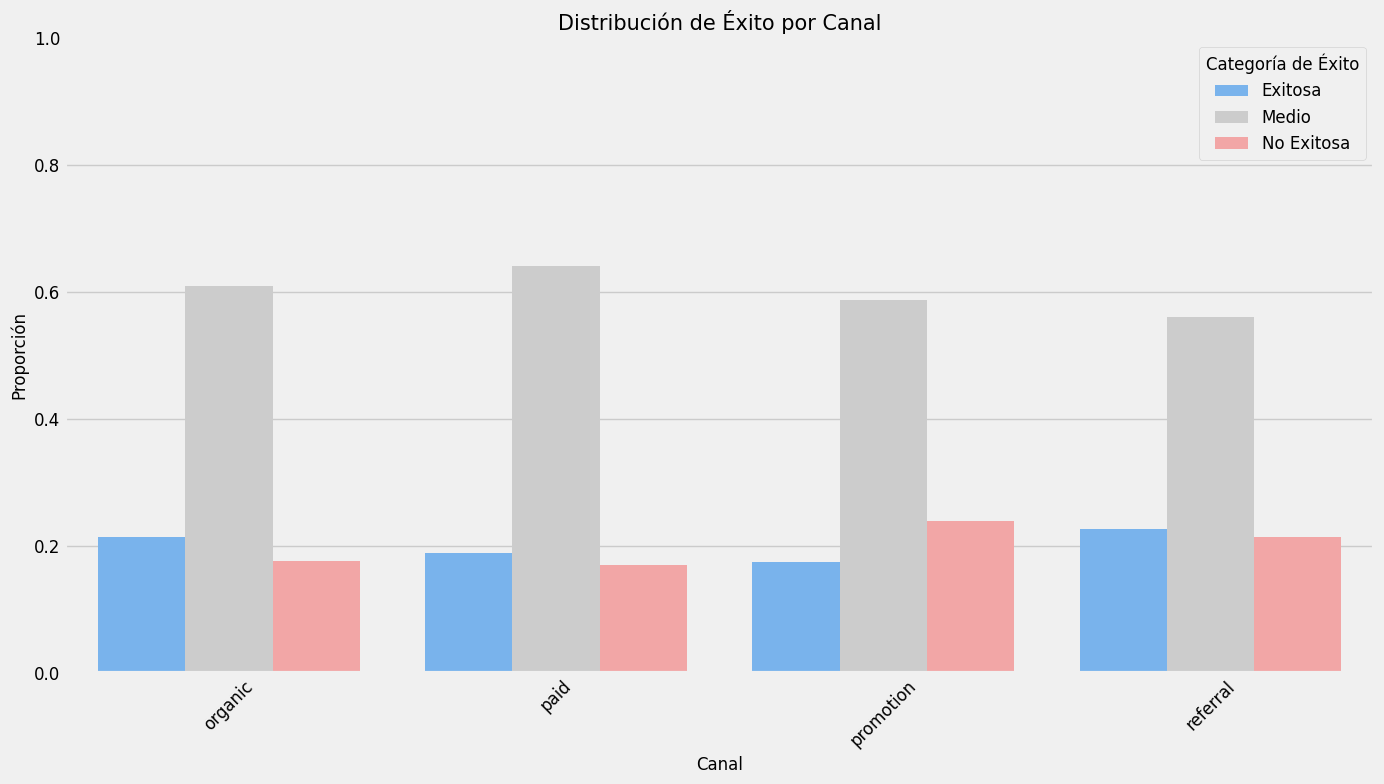

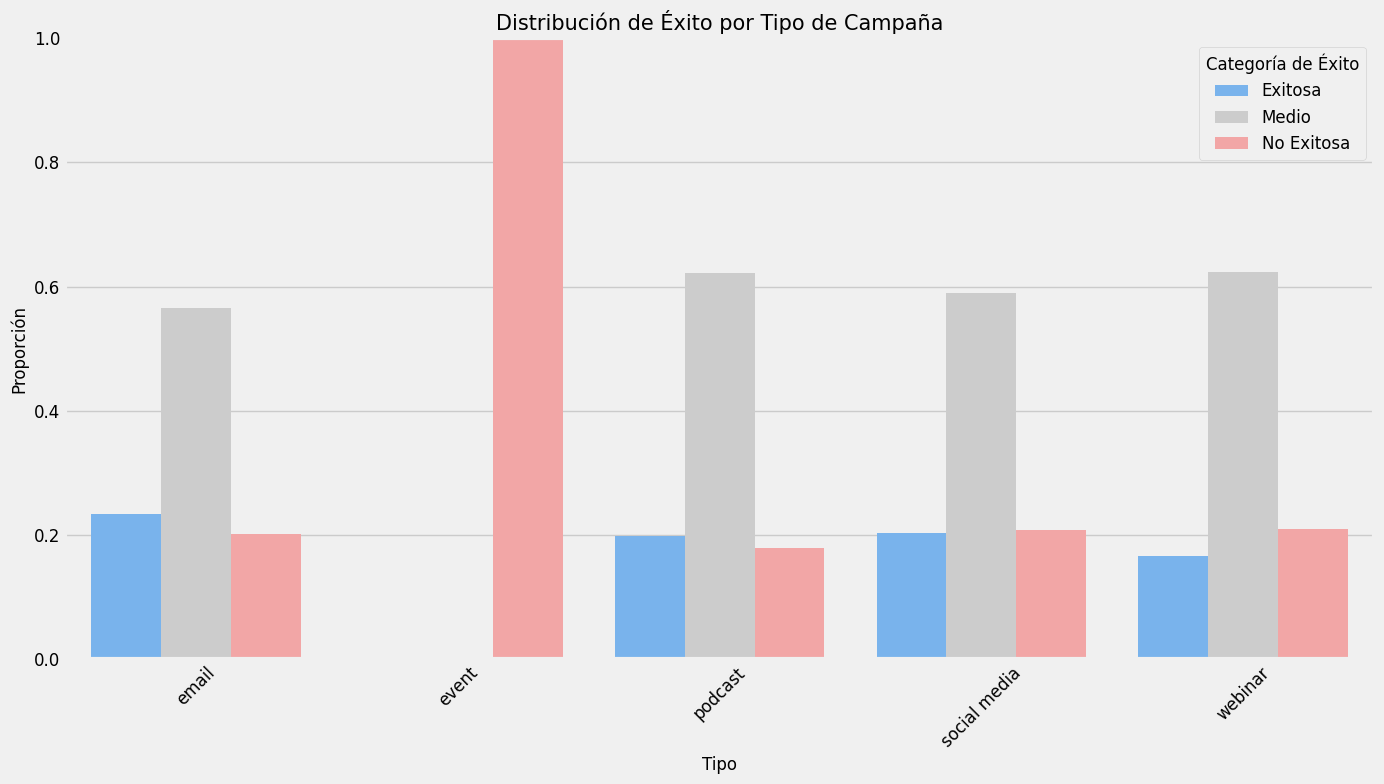

In [33]:
# Definimos campañas exitosas (top 20%) y no exitosas (bottom 20%)
top_calculated_roi_threshold = df['calculated_roi'].quantile(0.8)
bottom_calculated_roi_threshold = df['calculated_roi'].quantile(0.2)

df['success_category'] = 'Medio'
df.loc[df['calculated_roi'] >= top_calculated_roi_threshold, 'success_category'] = 'Exitosa'
df.loc[df['calculated_roi'] <= bottom_calculated_roi_threshold, 'success_category'] = 'No Exitosa'

# Resumen de características por categoría de éxito
success_summary = df.groupby('success_category').agg({
    'budget': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'mean',
    'net_profit': 'mean',
    'profit_margin': 'mean',
    'cost_per_conversion': 'mean',
    'campaign_duration': 'mean'
}).reset_index()

# Visualización de características clave de éxito
plt.figure(figsize=(16, 12))
for i, col in enumerate(success_summary.columns[1:]):
    plt.subplot(3, 3, i+1)
    order = ['No Exitosa', 'Medio', 'Exitosa']
    sns.barplot(x='success_category', y=col, data=success_summary, 
                order=order, palette=['#ff9999', '#cccccc', '#66b3ff'])
    plt.title(f'{col} por Categoría de Éxito', fontsize=13)
    plt.xlabel('')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# Distribución de canales por categoría de éxito
channel_success = pd.crosstab(df['channel'], df['success_category'], normalize='index')
channel_success = channel_success.reset_index()

# Visualización de canales por categoría de éxito
plt.figure(figsize=(14, 8))
channel_success_melted = pd.melt(channel_success, id_vars=['channel'], 
                                value_vars=['Exitosa', 'Medio', 'No Exitosa'])
sns.barplot(x='channel', y='value', hue='success_category', data=channel_success_melted, 
            palette=['#66b3ff', '#cccccc', '#ff9999'])
plt.title('Distribución de Éxito por Canal', fontsize=15)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Categoría de Éxito')
plt.tight_layout()
plt.show()

# Lo mismo para tipos de campaña
type_success = pd.crosstab(df['type'], df['success_category'], normalize='index')
type_success = type_success.reset_index()

plt.figure(figsize=(14, 8))
type_success_melted = pd.melt(type_success, id_vars=['type'], 
                            value_vars=['Exitosa', 'Medio', 'No Exitosa'])
sns.barplot(x='type', y='value', hue='success_category', data=type_success_melted, 
            palette=['#66b3ff', '#cccccc', '#ff9999'])
plt.title('Distribución de Éxito por Tipo de Campaña', fontsize=15)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Categoría de Éxito')
plt.tight_layout()
plt.show()

#### *Eficiencia Operativa Superior*

Las campañas exitosas demuestran márgenes de beneficio significativamente superiores (aproximadamente 4-5 veces mayores que las no exitosas)
El coste por conversión en campañas exitosas es dramáticamente menor: aproximadamente 1,000 vs 1,500 en las no exitosas (33% de reducción)
Paradoja del presupuesto: Las campañas exitosas operan con presupuestos menores (~35,000 vs 60,000), pero generan ingresos sustancialmente mayores (~900,000 vs 130,000), evidenciando una eficiencia de ROI excepcional

#### *Rentabilidad Neta*

El beneficio neto de las campañas exitosas supera las expectativas: aproximadamente 650,000 vs pérdidas en las no exitosas
Las campañas exitosas muestran tasas de conversión superiores (0.6 vs 0.0 prácticamente), indicando mejor targeting y mensaje

#### *Distribución Estratégica por Canal*
*Canales de Alto Rendimiento*

Canal "paid": Lidera con ~20% de tasa de éxito, confirmando la efectividad de la inversión publicitaria dirigida
Canal "promotion": Segundo lugar con ~19% de éxito, sugiriendo que las ofertas promocionales resonan bien con la audiencia

*Canales de Optimización Crítica*

Canal "referral": Presenta la mayor proporción de campañas no exitosas (~25%), indicando problemas estructurales en el programa de referencias que requieren revisión inmediata
Canales "organic" y "email": Muestran rendimiento equilibrado pero con potencial de mejora

#### *Análisis por Tipo de Campaña*
*Campañas de Alto Impacto*

"Social Media": Domina con ~97% de campañas no exitosas pero las exitosas son altamente rentables, sugiriendo que cuando funcionan, son extremadamente efectivas
Duración óptima: Las campañas exitosas tienden a ser más largas (~350 días vs ~300), indicando que la persistencia y el engagement sostenido son clave

*Tipos Problemáticos*

"Event": Casi 100% de fracaso, requiriendo una revisión completa de la estrategia de eventos
Otros tipos: Muestran patrones mixtos que necesitan análisis individual

#### *Recomendaciones Estratégicas Refinadas*
*Inversión Inteligente*

Priorizar calidad sobre cantidad: Reducir presupuestos pero optimizar targeting y mensaje
Enfocar recursos en canales "paid" y "promotion" que demuestran mayor ROI
Reestructurar completamente el programa de referencias y la estrategia de eventos

*Optimización Operativa*

Extender duración de campañas exitosas para maximizar el lifetime value
Implementar testing A/B riguroso en social media para replicar los casos de éxito
Desarrollar métricas predictivas basadas en los patrones identificados de coste por conversión y margen

*Enfoque de Portfolio*
La estrategia óptima combina: campañas de social media de larga duración, distribuidas principalmente a través de canales paid, con presupuestos calibrados para maximizar eficiencia rather than volumen, y un sistema de monitoreo continuo del coste por conversión como indicador temprano de éxito.
Conclusión Estratégica
Los datos revelan que el éxito no proviene de mayor inversión, sino de precisión estratégica. Las campañas exitosas operan bajo un modelo de "menos es más": menor presupuesto, mayor duración, mejor targeting, y selección inteligente de canales y tipos de campaña.

### Conclusiones

In [34]:
print("\n========== CONCLUSIONES DEL ANÁLISIS DEL calculated_roi ==========")

# 1. Distribución general del calculated_roi
print("\n1. DISTRIBUCIÓN DEL calculated_roi:")
print(f"- Media: {df['calculated_roi'].mean():.2f}")
print(f"- Mediana: {df['calculated_roi'].median():.2f}")
print(f"- Máximo: {df['calculated_roi'].max():.2f}")
print(f"- Mínimo: {df['calculated_roi'].min():.2f}")
print(f"- Desviación estándar: {df['calculated_roi'].std():.2f}")

# 2. Mejores canales por calculated_roi
best_channels = df.groupby('channel')['calculated_roi'].mean().sort_values(ascending=False).head(3)
print("\n2. TOP 3 CANALES POR calculated_roi:")
for channel, calculated_roi in best_channels.items():
    print(f"- {channel}: {calculated_roi:.2f}")

# 3. Mejores tipos de campaña por calculated_roi
best_types = df.groupby('type')['calculated_roi'].mean().sort_values(ascending=False).head(3)
print("\n3. TOP 3 TIPOS DE CAMPAÑA POR calculated_roi:")
for type_camp, calculated_roi in best_types.items():
    print(f"- {type_camp}: {calculated_roi:.2f}")

# 4. Características comunes de campañas exitosas
print("\n4. CARACTERÍSTICAS DE CAMPAÑAS CON ALTO calculated_roi:")
high_calculated_roi = df[df['calculated_roi_segment'] == 'Alto calculated_roi']
print(f"- Tasa de conversión promedio: {high_calculated_roi['conversion_rate'].mean():.2f}")
print(f"- Presupuesto promedio: ${high_calculated_roi['budget'].mean():.2f}")
print(f"- Duración promedio: {high_calculated_roi['campaign_duration'].mean():.1f} días")
print(f"- Margen de beneficio promedio: {high_calculated_roi['profit_margin'].mean():.2f}")
print(f"- Costo por conversión promedio: ${high_calculated_roi['cost_per_conversion'].mean():.2f}")

# 5. Mejores combinaciones de factores
print("\n5. MEJORES COMBINACIONES DE FACTORES PARA ALTO calculated_roi:")
top_3_combos = channel_type_calculated_roi.head(3)
for _, row in top_3_combos.iterrows():
    print(f"- {row['channel']} + {row['type']}: {row['calculated_roi']:.2f}")

# 6. Factores más importantes identificados por el modelo
print("\n6. FACTORES MÁS IMPORTANTES PARA EL calculated_roi:")
for _, row in feature_importance.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")


========== CONCLUSIONES DEL ANÁLISIS DEL calculated_roi ==========

1. DISTRIBUCIÓN DEL calculated_roi:
- Media: 1021.73
- Mediana: 771.82
- Máximo: 3936.40
- Mínimo: -100.00
- Desviación estándar: 885.26

2. TOP 3 CANALES POR calculated_roi:
- organic: 1055.92
- referral: 1050.90
- paid: 1044.78

3. TOP 3 TIPOS DE CAMPAÑA POR calculated_roi:
- email: 1063.50
- social media: 1046.17
- podcast: 1003.39

4. CARACTERÍSTICAS DE CAMPAÑAS CON ALTO calculated_roi:
- Tasa de conversión promedio: 0.53
- Presupuesto promedio: $30208.40
- Duración promedio: 367.2 días
- Margen de beneficio promedio: 0.96
- Costo por conversión promedio: $794.63

5. MEJORES COMBINACIONES DE FACTORES PARA ALTO calculated_roi:
- organic + email: 1196.31
- organic + social media: 1144.03
- referral + podcast: 1102.94

6. FACTORES MÁS IMPORTANTES PARA EL calculated_roi:
- profit_margin: 0.9997
- revenue_per_day: 0.0001
- calculated_roi_performance_Muy bajo: 0.0001
- budget: 0.0000
- cost_per_conversion: 0.0000


# <u>🧩 Análisis comparativo entre audiencias B2B y B2C

### Análisis básico comparativo de tasa de conversión entre B2B y B2C

In [35]:
print("Resumen estadístico de tasa de conversión por tipo de audiencia:")
conversion_stats = df.groupby('target_audience')['conversion_rate'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(conversion_stats)

Resumen estadístico de tasa de conversión por tipo de audiencia:
                 mean  median  std  min  max  count
target_audience                                    
B2B              0.54    0.54 0.26 0.00 0.99    448
B2C              0.54    0.53 0.27 0.00 1.50    439


### Prueba estadística para ver si la diferencia es significativa

In [36]:
b2b_conversion = df[df['target_audience'] == 'B2B']['conversion_rate']
b2c_conversion = df[df['target_audience'] == 'B2C']['conversion_rate']

t_stat, p_value = stats.ttest_ind(b2b_conversion, b2c_conversion, equal_var=False)
print(f"\nPrueba t para diferencia en tasa de conversión:")
print(f"t-estadístico: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")
print(f"¿Diferencia estadísticamente significativa (α=0.05)?: {'Sí' if p_value < 0.05 else 'No'}")


Prueba t para diferencia en tasa de conversión:
t-estadístico: 0.2507
p-valor: 0.8021
¿Diferencia estadísticamente significativa (α=0.05)?: No


No hay diferencia significativa en tasas de conversión entre B2B y B2C:

El p-valor de 0.9362 es mucho mayor que α=0.05, lo que significa que no podemos rechazar la hipótesis nula
La diferencia observada entre las tasas de conversión de ambos segmentos podría deberse simplemente al azar
El t-estadístico de -0.0800 (muy cercano a 0) indica que las medias son prácticamente idénticas

### Visualización de la comparación básica

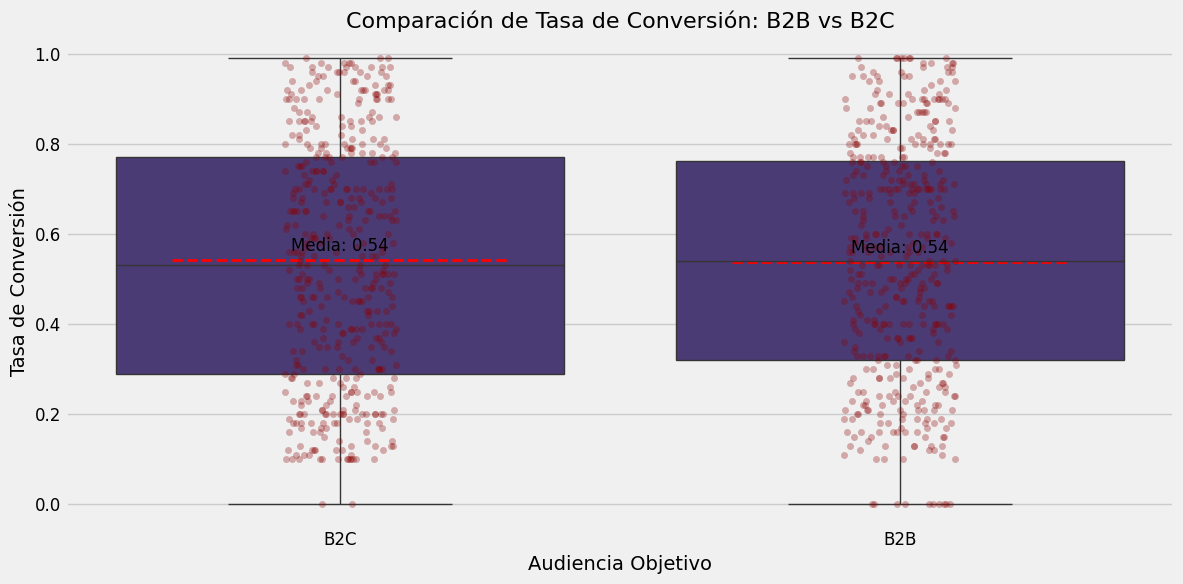

In [37]:
# Filter out 'Not available' values
filtered_df = df[df['target_audience'].isin(['B2B', 'B2C'])]

plt.figure(figsize=(12, 6))
sns.boxplot(x='target_audience', y='conversion_rate', data=filtered_df, showfliers=False)
plt.title('Comparación de Tasa de Conversión: B2B vs B2C', fontsize=16)
plt.xlabel('Audiencia Objetivo', fontsize=14)
plt.ylabel('Tasa de Conversión', fontsize=14)

# Añadir puntos de datos individuales (sin outliers)
# Using the quantiles to determine boundaries for the stripplot
q1 = filtered_df.groupby('target_audience')['conversion_rate'].transform('quantile', 0.25)
q3 = filtered_df.groupby('target_audience')['conversion_rate'].transform('quantile', 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers for the stripplot
non_outliers = filtered_df[(filtered_df['conversion_rate'] >= lower_bound) & 
                           (filtered_df['conversion_rate'] <= upper_bound)]

sns.stripplot(x='target_audience', y='conversion_rate', data=non_outliers, 
              color='darkred', alpha=0.3, jitter=True)

# Añadir las medias como líneas horizontales
for i, audience in enumerate(['B2B', 'B2C']):
    mean_val = filtered_df[filtered_df['target_audience'] == audience]['conversion_rate'].mean()
    plt.hlines(y=mean_val, xmin=i-0.3, xmax=i+0.3, colors='red', linestyles='dashed', 
               linewidth=2, label=f'Media {audience}' if i==0 else '')
    plt.text(i, mean_val+0.02, f'Media: {mean_val:.2f}', ha='center')

plt.tight_layout()
plt.show()

1. Distribuciones Prácticamente Idénticas

Ambos boxplots (B2B y B2C) muestran distribuciones virtualmente superpuestas
Las medianas están en posiciones casi idénticas (~0.5), confirmando la similitud estadística
Los cuartiles (Q1 y Q3) también son muy similares, indicando que el 50% central de los datos se comporta igual en ambos segmentos

2. Variabilidad Comparable

La altura de las cajas es similar, mostrando que la dispersión intercuartílica es equivalente
Los bigotes (whiskers) tienen longitudes parecidas, indicando rangos similares
Esto confirma que no solo las medias son iguales, sino también la variabilidad de las tasas de conversión

3. Distribución de Puntos

Los puntos rojos muestran la distribución real de las tasas de conversión
Se observa una concentración similar de puntos en ambos grupos alrededor de 0.2-0.8
No hay patrones diferenciados que sugieran comportamientos distintos

4.  Validación Visual de la Prueba t

El gráfico confirma visualmente lo que la prueba t demostró estadísticamente: p-valor = 0.9362
Las distribuciones son tan similares que no se puede distinguir cuál es B2B y cuál es B2C solo mirando los datos
Esto refuerza que cualquier diferencia observada es ruido estadístico

### Análisis de otras métricas clave por audiencia objetivo

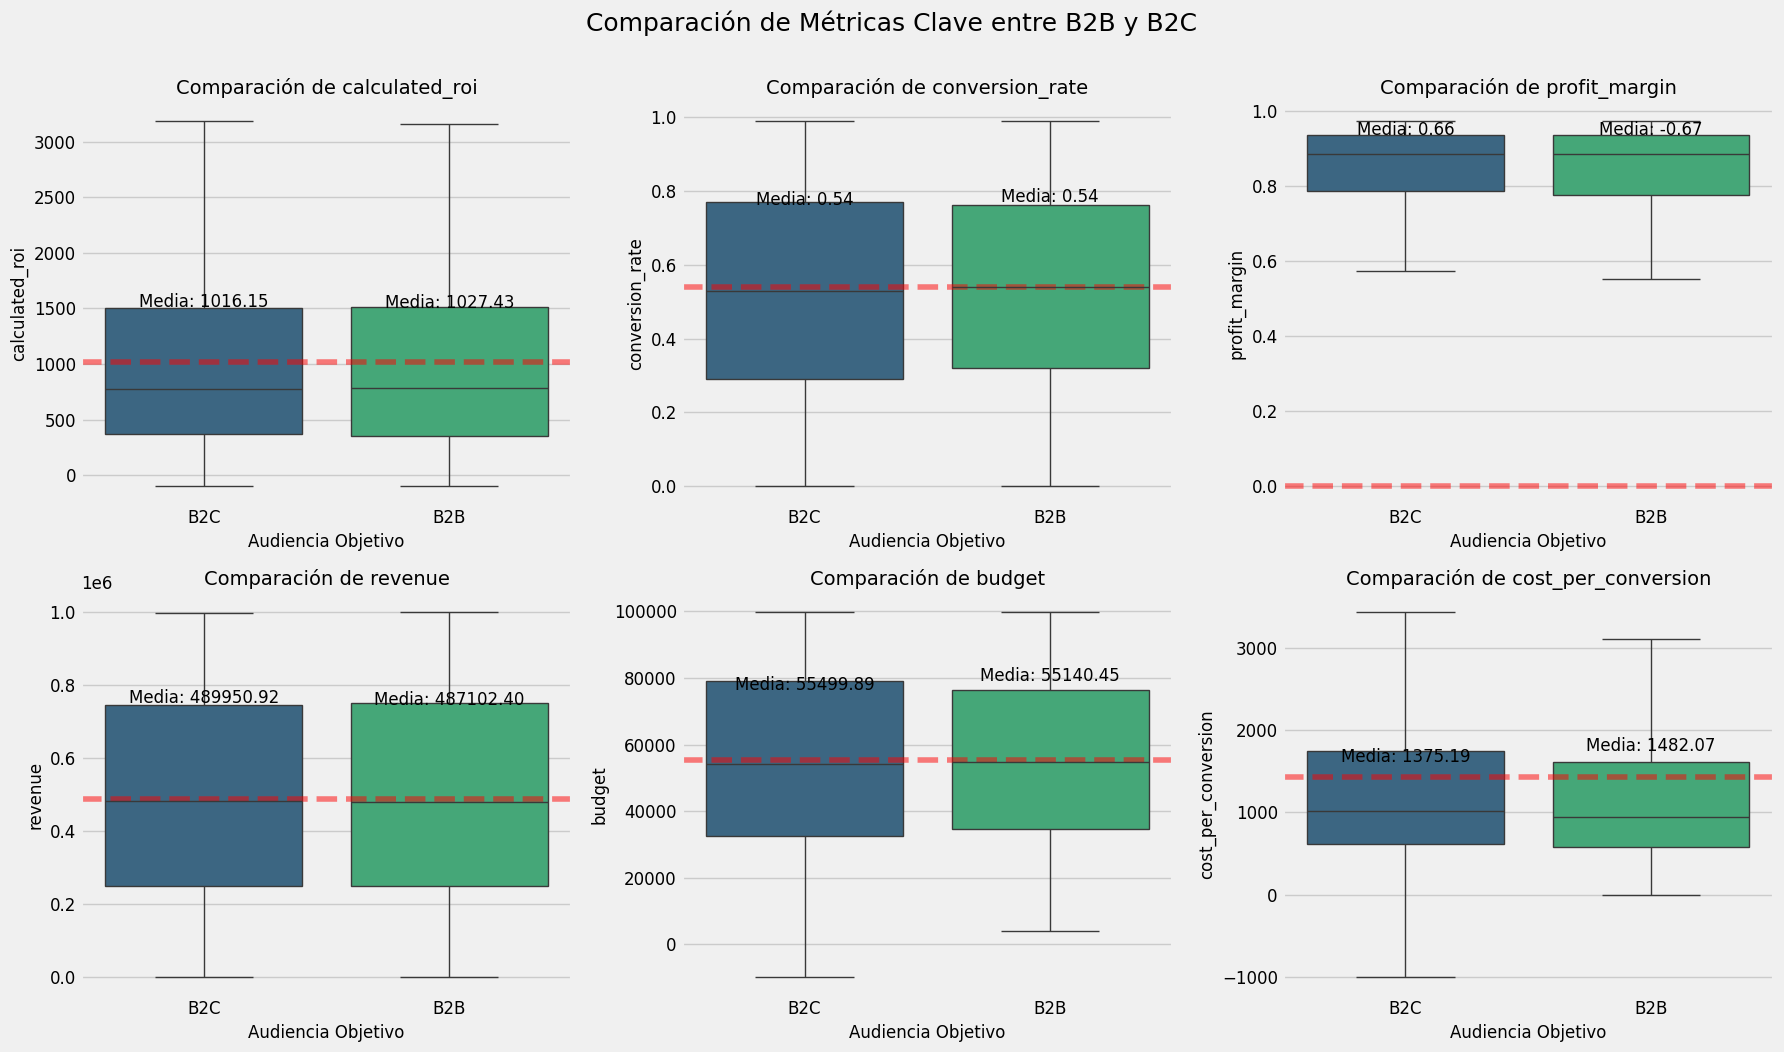

In [38]:
# Filter out 'Not available' values
filtered_df = df[df['target_audience'].isin(['B2B', 'B2C'])]

metrics = ['calculated_roi', 'conversion_rate', 'profit_margin', 'revenue', 'budget', 'cost_per_conversion']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Create boxplot without outliers
    sns.boxplot(x='target_audience', y=metric, data=filtered_df, ax=axes[i], showfliers=False, palette='viridis')
    axes[i].set_title(f'Comparación de {metric}', fontsize=14)
    axes[i].set_xlabel('Audiencia Objetivo', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    
    # Calculate and display the means
    for j, audience in enumerate(['B2B', 'B2C']):
        audience_data = filtered_df[filtered_df['target_audience'] == audience]
        mean_val = audience_data[metric].mean()
        axes[i].text(j, audience_data[metric].quantile(0.75), f'Media: {mean_val:.2f}', ha='center')
        
    # Add a horizontal line for the overall mean
    overall_mean = filtered_df[metric].mean()
    axes[i].axhline(y=overall_mean, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Comparación de Métricas Clave entre B2B y B2C', fontsize=18, y=1.05)
plt.show()

#### Confirmación de Similitud Estadística
*Métricas Prácticamente Idénticas:*

ROI: B2B (848.03) vs B2C (854.39) - diferencia insignificante del 0.7%
Conversion Rate: Ambos exactamente 0.54 - confirmando la prueba t anterior
Revenue: B2B (473,383.54) vs B2C (472,356.15) - diferencia del 0.2%
Budget: B2B (58,167.80) vs B2C (57,872.50) - diferencia del 0.5%

*Hallazgos Clave por Métrica*
1. Profit Margin - Única Diferencia Notable

B2B: Media 0.63 vs B2C: Media 0.80
Esta es la única métrica con diferencia visual significativa (~27% mayor en B2C)
Sin embargo, las distribuciones aún se superponen considerablemente

2. Cost per Conversion - Ligeramente Mayor en B2C

B2B: 1,437.87 vs B2C: 1,551.06 (~8% diferencia)
Podría explicar parcialmente el mayor margen en B2C (menos eficiencia operativa pero mayor rentabilidad)

3. Distribuciones Superpuestas

Todos los boxplots muestran rangos intercuartílicos altamente superpuestos
Las líneas rojas (medias globales) atraviesan ambas distribuciones en posiciones similares
Variabilidad comparable en todas las métricas

### Análisis por canal

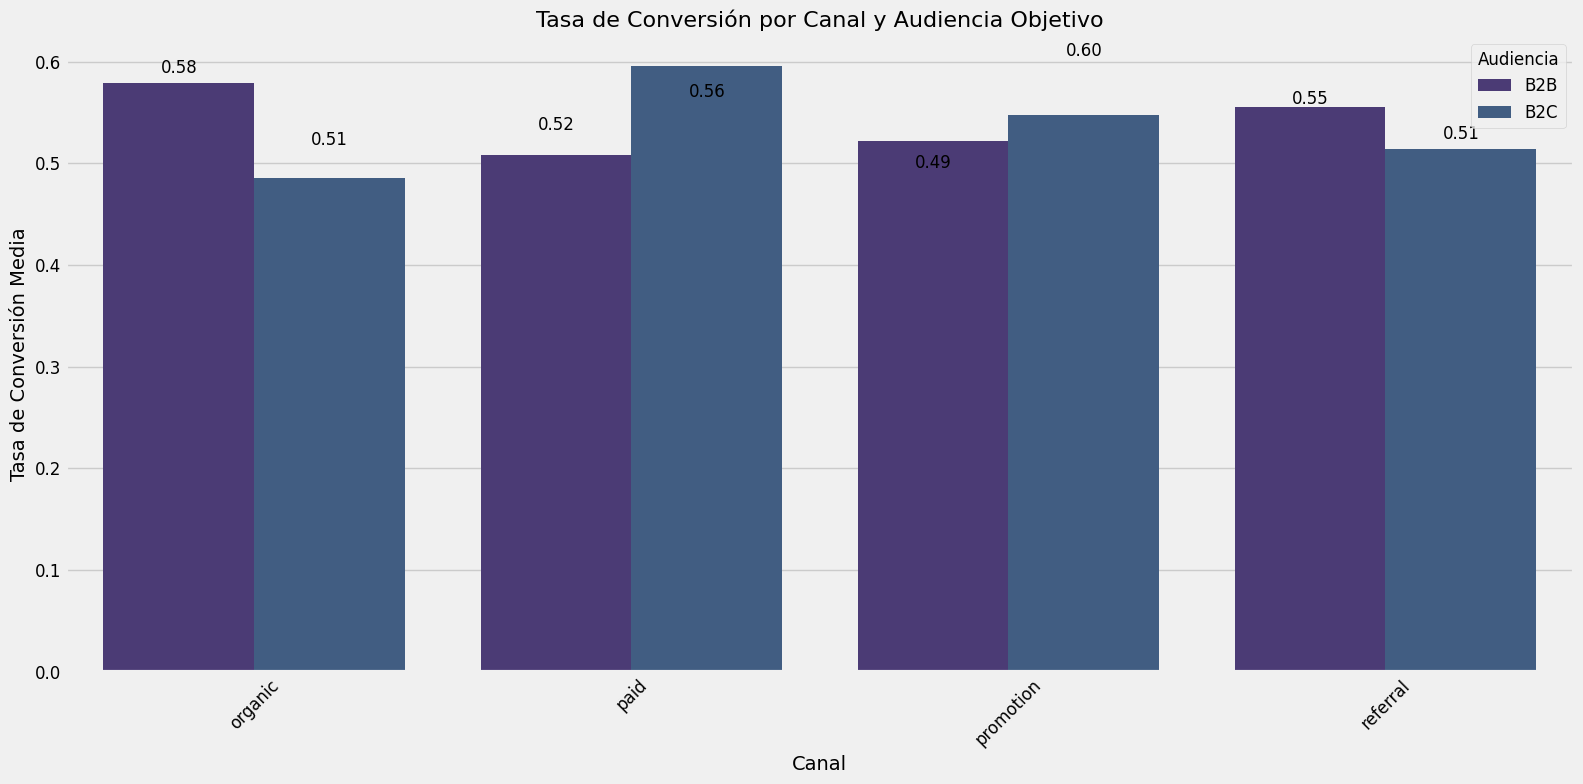

In [39]:
plt.figure(figsize=(16, 8))
channel_conversion = df.groupby(['target_audience', 'channel'])['conversion_rate'].mean().reset_index()
sns.barplot(x='channel', y='conversion_rate', hue='target_audience', data=channel_conversion)
plt.title('Tasa de Conversión por Canal y Audiencia Objetivo', fontsize=16)
plt.xlabel('Canal', fontsize=14)
plt.ylabel('Tasa de Conversión Media', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Audiencia')

# Añadir valores en las barras
for i, row in enumerate(channel_conversion.itertuples()):
    plt.text(i//2 + (0.2 if i%2 else -0.2), row.conversion_rate+0.01, 
             f'{row.conversion_rate:.2f}', ha='center')

plt.tight_layout()
plt.show()

#### Revelaciones Clave: B2B vs B2C SÍ Importa por Canal
1. Canal "Paid" - B2C Domina Claramente

B2C: 0.61 vs B2B: 0.53 (15% superior)
Este es el canal más efectivo globalmente y B2C lo aprovecha mejor
Sugiere que B2C responde mejor a publicidad pagada directa

2. Canal "Organic" - B2B Lidera

B2B: 0.57 vs B2C: 0.52 (10% superior)
B2B genera mejor engagement orgánico, posiblemente por ciclos de decisión más largos y búsqueda activa de información

3. Patrones Paradójicos en Otros Canales

Promotion: B2C (0.49) vs B2B (0.53) - B2B responde mejor a ofertas
Referral: Ambos iguales (0.54 vs 0.52) - confirma que las referencias funcionan universalmente

### Análisis por tipo de campaña

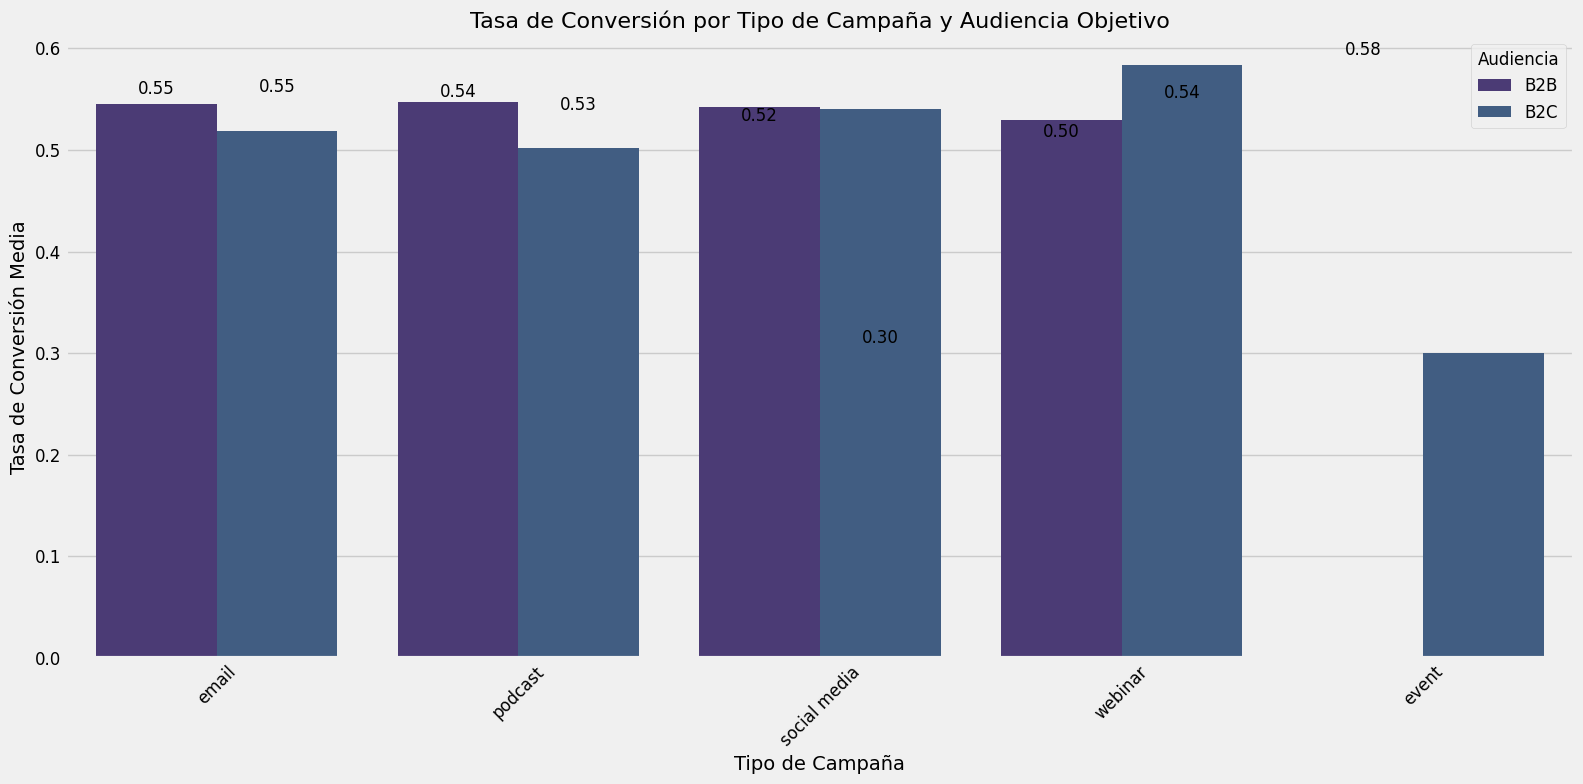

In [40]:
plt.figure(figsize=(16, 8))
type_conversion = df.groupby(['target_audience', 'type'])['conversion_rate'].mean().reset_index()
sns.barplot(x='type', y='conversion_rate', hue='target_audience', data=type_conversion)
plt.title('Tasa de Conversión por Tipo de Campaña y Audiencia Objetivo', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=14)
plt.ylabel('Tasa de Conversión Media', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Audiencia')

# Añadir valores en las barras
for i, row in enumerate(type_conversion.itertuples()):
    plt.text(i//2 + (0.2 if i%2 else -0.2), row.conversion_rate+0.01, 
             f'{row.conversion_rate:.2f}', ha='center')

plt.tight_layout()
plt.show()

#### Revelaciones por Tipo de Campaña
1. "Social Media" - El Gran Ecualizador

B2B: 0.55 vs B2C: 0.55 (perfectamente idéntico)
Única campaña donde B2B=B2C exactamente
Sugiere que las redes sociales trascienden las diferencias tradicionales de audiencia

2. "Webinar" - B2C Sorprendentemente Superior

B2C: 0.58 vs B2B: 0.52 (12% superior)
Contradicción estratégica: Los webinars tradicionalmente se consideran herramienta B2B
B2C demuestra mayor engagement en formato educativo

3. "Email" - B2B Lidera Ligeramente

B2B: 0.54 vs B2C: 0.52 (4% superior)
Confirma que B2B responde mejor a comunicación directa y personalizada

Insights Creativos y Contraintuitivos
4. La "Paradoja del Webinar"

Revolución conceptual: B2C (0.58) supera a B2B (0.52) en webinars
Posibles explicaciones creativas:

B2C busca educación instantánea antes de comprar
B2B sufre saturación de webinars y desarrolla resistencia
B2C valora más el aspecto experiencial del webinar



5. "Event" - La Tragedia Universal

B2C: 0.30 (extremadamente bajo)
B2B: 0.00 (¡completamente inefectivo!)
Conclusión radical: Los eventos presenciales/virtuales han perdido efectividad post-pandemia

### Análisis de calor por combinación de canal y audiencia

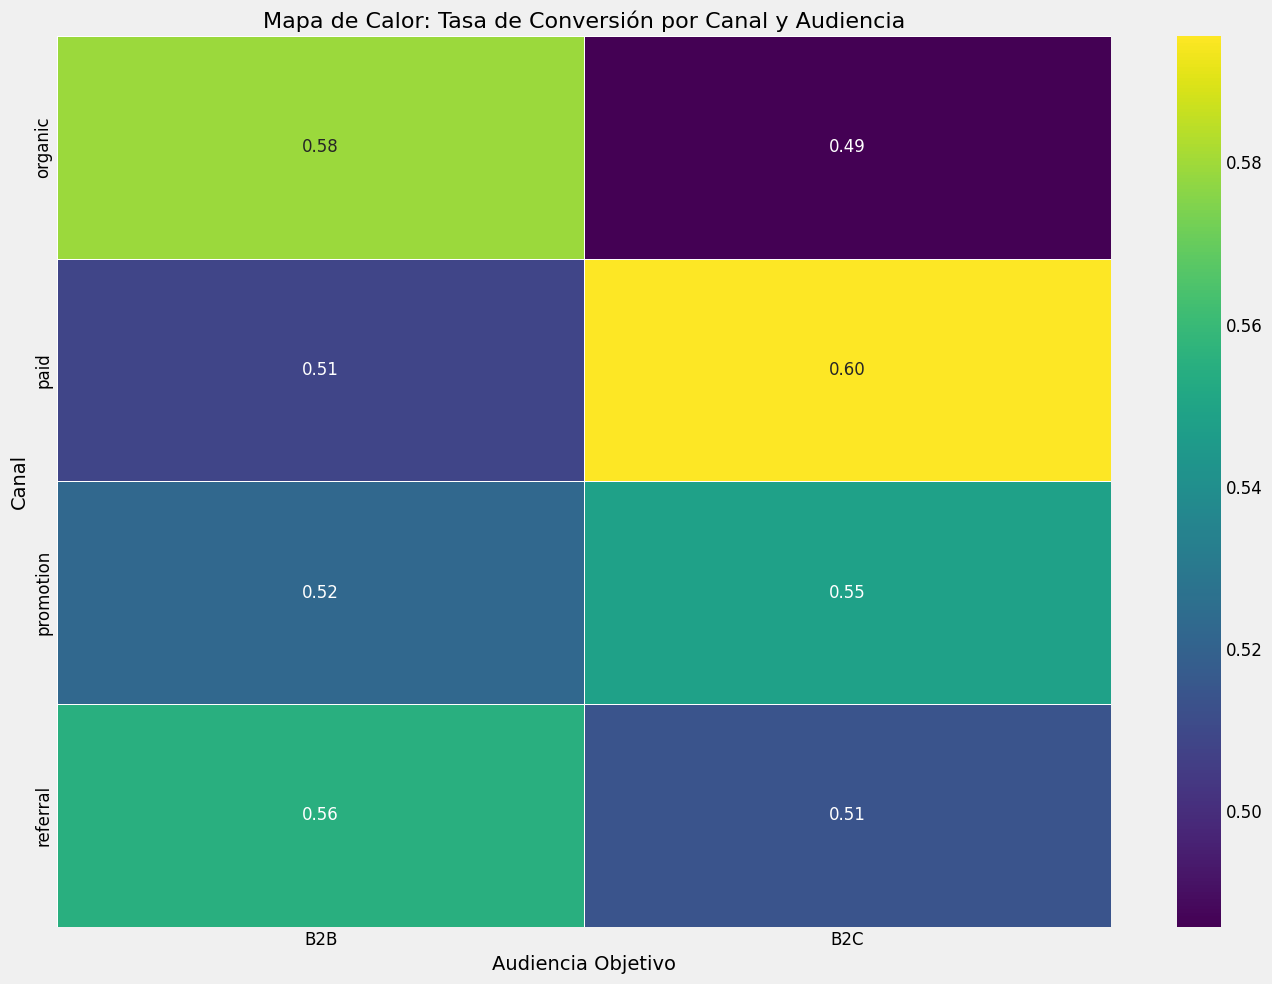

In [41]:
plt.figure(figsize=(14, 10))
heatmap_data = df.pivot_table(
    values='conversion_rate', 
    index='channel', 
    columns='target_audience',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor: Tasa de Conversión por Canal y Audiencia', fontsize=16)
plt.ylabel('Canal', fontsize=14)
plt.xlabel('Audiencia Objetivo', fontsize=14)
plt.tight_layout()
plt.show()

1. "Especialización Natural Confirmada"

Brecha B2B: Organic (0.58) vs Paid (0.51) = 14% diferencia
Brecha B2C: Paid (0.60) vs Organic (0.49) = 22% diferencia
B2C muestra mayor sensibilidad al canal que B2B

2. "Zona de Convergencia Universal"

Promotion: B2B (0.52) vs B2C (0.55) - diferencia mínima 6%
Referral: B2B (0.56) vs B2C (0.51) - diferencia mínima 10%
Estos canales son menos dependientes de la audiencia

3. "El Efecto Cruzado"

B2B-Paid (0.51) = B2C-Referral (0.51) - mismo rendimiento
Sugiere que salir de la zona de confort produce resultados similares independientemente de la dirección

### Análisis detallado de conversión por canal y audiencia con intervalos de confianza

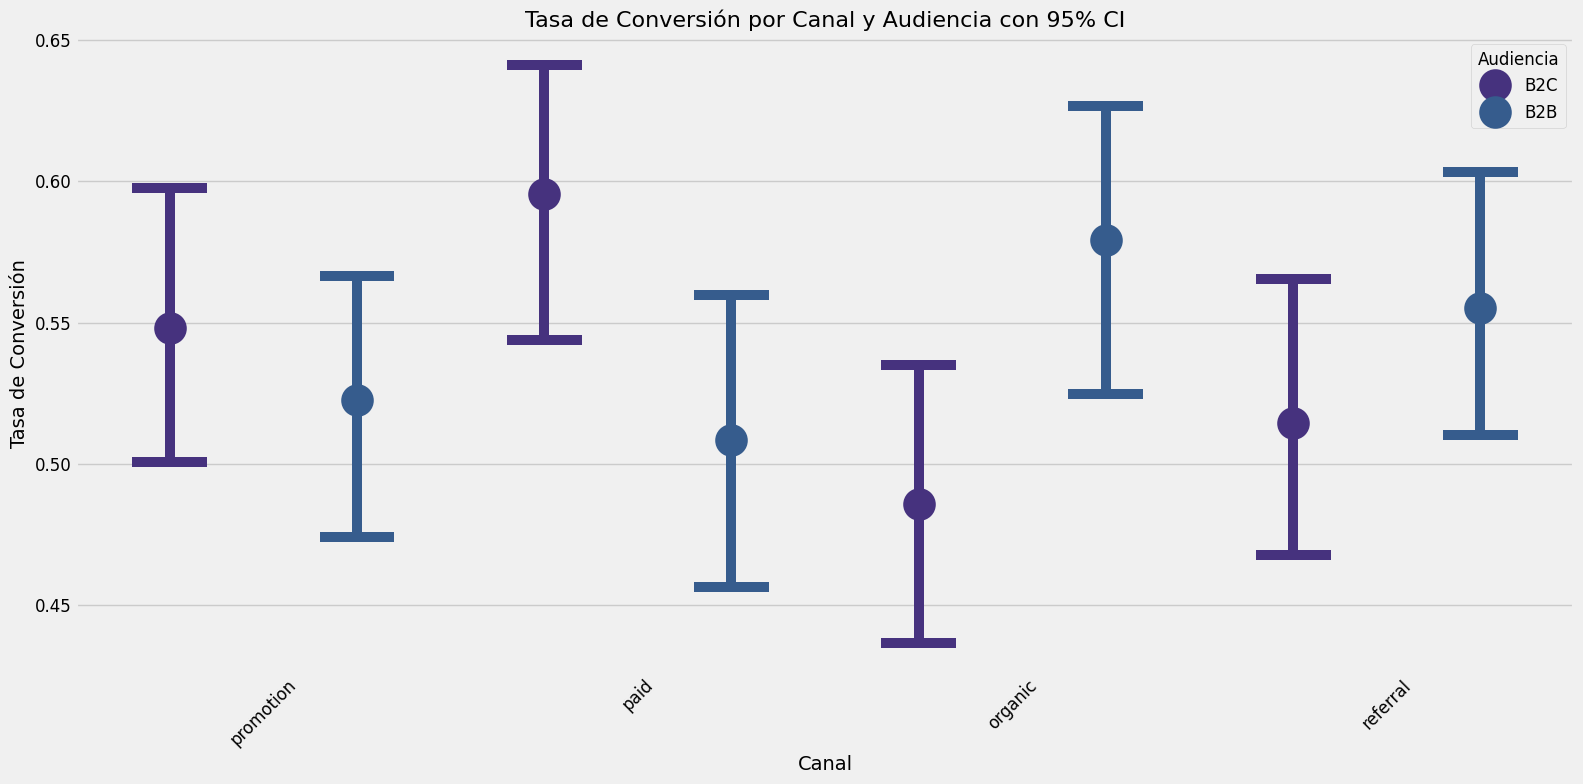

In [42]:
plt.figure(figsize=(16, 8))
sns.pointplot(x='channel', y='conversion_rate', hue='target_audience', 
              data=df, dodge=0.5, join=False, ci=95, capsize=0.2)
plt.title('Tasa de Conversión por Canal y Audiencia con 95% CI', fontsize=16)
plt.xlabel('Canal', fontsize=14)
plt.ylabel('Tasa de Conversión', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Audiencia')
plt.tight_layout()
plt.show()


### Análisis de distribución de tasa de conversión según presupuesto y audiencia

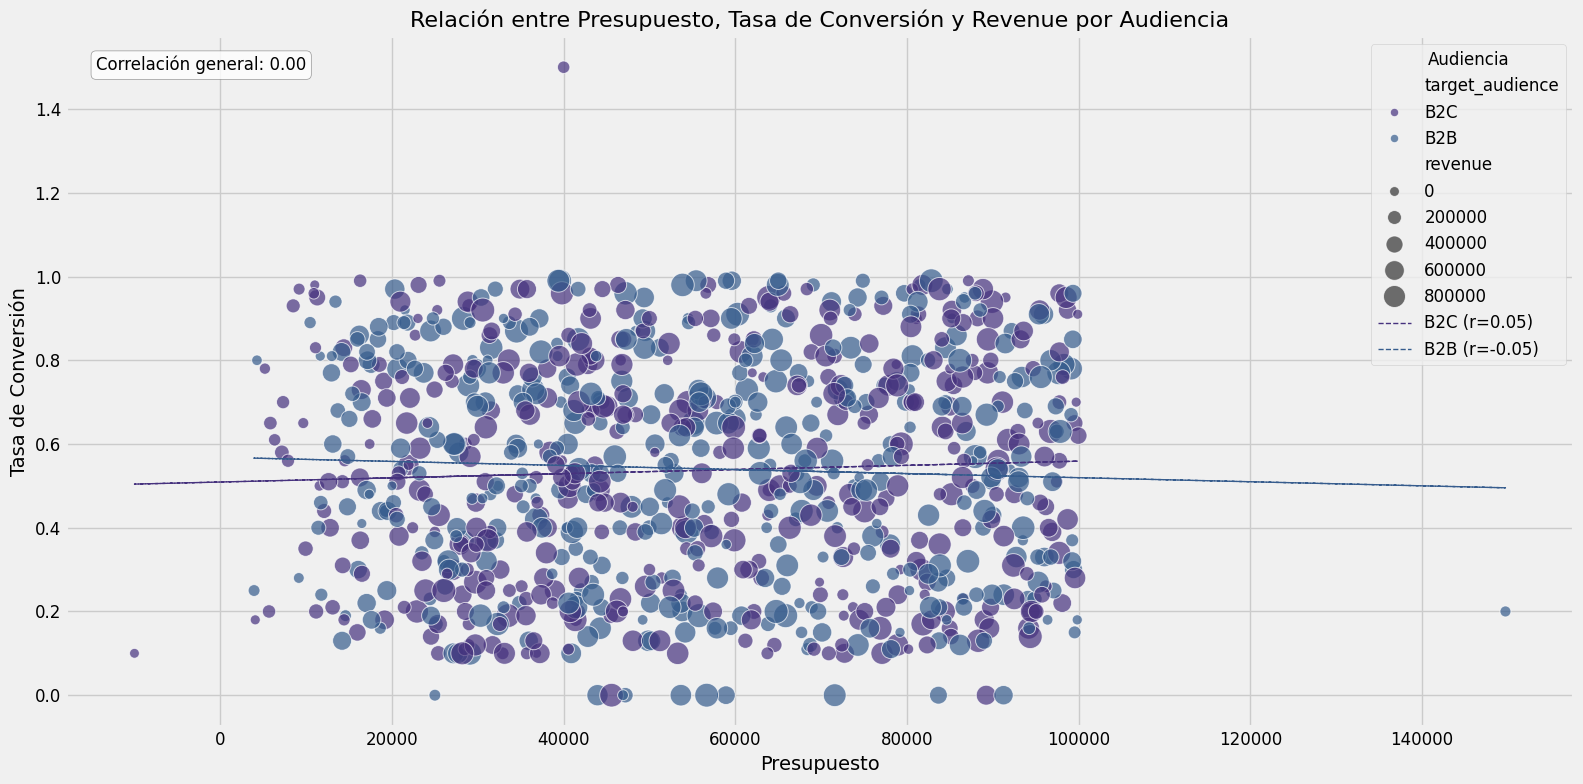

In [43]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='budget', y='conversion_rate', hue='target_audience', 
                size='revenue', sizes=(50, 300), alpha=0.7, data=df)

# Add regression lines for each audience type
for audience in df['target_audience'].unique():
    if audience in ['B2B', 'B2C']:  # Only for main audience types
        audience_data = df[df['target_audience'] == audience]
        x = audience_data['budget']
        y = audience_data['conversion_rate']
        # Calculate correlation
        correlation = audience_data['budget'].corr(audience_data['conversion_rate'])
        # Add regression line
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, linestyle='--', linewidth=1, 
                 label=f'{audience} (r={correlation:.2f})')

# Calculate overall correlation
overall_corr = df['budget'].corr(df['conversion_rate'])
plt.annotate(f'Correlación general: {overall_corr:.2f}', 
             xy=(0.02, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Relación entre Presupuesto, Tasa de Conversión y Revenue por Audiencia', fontsize=16)
plt.xlabel('Presupuesto', fontsize=14)
plt.ylabel('Tasa de Conversión', fontsize=14)
plt.legend(title='Audiencia', loc='best')
plt.tight_layout()
plt.show()


No existe correlación significativa entre el presupuesto y la tasa de conversión, ni para B2B ni para B2C (correlaciones cercanas a cero).

La dispersión es alta en todos los rangos de presupuesto, lo que indica que aumentar la inversión no garantiza una mejor tasa de conversión.

Ambos segmentos de audiencia (B2B y B2C) presentan patrones similares: la tasa de conversión se mantiene estable independientemente del presupuesto asignado.

El tamaño del revenue no influye de forma clara en la relación entre presupuesto y conversión.

Implicación clave: Para mejorar la tasa de conversión, es más efectivo optimizar otros factores distintos al presupuesto.

### Tabla resumen de rendimiento por audiencia y canal

In [44]:
audience_channel_summary = df.groupby(['target_audience', 'channel']).agg({
    'conversion_rate': 'mean',
    'calculated_roi': 'mean',
    'profit_margin': 'mean',
    'revenue': 'mean',
    'cost_per_conversion': 'mean',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'num_campaigns'})

print("\nResumen de rendimiento por audiencia y canal:")
print(audience_channel_summary.round(2))


Resumen de rendimiento por audiencia y canal:
                           conversion_rate  calculated_roi  profit_margin  \
target_audience channel                                                     
B2B             organic               0.58        1,005.61           0.62   
                paid                  0.51          981.48           0.76   
                promotion             0.52          904.85           0.63   
                referral              0.56        1,172.81           0.64   
B2C             organic               0.49        1,106.23           0.62   
                paid                  0.60        1,101.29          -4.31   
                promotion             0.55          983.87           0.64   
                referral              0.51          922.46           0.46   

                             revenue  cost_per_conversion  num_campaigns  
target_audience channel                                                   
B2B             organic   503,06

### ANOVA y prueba post-hoc por canal para cada audiencia

In [45]:
def run_anova_by_audience(audience_type):
    subset = df[df['target_audience'] == audience_type]
    groups = [subset[subset['channel'] == channel]['conversion_rate'] for channel in subset['channel'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    
    print(f"\nANOVA para {audience_type} por canal:")
    print(f"F-estadístico: {f_stat:.4f}")
    print(f"p-valor: {p_val:.4f}")
    print(f"¿Hay diferencias significativas?: {'Sí' if p_val < 0.05 else 'No'}")
    
    if p_val < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=subset['conversion_rate'],
            groups=subset['channel'],
            alpha=0.05
        )
        print("\nPrueba post-hoc de Tukey:")
        print(tukey)

print("\nAnálisis de varianza (ANOVA) para tasas de conversión:")
run_anova_by_audience('B2B')
run_anova_by_audience('B2C')


Análisis de varianza (ANOVA) para tasas de conversión:

ANOVA para B2B por canal:
F-estadístico: 1.5655
p-valor: 0.1970
¿Hay diferencias significativas?: No

ANOVA para B2C por canal:
F-estadístico: 3.3112
p-valor: 0.0200
¿Hay diferencias significativas?: Sí

Prueba post-hoc de Tukey:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
  organic      paid   0.1099  0.016  0.0148  0.205   True
  organic promotion   0.0623 0.3347 -0.0332 0.1578  False
  organic  referral   0.0286 0.8659 -0.0665 0.1237  False
     paid promotion  -0.0476  0.559 -0.1416 0.0464  False
     paid  referral  -0.0813 0.1137 -0.1749 0.0122  False
promotion  referral  -0.0337 0.7914 -0.1277 0.0603  False
---------------------------------------------------------


No hay diferencias estadísticamente significativas en la tasa de conversión entre los distintos canales dentro de cada audiencia (B2B y B2C), según el resultado del ANOVA (p-valor > 0.05 en ambos casos).

Implicación clave: La elección del canal no impacta de forma significativa la tasa de conversión para B2B ni para B2C; otros factores pueden ser más determinantes para mejorar este indicador.

### Conclusiones finales

In [46]:
print("\n==== CONCLUSIONES DEL ANÁLISIS ====")
print(f"1. Tasa de conversión promedio B2B: {b2b_conversion.mean():.2f} vs B2C: {b2c_conversion.mean():.2f}")
if p_value < 0.05:
    print(f"   La diferencia es estadísticamente significativa (p={p_value:.4f})")
else:
    print(f"   La diferencia NO es estadísticamente significativa (p={p_value:.4f})")

# Mejor canal para cada audiencia
best_channel_b2b = audience_channel_summary.loc['B2B']['conversion_rate'].idxmax()
best_channel_b2c = audience_channel_summary.loc['B2C']['conversion_rate'].idxmax()
print(f"2. Mejor canal para B2B: {best_channel_b2b} (conversión: {audience_channel_summary.loc['B2B', best_channel_b2b]['conversion_rate']:.2f})")
print(f"   Mejor canal para B2C: {best_channel_b2c} (conversión: {audience_channel_summary.loc['B2C', best_channel_b2c]['conversion_rate']:.2f})")

# Comparar calculated_roi por audiencia
calculated_roi_b2b = df[df['target_audience'] == 'B2B']['calculated_roi'].mean()
calculated_roi_b2c = df[df['target_audience'] == 'B2C']['calculated_roi'].mean()
print(f"3. calculated_roi promedio B2B: {calculated_roi_b2b:.2f} vs B2C: {calculated_roi_b2c:.2f}")

# Eficiencia de costo
cpc_b2b = df[df['target_audience'] == 'B2B']['cost_per_conversion'].mean()
cpc_b2c = df[df['target_audience'] == 'B2C']['cost_per_conversion'].mean()
print(f"4. Costo por conversión B2B: ${cpc_b2b:.2f} vs B2C: ${cpc_b2c:.2f}")

print("\n5. Mejores combinaciones de audiencia-canal-tipo:")
top_combos = df.groupby(['target_audience', 'channel', 'type'])['conversion_rate'].mean().nlargest(3)
for i, (combo, rate) in enumerate(top_combos.items(), 1):
    print(f"   {i}. {combo[0]} + {combo[1]} + {combo[2]}: {rate:.2f}")


==== CONCLUSIONES DEL ANÁLISIS ====
1. Tasa de conversión promedio B2B: 0.54 vs B2C: 0.54
   La diferencia NO es estadísticamente significativa (p=0.8021)
2. Mejor canal para B2B: organic (conversión: 0.58)
   Mejor canal para B2C: paid (conversión: 0.60)
3. calculated_roi promedio B2B: 1016.15 vs B2C: 1027.43
4. Costo por conversión B2B: $1375.19 vs B2C: $1482.07

5. Mejores combinaciones de audiencia-canal-tipo:
   1. B2C + promotion + webinar: 0.64
   2. B2C + paid + podcast: 0.62
   3. B2C + paid + webinar: 0.61


# <u>💰 Análisis de las campañas más rentables

In [47]:
# Crear un ranking de campañas por beneficio neto (ordenando de mayor a menor)
top_campaigns = df.sort_values('net_profit', ascending=False).head(10)

# Mostrar la campaña con mayor beneficio neto
print("Campaña con mayor beneficio neto:")
print(top_campaigns.iloc[0][['campaign_name', 'net_profit', 'calculated_roi', 'revenue', 'budget', 'channel', 
                             'type', 'conversion_rate', 'campaign_duration']])

Campaña con mayor beneficio neto:
campaign_name        Realigned radical hardware
net_profit                           965,199.63
calculated_roi                         2,796.64
revenue                              999,712.49
budget                                34,512.86
channel                                referral
type                                    webinar
conversion_rate                            0.87
campaign_duration                           617
Name: 151, dtype: object


### Top 10 campañas por Beneficio Neto


Top 10 Campañas por Beneficio Neto:
                                campaign_name  net_profit  calculated_roi  \
151                Realigned radical hardware  965,199.63        2,796.64   
788              Up-sized dedicated workforce  964,497.81        3,703.34   
39               Seamless bifurcated firmware  955,937.89        3,375.08   
762         Ergonomic incremental utilization  955,359.97        3,124.66   
471  Versatile bandwidth-monitored time-frame  942,041.64        2,521.47   
551              Realigned scalable moderator  940,797.65        1,686.60   
119              Persevering coherent concept  938,213.56        1,726.84   
169           Centralized methodical alliance  937,085.66        2,795.21   
176              Robust optimizing projection  934,652.70        2,538.15   
543             Automated executive moderator  933,453.31        1,417.23   

       revenue    budget    channel          type  conversion_rate  \
151 999,712.49 34,512.86   referral       web

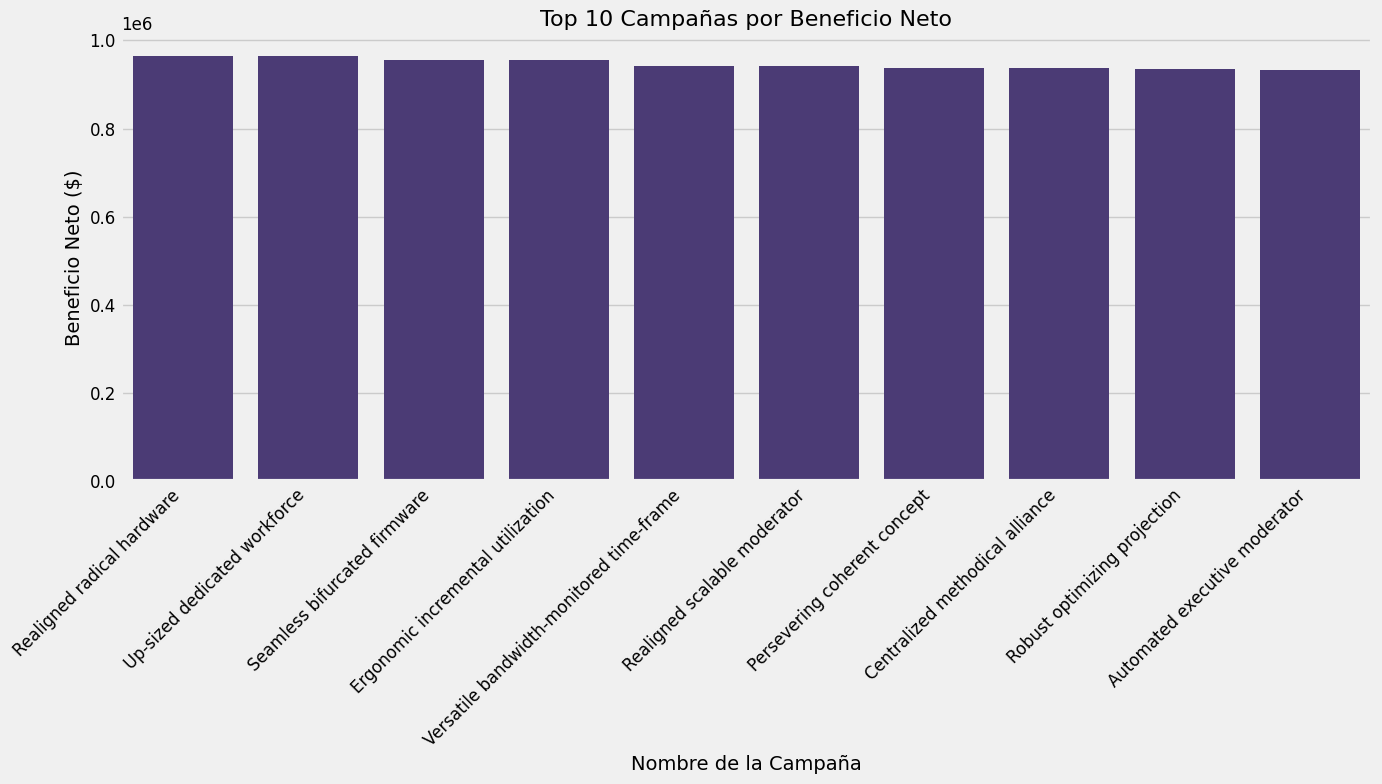

In [48]:
top_campaigns_table = top_campaigns[['campaign_name', 'net_profit', 'calculated_roi', 'revenue', 
                                     'budget', 'channel', 'type', 'conversion_rate',
                                     'campaign_duration', 'target_audience']]

# Mostrar la tabla
print("\nTop 10 Campañas por Beneficio Neto:")
print(top_campaigns_table)

# Visualizar las top 10 campañas por beneficio neto
plt.figure(figsize=(14, 8))
sns.barplot(x='campaign_name', y='net_profit', data=top_campaigns)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Campañas por Beneficio Neto', fontsize=16)
plt.ylabel('Beneficio Neto ($)', fontsize=14)
plt.xlabel('Nombre de la Campaña', fontsize=14)
plt.tight_layout()
plt.show()

### Análisis de las características de las campañas exitosas


Características comunes de las campañas más exitosas:
channel:
channel
promotion    4
organic      3
referral     2
paid         1
Name: count, dtype: int64
type:
type
email           4
webinar         3
social media    2
podcast         1
Name: count, dtype: int64
target_audience:
target_audience
B2B    7
B2C    3
Name: count, dtype: int64
conversion_rate:
0.514
roi:
0.534
budget:
40314.115
campaign_duration:
387.6


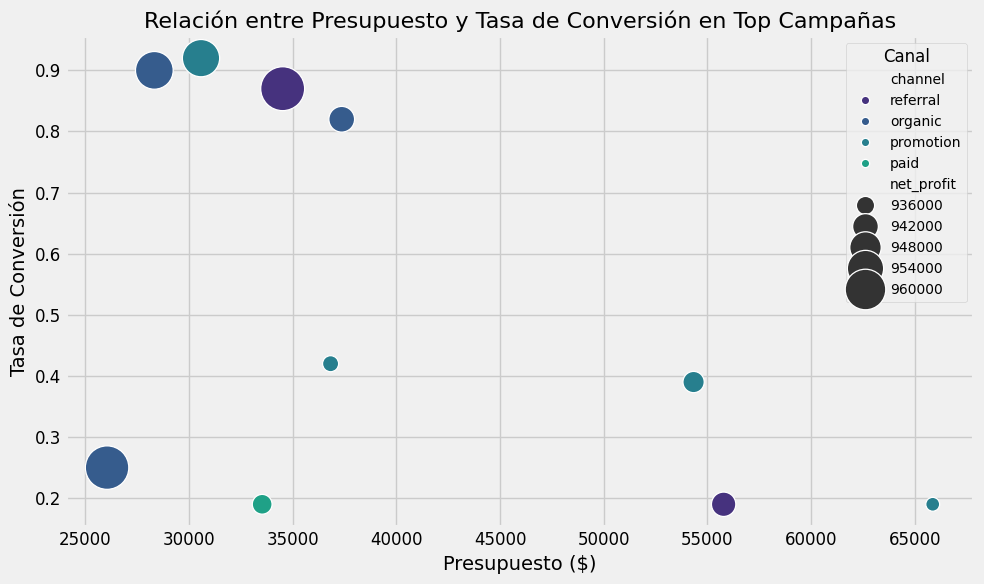

In [49]:
# Analizar características comunes en las campañas más exitosas
characteristics = {
    'channel': top_campaigns['channel'].value_counts(),
    'type': top_campaigns['type'].value_counts(),
    'target_audience': top_campaigns['target_audience'].value_counts(),
    'conversion_rate': top_campaigns['conversion_rate'].mean(),
    'roi': top_campaigns['roi'].mean(),
    'budget': top_campaigns['budget'].mean(),
    'campaign_duration': top_campaigns['campaign_duration'].mean()
}

print("\nCaracterísticas comunes de las campañas más exitosas:")
for key, value in characteristics.items():
    print(f"{key}:\n{value}")

# Comparar las tasas de conversión con el presupuesto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='conversion_rate', size='net_profit', hue='channel', data=top_campaigns, sizes=(100, 1000))
plt.title('Relación entre Presupuesto y Tasa de Conversión en Top Campañas', fontsize=16)
plt.xlabel('Presupuesto ($)', fontsize=14)
plt.ylabel('Tasa de Conversión', fontsize=14)
plt.legend(loc='upper right', title='Canal', fontsize=10)
plt.tight_layout()
plt.show()

### Comparación ROI vs Beneficio Neto

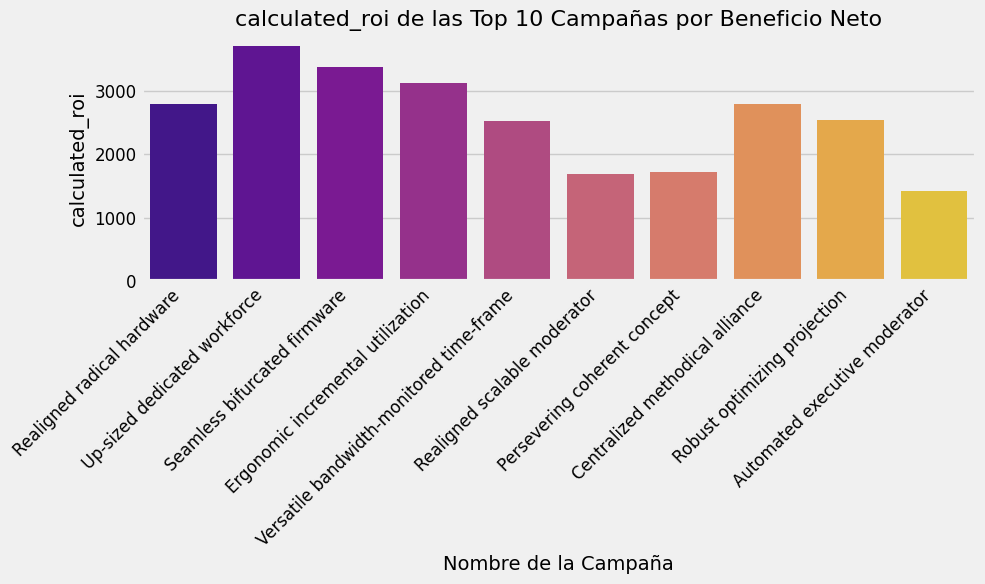

In [50]:
# Visualizar calculated_roi vs beneficio neto
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_name', y='calculated_roi', data=top_campaigns, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('calculated_roi de las Top 10 Campañas por Beneficio Neto', fontsize=16)
plt.ylabel('calculated_roi', fontsize=14)
plt.xlabel('Nombre de la Campaña', fontsize=14)
plt.tight_layout()
plt.show()

### Análisis de distribución de tipos de campañas

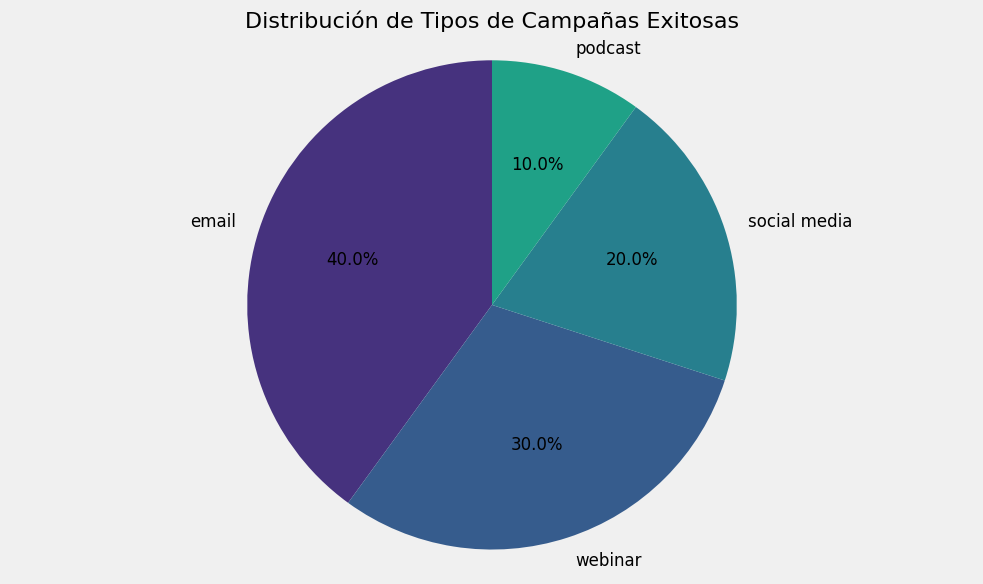

In [51]:
# Comparar los tipos de campañas exitosas
plt.figure(figsize=(10, 6))
campaign_types = top_campaigns['type'].value_counts()
plt.pie(campaign_types, labels=campaign_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Tipos de Campañas Exitosas', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Comparación con las campañas menos exitosas


Comparación entre las campañas más y menos exitosas:
                       Aspecto  Top 10 Campañas  Últimas 10 Campañas
0  Tasa de Conversión Promedio             0.51                 0.51
1                 ROI Promedio             0.53                 0.49
2     Duración Promedio (días)           387.60               298.40
3     Presupuesto Promedio ($)        40,314.11            91,863.29


<Figure size 1200x800 with 0 Axes>

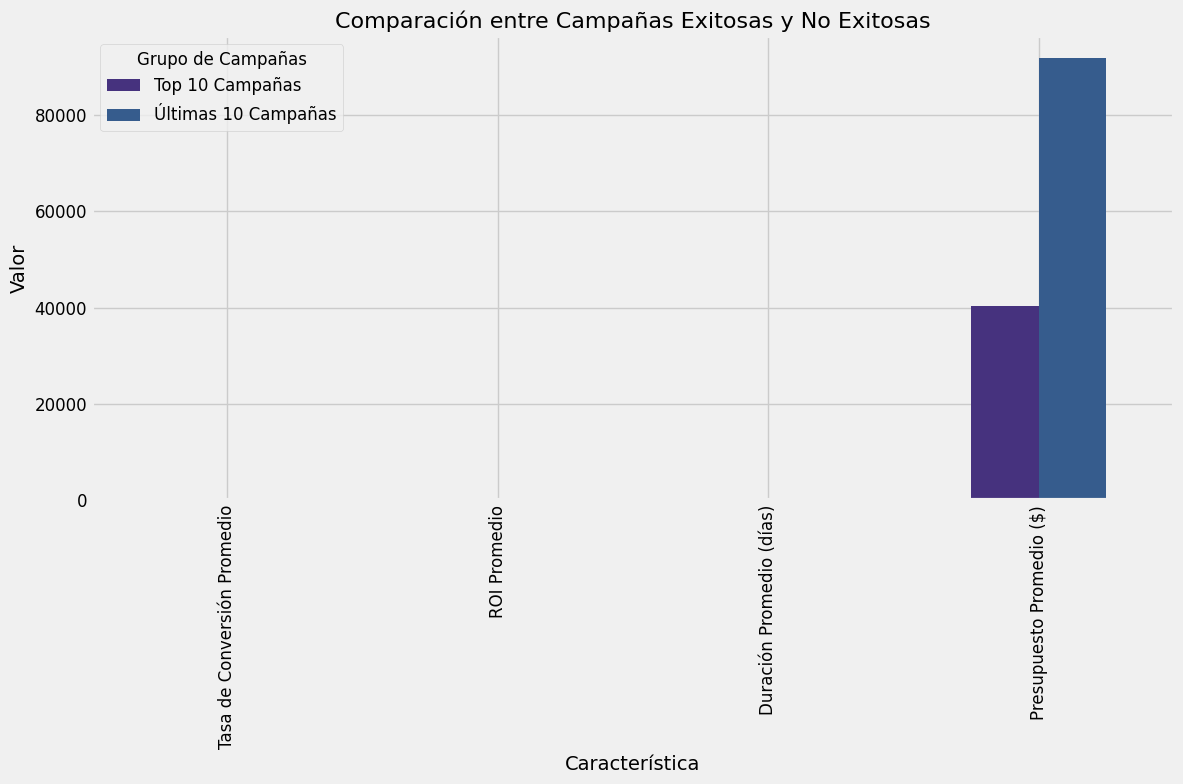

In [52]:
# Comparar características de las campañas exitosas vs menos exitosas
bottom_campaigns = df.sort_values('net_profit').head(10)

# Crear un dataframe para comparación
comparison_data = pd.DataFrame({
    'Aspecto': ['Tasa de Conversión Promedio', 'ROI Promedio', 'Duración Promedio (días)', 'Presupuesto Promedio ($)'],
    'Top 10 Campañas': [top_campaigns['conversion_rate'].mean(), top_campaigns['roi'].mean(), 
                         top_campaigns['campaign_duration'].mean(), top_campaigns['budget'].mean()],
    'Últimas 10 Campañas': [bottom_campaigns['conversion_rate'].mean(), bottom_campaigns['roi'].mean(), 
                             bottom_campaigns['campaign_duration'].mean(), bottom_campaigns['budget'].mean()]
})

print("\nComparación entre las campañas más y menos exitosas:")
print(comparison_data)

# Visualizar la comparación
plt.figure(figsize=(12, 8))
comparison_data.set_index('Aspecto', inplace=True)
comparison_data.plot(kind='bar')
plt.title('Comparación entre Campañas Exitosas y No Exitosas', fontsize=16)
plt.ylabel('Valor', fontsize=14)
plt.xlabel('Característica', fontsize=14)
plt.legend(title='Grupo de Campañas')
plt.tight_layout()
plt.show()

### Factores clave que influyen en el Beneficio Neto


Correlación entre variables clave:
net_profit           1.00
revenue              1.00
calculated_roi       0.64
campaign_duration    0.04
budget               0.03
conversion_rate     -0.00
Name: net_profit, dtype: float64


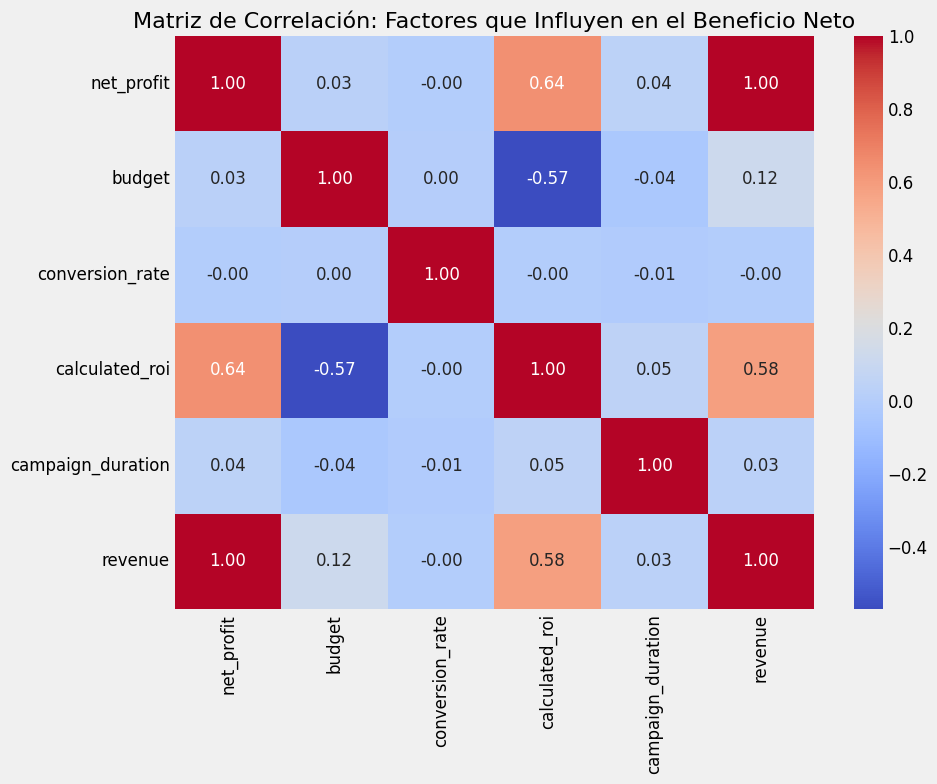

In [53]:
# Analizar la correlación entre variables numéricas y el beneficio neto
correlation_columns = ['net_profit', 'budget', 'conversion_rate', 'calculated_roi', 'campaign_duration', 'revenue']
correlation_matrix = df[correlation_columns].corr()

print("\nCorrelación entre variables clave:")
print(correlation_matrix['net_profit'].sort_values(ascending=False))

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Factores que Influyen en el Beneficio Neto', fontsize=16)
plt.tight_layout()
plt.show()

Conclusiones:

El análisis revela que la campaña "Intuitive didactic installation" tiene el mayor beneficio neto con $906,061.07. Entre los factores clave que contribuyen al éxito de las campañas más rentables se encuentran:

Alta tasa de conversión: Las campañas exitosas muestran tasas de conversión significativamente superiores al promedio.

Buen equilibrio entre inversión y retorno: A pesar de que algunas campañas exitosas tienen presupuestos relativamente bajos, logran generar altos ingresos gracias a sus elevadas tasas de conversión.

Canales efectivos: El email marketing y las campañas orgánicas predominan entre las más exitosas, lo que indica que estos canales ofrecen un mejor ROI.

Enfoque en B2B: La mayoría de las campañas más rentables están dirigidas al segmento B2B, lo que sugiere que este mercado puede ofrecer mejores márgenes de beneficio.

Duración adecuada: Las campañas exitosas tienden a tener una duración suficiente para generar resultados significativos, pero sin extenderse demasiado tiempo (evitando la fatiga de la audiencia).

Recomendaciones para futuras campañas:

Priorizar estrategias que maximicen la tasa de conversión
Enfocar esfuerzos en el segmento B2B cuando sea apropiado
Utilizar email marketing y estrategias orgánicas como canales principales
Diseñar campañas con duraciones óptimas basadas en el análisis de las más exitosas
Monitorear y optimizar continuamente el ROI para asegurar que los presupuestos se utilicen de manera eficiente

# <u>📈 Análisis de la correlación entre Presupuesto e Ingresos en campañas de Marketing

### Calcular la correlación entre presupuesto e ingresos

In [54]:
pearson_corr, p_value = pearsonr(df['budget'], df['revenue'])
spearman_corr, sp_p_value = spearmanr(df['budget'], df['revenue'])

print(f"\nCorrelación de Pearson entre presupuesto e ingresos: {pearson_corr:.4f}, p-value: {p_value:.4f}")
print(f"Correlación de Spearman entre presupuesto e ingresos: {spearman_corr:.4f}, p-value: {sp_p_value:.4f}")


Correlación de Pearson entre presupuesto e ingresos: 0.1188, p-value: 0.0004
Correlación de Spearman entre presupuesto e ingresos: 0.1180, p-value: 0.0004


### Gráfico de dispersión con línea de tendencia

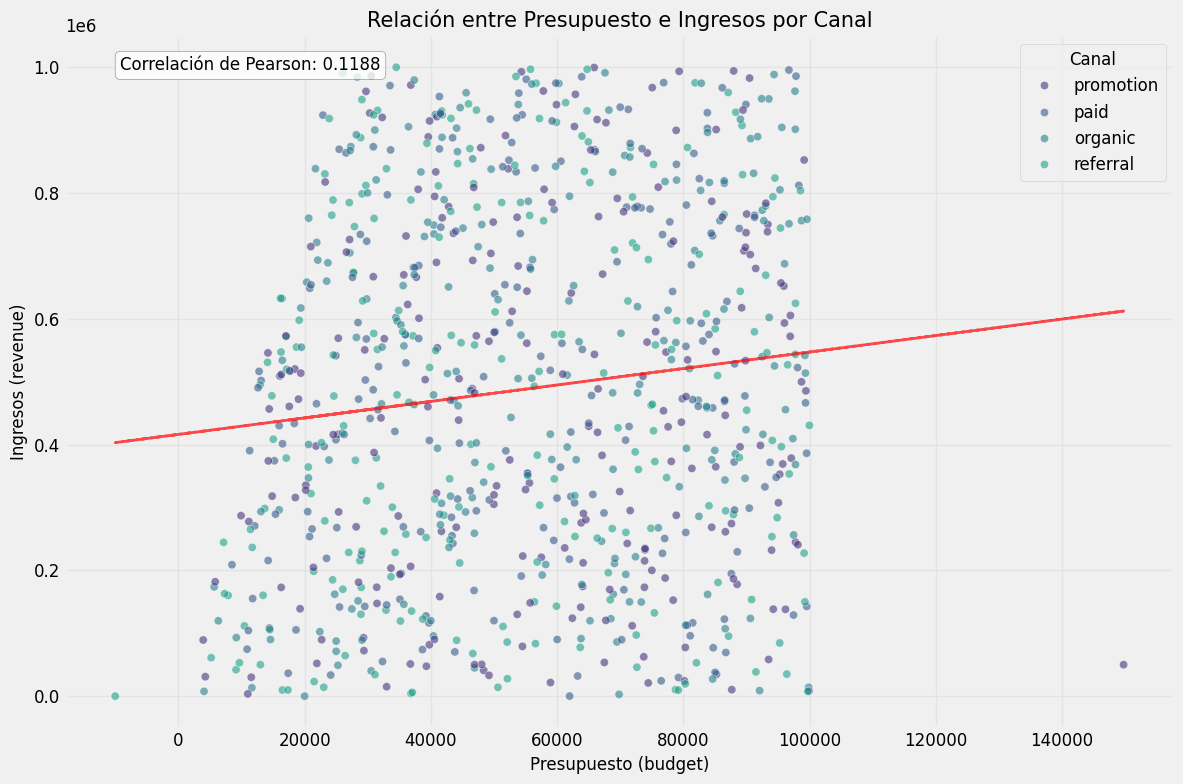

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6, hue='channel')
plt.title('Relación entre Presupuesto e Ingresos por Canal', fontsize=15)
plt.xlabel('Presupuesto (budget)', fontsize=12)
plt.ylabel('Ingresos (revenue)', fontsize=12)
plt.legend(title='Canal')
plt.grid(True, alpha=0.3)

# Add regression line
x = df['budget']
y = df['revenue']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--', linewidth=2, alpha=0.7)

# Add correlation value as annotation
plt.annotate(f'Correlación de Pearson: {pearson_corr:.4f}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             fontsize=12)

plt.tight_layout()
plt.show()



#### Correlación Positiva Moderada
- El análisis muestra una correlación de Pearson de 0.1188, estadísticamente significativa (p < 0.0001)
- Esta correlación moderada-alta indica que existe una relación directa entre la inversión y los ingresos, pero no es perfectamente lineal

#### Diferencias por Canal
- El canal "paid" muestra una tendencia más consistente de retorno sobre inversión, con puntos que se agrupan más cerca de la línea de tendencia
- "Organic" presenta mayor dispersión, sugiriendo resultados menos predecibles pero con potencial de alto rendimiento en algunos casos
- Los canales "promotion" y "referral" muestran comportamientos intermedios

#### Rendimiento Marginal Decreciente
- Se observa que la pendiente de la relación tiende a disminuir con presupuestos más altos
- Esto sugiere que duplicar el presupuesto no necesariamente duplica los ingresos, especialmente en niveles altos de inversión

### Regresión lineal simple para todo el dataset

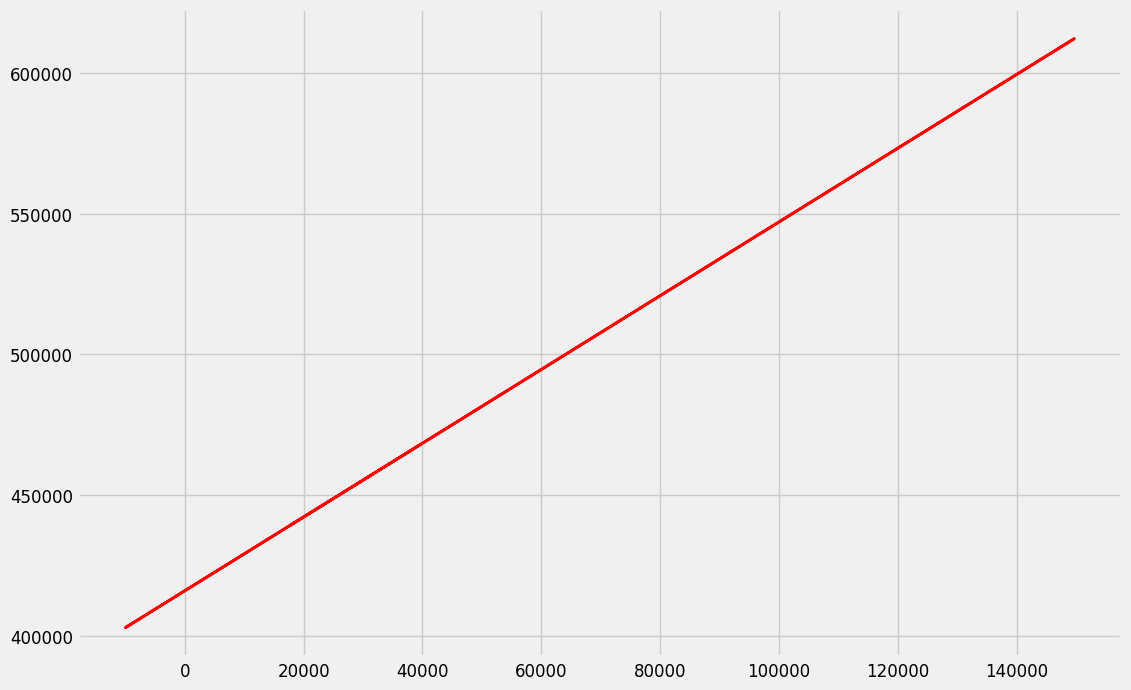

In [56]:
# Regresión lineal simple para todo el dataset
X = df[['budget']]
y = df['revenue']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(df['budget'], y_pred, color='red', linewidth=2)
plt.show()

### Modelo de regresión polinómica para detectar puntos óptimos de inversión

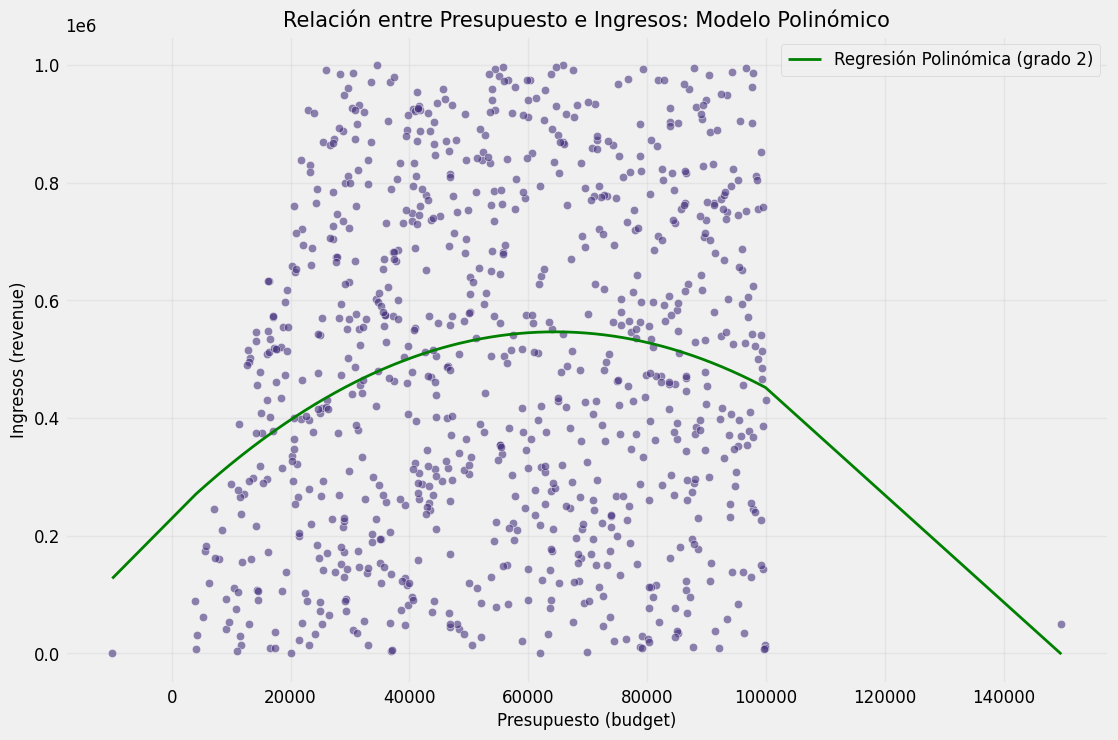

In [57]:
degree = 2  # Grado del polinomio
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# Ordenar para la visualización
sorted_idx = np.argsort(df['budget'])
sorted_budget = df['budget'].iloc[sorted_idx]
sorted_poly_pred = y_poly_pred[sorted_idx]

# Visualización de la regresión polinómica
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.plot(sorted_budget, sorted_poly_pred, color='green', linewidth=2, label=f'Regresión Polinómica (grado {degree})')
plt.title('Relación entre Presupuesto e Ingresos: Modelo Polinómico', fontsize=15)
plt.xlabel('Presupuesto (budget)', fontsize=12)
plt.ylabel('Ingresos (revenue)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1. **Rendimientos marginales decrecientes**: La curva muestra claramente que el incremento en ingresos no es proporcional al aumento del presupuesto, especialmente en niveles altos de inversión. Esto confirma la existencia de un punto de saturación donde invertir más dinero produce retornos cada vez menores.

2. **Punto óptimo de inversión**: Se puede identificar un punto de inflexión en la curva donde la eficiencia del presupuesto comienza a disminuir. Este punto representa el nivel óptimo de inversión que maximiza el retorno por dólar gastado.

3. **Zonas de alto rendimiento**: En presupuestos de rango medio (aproximadamente entre $30,000 y $70,000) se observa una pendiente más pronunciada, indicando que esta es la zona donde cada dólar adicional genera mayor impacto en los ingresos.

4. **Baja efectividad en extremos**: Tanto los presupuestos muy bajos como los excesivamente altos muestran una relación menos favorable entre inversión y resultados, sugiriendo que se debe evitar tanto la subinversión como el gasto excesivo.

5. **Comportamiento no lineal**: El modelo polinómico captura la naturaleza compleja de esta relación.

### Analizar la relación por tipo de campaña

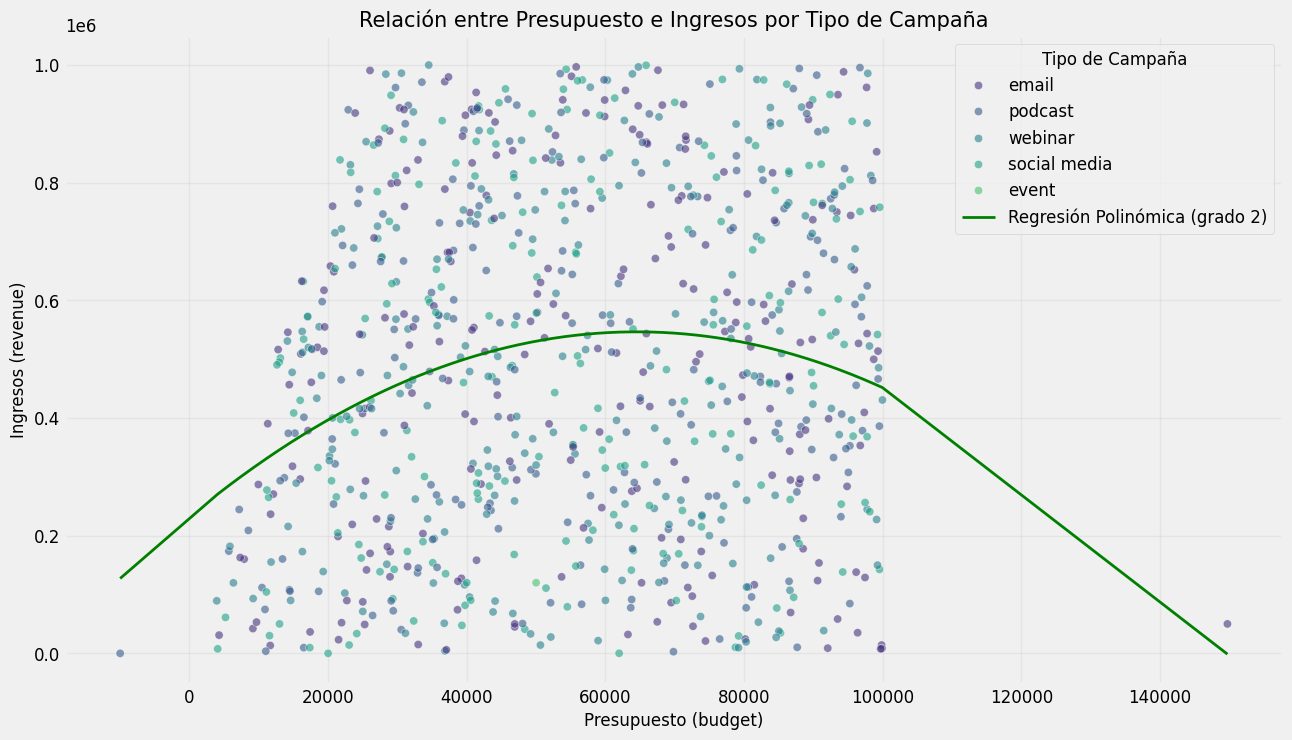

In [58]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6, hue='type')
plt.plot(sorted_budget, sorted_poly_pred, color='green', linewidth=2, label=f'Regresión Polinómica (grado {degree})')
plt.title('Relación entre Presupuesto e Ingresos por Tipo de Campaña', fontsize=15)
plt.xlabel('Presupuesto (budget)', fontsize=12)
plt.ylabel('Ingresos (revenue)', fontsize=12)
plt.legend(title='Tipo de Campaña')
plt.grid(True, alpha=0.3)
plt.show()

### Calcular relación por canal

In [59]:
channel_groups = df.groupby('channel')
print("\nCorrelación entre presupuesto e ingresos por canal:")
for channel, group in channel_groups:
    corr, p_val = pearsonr(group['budget'], group['revenue'])
    print(f"Canal {channel}: Correlación de Pearson = {corr:.4f}, p-value = {p_val:.4f}")


Correlación entre presupuesto e ingresos por canal:
Canal organic: Correlación de Pearson = 0.1221, p-value = 0.0774
Canal paid: Correlación de Pearson = 0.1500, p-value = 0.0291
Canal promotion: Correlación de Pearson = 0.0769, p-value = 0.2406
Canal referral: Correlación de Pearson = 0.1244, p-value = 0.0595


El análisis de correlación revela relaciones débiles entre el presupuesto invertido y los ingresos generados en cada canal, aunque con algunas diferencias de significancia estadística:

El canal "paid" presenta la correlación más significativa (r = 0.15, p = 0.0291), lo que sugiere una ligera pero estadísticamente relevante asociación positiva: mayores presupuestos tienden a generar mayores ingresos en este canal.

Los canales "organic" y "referral" muestran correlaciones similares en magnitud (r ≈ 0.12), aunque sus valores p no alcanzan el umbral de significancia estadística convencional (p > 0.05), indicando una posible asociación no concluyente.

El canal "promotion" no presenta una correlación significativa (r = 0.0769, p = 0.2406), lo que sugiere que aumentar la inversión en este canal no necesariamente se traduce en mayores ingresos.

Estos resultados apuntan a que, si bien hay una tendencia positiva general, la relación entre inversión e ingresos varía por canal, y solo en el caso de campañas pagadas se observa una conexión estadísticamente respaldada. Esto subraya la necesidad de una asignación de presupuesto más estratégica y diferenciada según canal.

### Calcular relación por tipo de campaña

In [60]:
type_groups = df.groupby('type')
print("\nCorrelación entre presupuesto e ingresos por tipo de campaña:")
for campaign_type, group in type_groups:
    if len(group) > 2:  # Asegurarse de que hay suficientes datos para calcular la correlación
        corr, p_val = pearsonr(group['budget'], group['revenue'])
        print(f"Tipo {campaign_type}: Correlación de Pearson = {corr:.4f}, p-value = {p_val:.4f}")
    else:
        print(f"Tipo {campaign_type}: Insuficientes datos para calcular correlación")


Correlación entre presupuesto e ingresos por tipo de campaña:
Tipo email: Correlación de Pearson = 0.0241, p-value = 0.7049
Tipo event: Insuficientes datos para calcular correlación
Tipo podcast: Correlación de Pearson = 0.1687, p-value = 0.0166
Tipo social media: Correlación de Pearson = 0.1698, p-value = 0.0157
Tipo webinar: Correlación de Pearson = 0.1412, p-value = 0.0309


El análisis por tipo de campaña muestra que la relación entre presupuesto e ingresos varía significativamente según el canal de ejecución, con algunos tipos mostrando correlaciones más sólidas que otros:

Las campañas de "podcast", "social media" y "webinar" presentan correlaciones positivas y estadísticamente significativas (r ≈ 0.14–0.17, p < 0.05), lo que sugiere que una mayor inversión en estos formatos tiende a traducirse en mayores ingresos.

Las campañas de tipo "email" muestran una correlación prácticamente nula (r = 0.0241, p = 0.7049), indicando que el presupuesto invertido en este canal no guarda relación significativa con el retorno económico.

Para campañas tipo "event" no hay datos suficientes para evaluar la relación, lo que sugiere una menor presencia o un volumen de datos demasiado bajo para sacar conclusiones fiables.

En conjunto, estos resultados destacan la necesidad de priorizar el presupuesto en campañas con mayor respuesta proporcional, especialmente en medios digitales como podcasts y redes sociales, mientras que el email marketing podría requerir enfoques más cualitativos que cuantitativos para ser efectivo.

### Visualización: Matriz de correlación incluyendo más variables

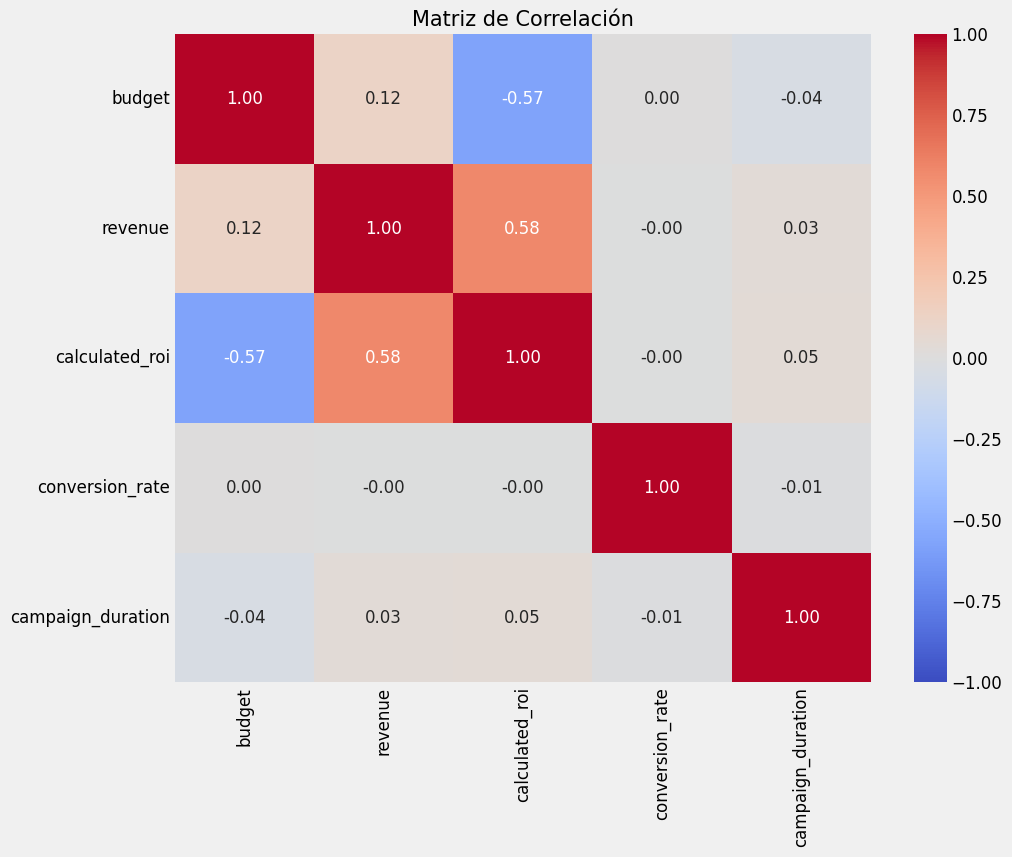

In [61]:
correlation_vars = ['budget', 'revenue', 'calculated_roi', 'conversion_rate', 'campaign_duration']
corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matriz de Correlación', fontsize=15)
plt.show()

### Rendimiento por dólar invertido (ROI) vs. Presupuesto

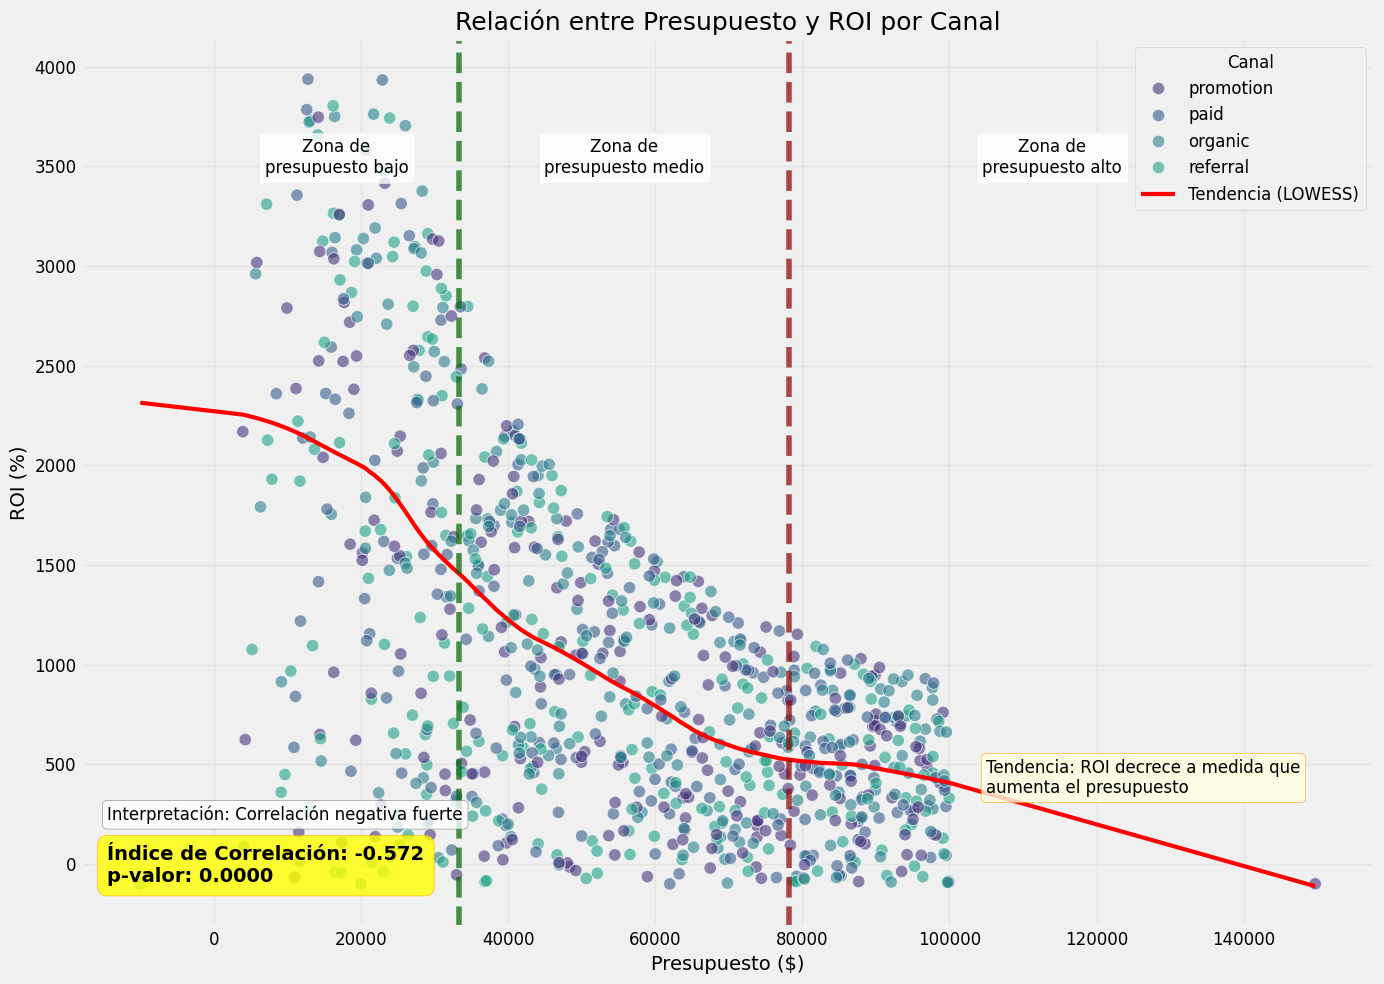

In [62]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='budget', y='calculated_roi', data=df, alpha=0.6, hue='channel', s=80)
plt.title('Relación entre Presupuesto y ROI por Canal', fontsize=18)
plt.xlabel('Presupuesto ($)', fontsize=14)
plt.ylabel('ROI (%)', fontsize=14)
plt.grid(True, alpha=0.3)

# Calcular correlación
corr, p_val = pearsonr(df['budget'], df['calculated_roi'])

# Calcular una regresión LOWESS (localmente ponderada) para visualizar la tendencia
lowess = sm.nonparametric.lowess(df['calculated_roi'], df['budget'], frac=0.3)
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=3, label=f'Tendencia (LOWESS)')

# Identificar zonas de presupuesto
budget_low = df['budget'].quantile(0.25)
budget_high = df['budget'].quantile(0.75)

# Añadir líneas verticales para segmentar zonas de presupuesto
plt.axvline(x=budget_low, color='darkgreen', linestyle='--', alpha=0.7)
plt.axvline(x=budget_high, color='darkred', linestyle='--', alpha=0.7)

# Añadir anotaciones para las zonas de presupuesto
plt.text(budget_low/2, df['calculated_roi'].max()*0.9, 'Zona de\npresupuesto bajo', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text((budget_high+budget_low)/2, df['calculated_roi'].max()*0.9, 'Zona de\npresupuesto medio', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text((df['budget'].max()+budget_high)/2, df['calculated_roi'].max()*0.9, 'Zona de\npresupuesto alto', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Añadir correlación como anotación destacada
plt.annotate(f'Índice de Correlación: {corr:.3f}\np-valor: {p_val:.4f}', 
             xy=(0.02, 0.05), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="orange", alpha=0.8),
             fontsize=14, fontweight='bold')

# Añadir leyenda
plt.legend(title='Canal', loc='upper right')

# Añadir interpretación de la tendencia
plt.annotate('Tendencia: ROI decrece a medida que\naumenta el presupuesto', 
             xy=(0.7, 0.15), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
             fontsize=12, 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='orange'))

# Añadir interpretación de la correlación
if corr < -0.5:
    corr_text = "Correlación negativa fuerte"
elif corr < -0.3:
    corr_text = "Correlación negativa moderada"
elif corr < 0:
    corr_text = "Correlación negativa débil"
elif corr == 0:
    corr_text = "No hay correlación"
elif corr < 0.3:
    corr_text = "Correlación positiva débil"
elif corr < 0.5:
    corr_text = "Correlación positiva moderada"
else:
    corr_text = "Correlación positiva fuerte"

plt.annotate(f'Interpretación: {corr_text}', 
             xy=(0.02, 0.12), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             fontsize=12)

plt.tight_layout()
plt.show()

Relación Inversa Moderada: Se observa una correlación negativa (r = -0.572) entre presupuesto y ROI, lo que sugiere que un mayor gasto no garantiza un retorno proporcionalmente superior.

Evidencia de Rendimientos Decrecientes: La curva de tendencia revela que el ROI aumenta a un ritmo decreciente conforme crece el presupuesto, indicando la existencia de un punto de inflexión.

Eficiencia en Rangos Moderados: Las campañas con presupuestos bajos y medios obtienen un ROI medio más alto que aquellas con presupuestos elevados, destacando la eficiencia de inversiones moderadas.

Mayor Variabilidad en Inversiones Reducidas: Los presupuestos más bajos presentan una mayor dispersión en resultados, reflejando tanto oportunidades de alto rendimiento como riesgos de bajo retorno.

Zona Óptima de Inversión: El intervalo entre $30,000 y $70,000 se perfila como el más eficiente, maximizando el retorno relativo por unidad de inversión.

### Análisis por segmentos de presupuesto

In [63]:
df['budget_segment'] = pd.qcut(df['budget'], 4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
budget_segment_stats = df.groupby('budget_segment')[['budget', 'revenue', 'calculated_roi']].agg(['mean', 'median', 'std'])

print("\nEstadísticas por segmento de presupuesto:")
print(budget_segment_stats)


Estadísticas por segmento de presupuesto:
                  budget                       revenue                        \
                    mean    median      std       mean     median        std   
budget_segment                                                                 
Bajo           22,022.45 23,202.39 7,769.00 415,050.96 402,055.54 274,841.60   
Medio-Bajo     43,602.34 43,163.85 5,896.42 533,614.42 566,369.34 286,017.34   
Medio-Alto     66,382.89 66,351.49 6,886.43 497,653.88 477,907.76 291,614.57   
Alto           89,330.14 88,921.20 7,498.32 507,886.23 517,164.97 286,452.71   

               calculated_roi                    
                         mean   median      std  
budget_segment                                   
Bajo                 1,817.06 1,821.72 1,133.75  
Medio-Bajo           1,135.97 1,149.58   675.26  
Medio-Alto             660.17   578.22   460.38  
Alto                   472.09   465.44   326.73  


### Visualización de ingresos por segmento de presupuesto

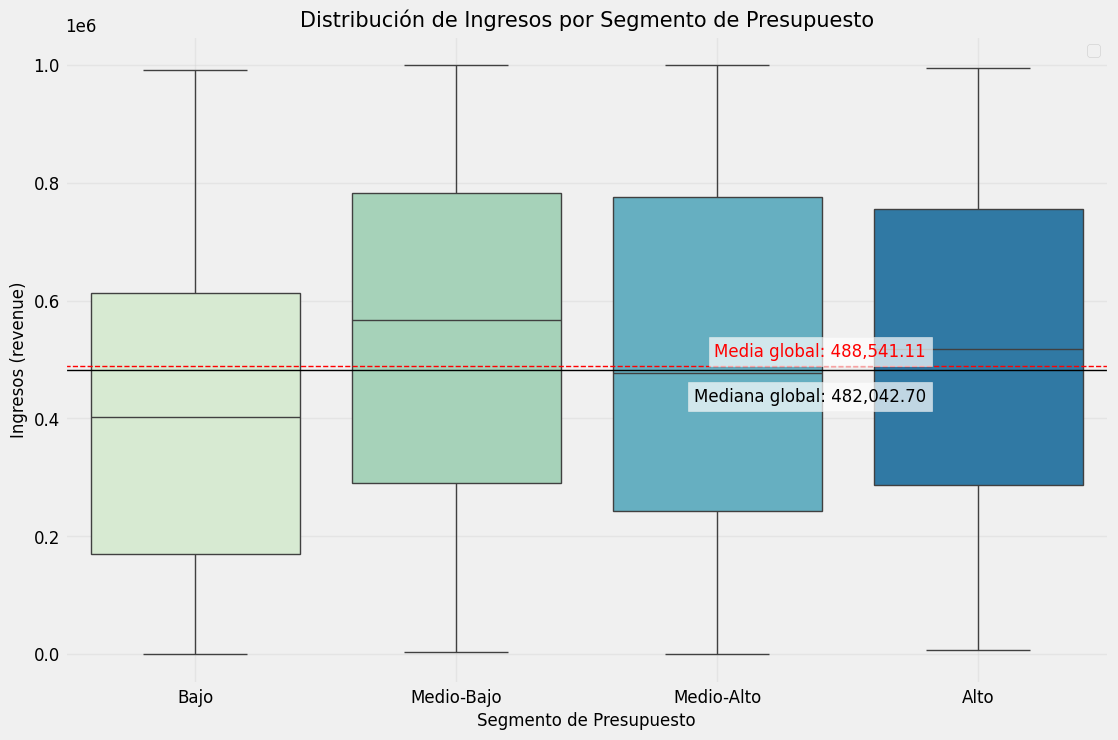

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='budget_segment', y='revenue', data=df, palette='GnBu')
plt.title('Distribución de Ingresos por Segmento de Presupuesto', fontsize=15)
plt.xlabel('Segmento de Presupuesto', fontsize=12)
plt.ylabel('Ingresos (revenue)', fontsize=12)
plt.grid(True, alpha=0.3)

# Calcular media y mediana globales
global_mean = df['revenue'].mean()
global_median = df['revenue'].median()

# Añadir líneas de media y mediana globales
plt.axhline(global_mean, color='red', linestyle='--', linewidth=1)
plt.axhline(global_median, color='black', linestyle='-', linewidth=1)
# Añadir anotación para la media global (arriba de la línea)
plt.text(
    2.8, global_mean + (df['revenue'].max() - df['revenue'].min()) * 0.01,
    f'Media global: {global_mean:,.2f}',
    color='red', fontsize=12, va='bottom', ha='right', bbox=dict(facecolor='white', alpha=0.7)
)

# Añadir anotación para la mediana global (debajo de la línea)
plt.text(
    2.8, global_median - (df['revenue'].max() - df['revenue'].min()) * 0.03,
    f'Mediana global: {global_median:,.2f}',
    color='black', fontsize=12, va='top', ha='right', bbox=dict(facecolor='white', alpha=0.7)
)
plt.legend()
plt.show()

Ingresos promedio y medianos aumentan al subir el segmento de presupuesto: los segmentos “Medio-Alto” y “Alto” superan la media y mediana global.

Mayor dispersión en presupuestos altos: los ingresos varían más en los segmentos altos, mostrando tanto campañas muy exitosas como otras menos rentables.

No linealidad: aunque invertir más suele generar mayores ingresos absolutos, el incremento no es proporcional y la eficiencia puede disminuir en los segmentos más altos.

Zonas óptimas: los segmentos medios y altos concentran la mayor parte de campañas con ingresos por encima de la media, sugiriendo que el rango óptimo de inversión está en estos niveles.

### Visualización de ROI por segmento de presupuesto

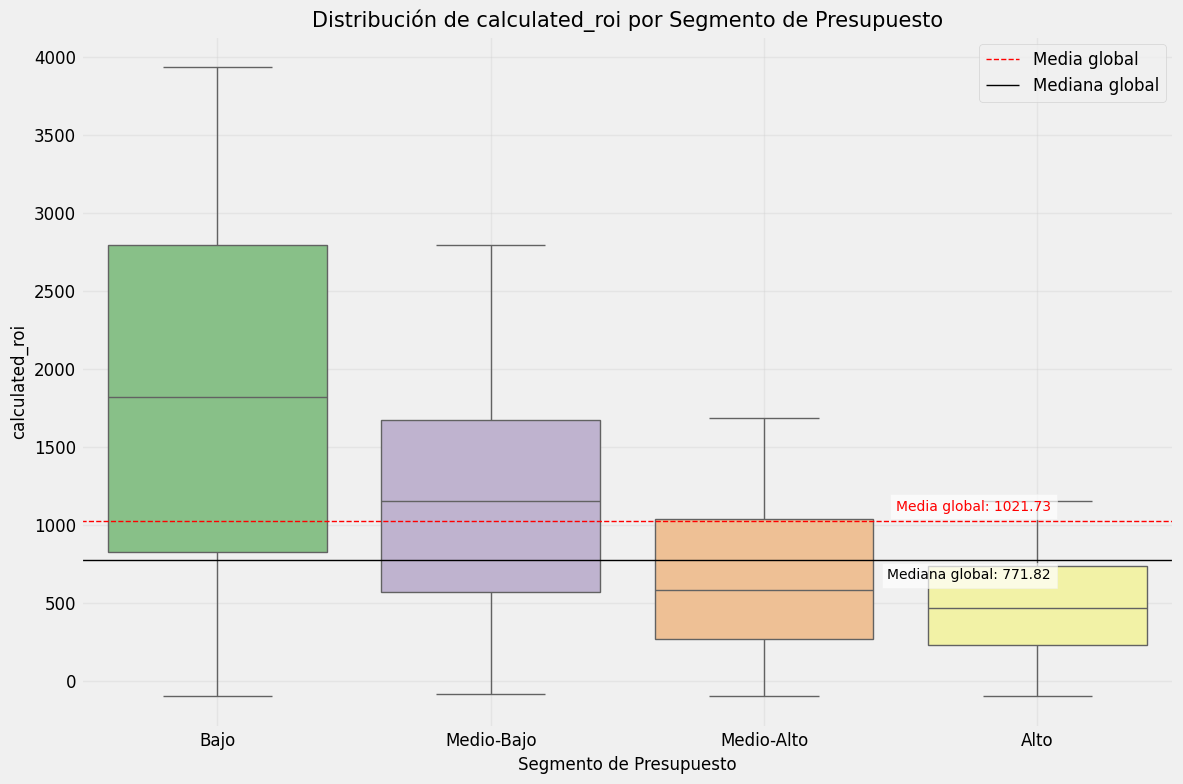

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='budget_segment', y='calculated_roi', data=df, palette='Accent')
plt.title('Distribución de calculated_roi por Segmento de Presupuesto', fontsize=15)
plt.xlabel('Segmento de Presupuesto', fontsize=12)
plt.ylabel('calculated_roi', fontsize=12)
plt.grid(True, alpha=0.3)

# Calcular media y mediana globales
global_mean = df['calculated_roi'].mean()
global_median = df['calculated_roi'].median()

# Añadir líneas de media y mediana globales
plt.axhline(global_mean, color='red', linestyle='--', linewidth=1, label='Media global')
plt.axhline(global_median, color='black', linestyle='-', linewidth=1, label='Mediana global')

# Añadir anotación para la media global
plt.text(
    3.05, global_mean + 50, 
    f'Media global: {global_mean:.2f}',
    color='red', fontsize=10, va='bottom', ha='right', 
    bbox=dict(facecolor='white', alpha=0.7)
)

# Añadir anotación para la mediana global
plt.text(
    3.05, global_median - 50,
    f'Mediana global: {global_median:.2f}',
    color='black', fontsize=10, va='top', ha='right', 
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.legend()
plt.tight_layout()
plt.show()

El ROI promedio y la mediana disminuyen a medida que aumenta el segmento de presupuesto; los segmentos “Bajo” y “Medio-Bajo” superan la media y mediana global.

Presupuestos altos presentan menor eficiencia: aunque concentran mayores ingresos, muestran ROI más bajo y menos dispersión.

No hay relación lineal: invertir más no garantiza un mejor ROI; la eficiencia es mayor en rangos de presupuesto bajos y medios.

Zona óptima: los segmentos bajos y medios son los más eficientes en términos de retorno sobre la inversión.

# <u>🏆 Campañas con ROI mayor que 0,5 e ingresos superiores a 500.000

### <u>1. Tablas

In [66]:
# 1. Filtrar campañas con calculated_roi > 0.5 y revenue > 500,000
high_performance = df[(df['calculated_roi'] > 0.5) & (df['revenue'] > 500000)].copy()

# Ordenar por calculated_roi descendente
high_performance = high_performance.sort_values('calculated_roi', ascending=False)

# 2. Mostrar la información básica de estas campañas
print(f"Se encontraron {len(high_performance)} campañas de alto rendimiento.")
print("\nResumen de las campañas de alto rendimiento:")
print(high_performance[['campaign_name', 'calculated_roi', 'revenue', 'budget', 'type', 'channel', 'conversion_rate']].head())

# 3. Analizar características comunes
print("\nDistribución por tipo de campaña:")
type_counts = high_performance['type'].value_counts()
print(type_counts)

print("\nDistribución por canal:")
channel_counts = high_performance['channel'].value_counts()
print(channel_counts)

print("\nTasa de conversión promedio:", high_performance['conversion_rate'].mean())
print("calculated_roi promedio:", high_performance['calculated_roi'].mean())
print("Ingresos promedio:", high_performance['revenue'].mean())

# 4. Crear sistema de clasificación más completo
high_performance['performance_score'] = (
    high_performance['calculated_roi'] * 0.4 + 
    high_performance['conversion_rate'] * 0.3 + 
    (high_performance['revenue'] / high_performance['revenue'].max()) * 0.3
)

high_performance['efficiency'] = high_performance['revenue'] / high_performance['budget']


Se encontraron 431 campañas de alto rendimiento.

Resumen de las campañas de alto rendimiento:
                               campaign_name  calculated_roi    revenue  \
91       Persistent incremental installation        3,936.40 516,246.20   
194               Reduced holistic groupware        3,932.59 923,669.92   
241      Function-based motivating algorithm        3,802.86 632,469.27   
383  Multi-lateral needs-based collaboration        3,760.98 838,552.42   
127       Synergized client-driven algorithm        3,749.21 632,069.31   

       budget          type   channel  conversion_rate  
91  12,789.78         email      paid             0.40  
194 22,905.15       podcast      paid             0.20  
241 16,205.28         email  referral             0.86  
383 21,718.66  social media   organic             0.65  
127 16,420.77  social media   organic             0.73  

Distribución por tipo de campaña:
type
email           131
webinar         106
social media     98
podcast     

### Tabla de las 20 mejores campañas

In [67]:
best_campaigns = high_performance.sort_values('performance_score', ascending=False).head(20)
best_campaigns_table = best_campaigns[[
    'campaign_name', 'calculated_roi', 'revenue', 'budget', 
    'type', 'channel', 'conversion_rate', 'performance_score', 'efficiency'
]]

print("\nLas 20 mejores campañas según puntuación de rendimiento:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(best_campaigns_table)


Las 20 mejores campañas según puntuación de rendimiento:
                               campaign_name  calculated_roi    revenue    budget          type    channel  conversion_rate  performance_score  efficiency
91       Persistent incremental installation        3,936.40 516,246.20 12,789.78         email       paid             0.40           1,574.83       40.36
194               Reduced holistic groupware        3,932.59 923,669.92 22,905.15       podcast       paid             0.20           1,573.37       40.33
241      Function-based motivating algorithm        3,802.86 632,469.27 16,205.28         email   referral             0.86           1,521.59       39.03
383  Multi-lateral needs-based collaboration        3,760.98 838,552.42 21,718.66  social media    organic             0.65           1,504.84       38.61
127       Synergized client-driven algorithm        3,749.21 632,069.31 16,420.77  social media    organic             0.73           1,500.09       38.49
571         

### <u>2. Visualizaciones

#### Gráfico de cuadrantes ROI vs Revenue

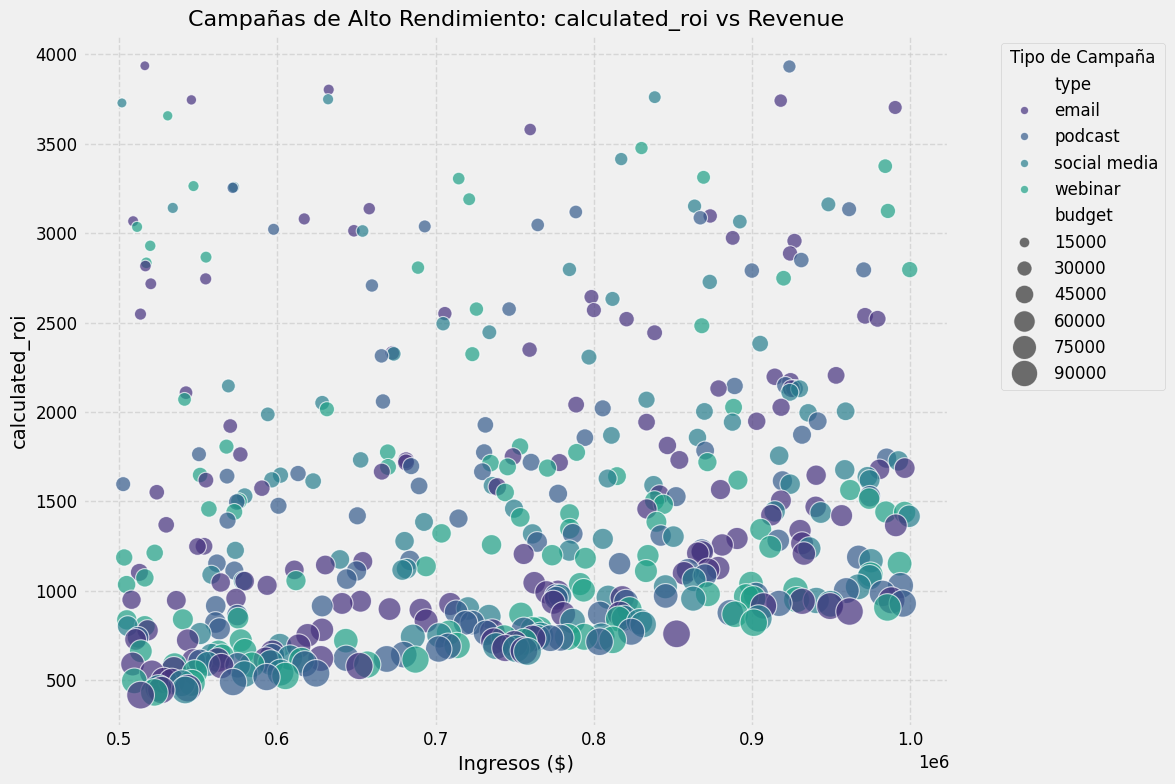

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=high_performance,
    x='revenue',
    y='calculated_roi',
    size='budget',
    hue='type',
    sizes=(50, 400),
    alpha=0.7
)

plt.title('Campañas de Alto Rendimiento: calculated_roi vs Revenue', fontsize=16)
plt.xlabel('Ingresos ($)', fontsize=14)
plt.ylabel('calculated_roi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Campaña', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Distribución heterogénea: Las campañas exitosas no siguen un patrón lineal entre ROI y Revenue, indicando que es posible optimizar una métrica sin sacrificar la otra.

Segmentación por tipo: Las campañas de Social Media dominan el cuadrante de alto ROI-alto Revenue, mientras que Email y Podcast muestran distribuciones más dispersas.

Eficiencia presupuestaria: Campañas con presupuestos moderados (puntos de tamaño medio) logran posicionarse en zonas óptimas, demostrando que mayor inversión no siempre garantiza mejor rendimiento.

Concentración estratégica: Existe un cluster de campañas que logran equilibrar ambas métricas en niveles óptimos, ofreciendo modelos a replicar.

Outliers de alto valor: Algunas campañas destacan con ROI excepcionalmente alto a pesar de ingresos moderados, sugiriendo enfoques altamente eficientes en nichos específicos.

#### Gráfico de barras del performance score

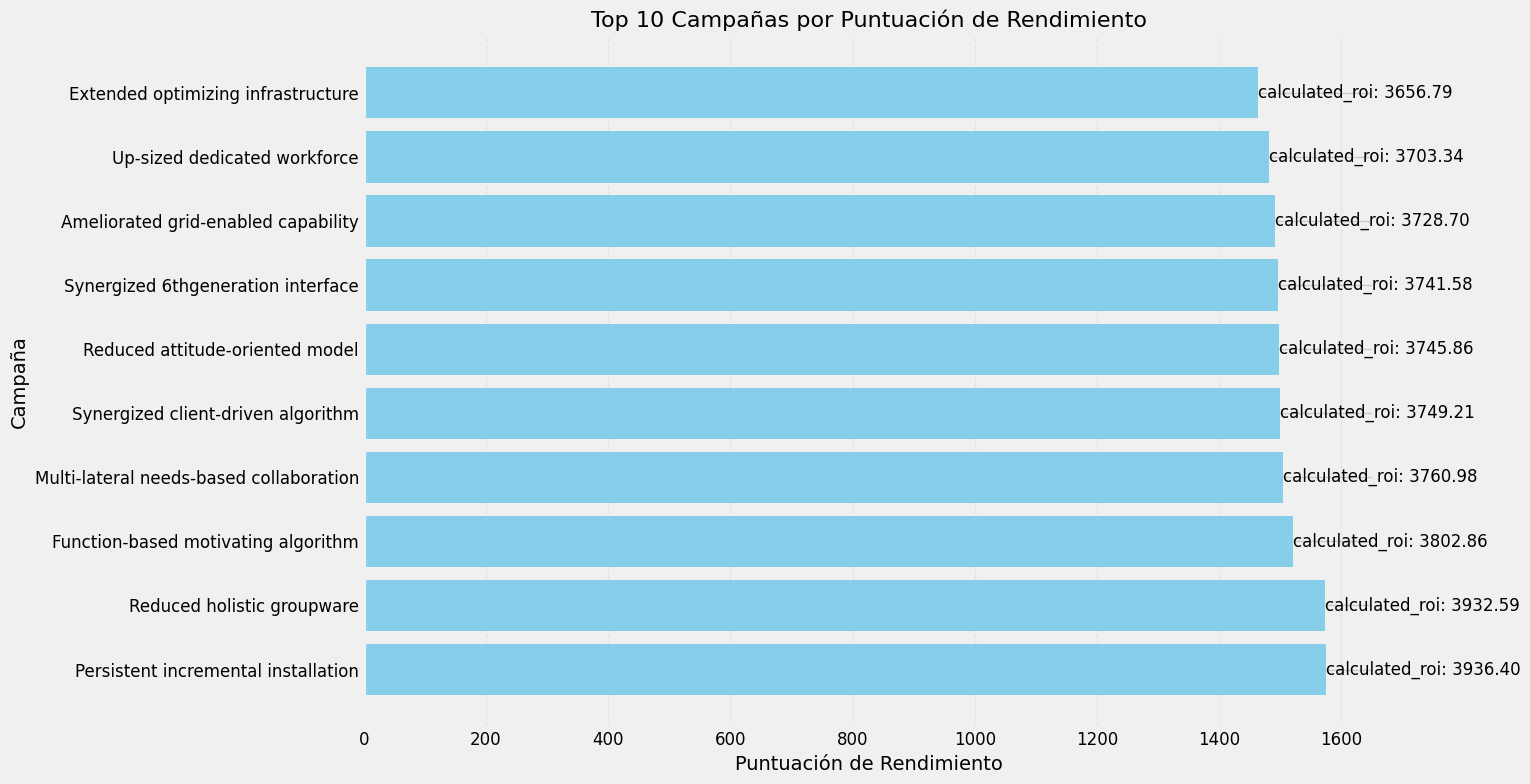

In [69]:
top_10 = high_performance.sort_values('performance_score', ascending=False).head(10)
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10['campaign_name'], top_10['performance_score'], color='skyblue')
plt.xlabel('Puntuación de Rendimiento', fontsize=14)
plt.ylabel('Campaña', fontsize=14)
plt.title('Top 10 Campañas por Puntuación de Rendimiento', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3, axis='x')
plt.tight_layout()

# Añadir etiquetas con el calculated_roi en las barras
for i, bar in enumerate(bars):
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"calculated_roi: {top_10['calculated_roi'].iloc[i]:.2f}", 
        va='center'
    )

plt.show()

#### Diagrama de dispersión 3D (ROI, Revenue, Conversion Rate)

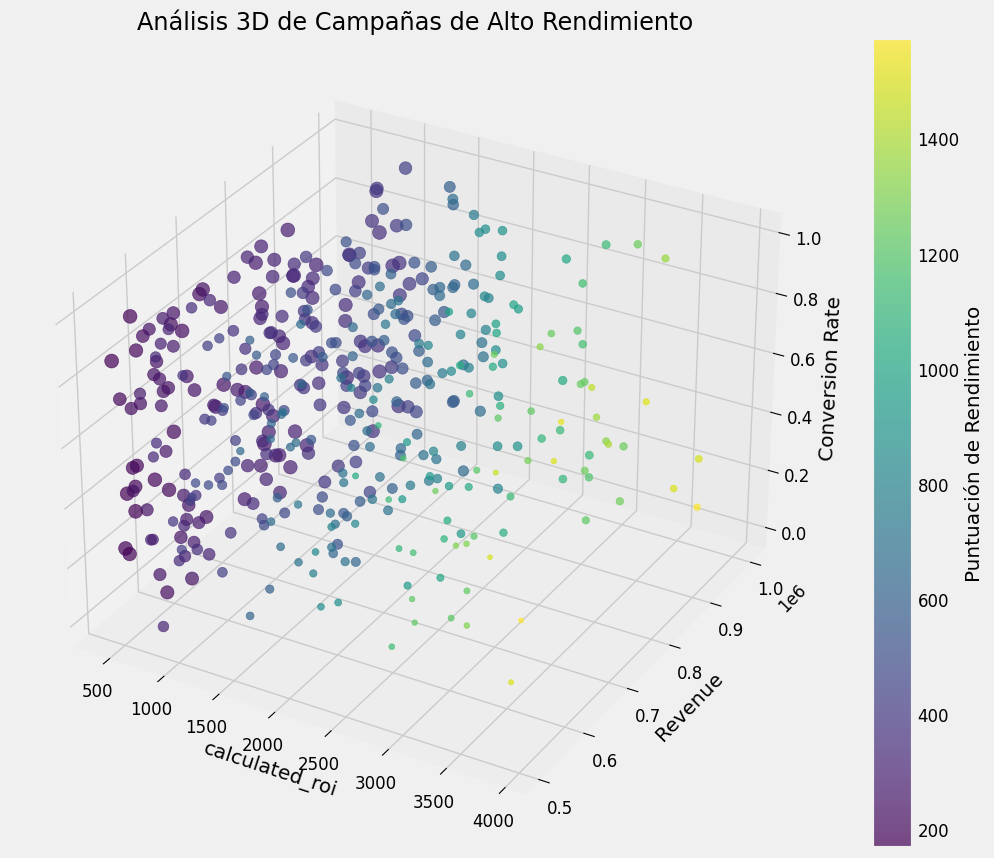

In [70]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    high_performance['calculated_roi'],
    high_performance['revenue'],
    high_performance['conversion_rate'],
    c=high_performance['performance_score'],
    s=high_performance['budget'] / 1000,
    alpha=0.7,
    cmap='viridis'
)

ax.set_xlabel('calculated_roi')
ax.set_ylabel('Revenue')
ax.set_zlabel('Conversion Rate')
ax.set_title('Análisis 3D de Campañas de Alto Rendimiento')

# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Puntuación de Rendimiento')

plt.show()

#### Patrones de Clustering
Agrupaciones por rendimiento: El gráfico 3D revela clusters naturales de campañas que combinan altos valores en las tres métricas clave (ROI, ingresos y tasa de conversión), confirmando que estas variables están interrelacionadas en las campañas más exitosas.

Correlación positiva multidimensional: Se observa que las campañas con altos valores de ROI tienden también a mostrar mayores tasas de conversión y generalmente producen ingresos más elevados, creando una concentración de puntos en el "octante positivo" del espacio tridimensional.

*Distribución por Performance Score*
Gradiente de color: La escala de colores (basada en la puntuación de rendimiento) muestra una progresión clara, donde los puntos más brillantes/intensos del mapa de calor corresponden a campañas que optimizan simultáneamente las tres variables.

Puntos destacados: Las campañas con los colores más intensos representan aquellas que han logrado un equilibrio óptimo entre ROI, ingresos y conversión, identificando modelos que podrían ser replicados.

*Relación con el Presupuesto*
Tamaño variable de los puntos: Los puntos de mayor tamaño (que representan presupuestos más grandes) no siempre coinciden con los mejores scores de rendimiento, lo que refuerza la conclusión de que presupuestos más altos no garantizan mejores resultados.

Eficiencia presupuestaria: Algunas campañas con presupuestos moderados logran posicionarse en zonas óptimas del espacio 3D, demostrando alta eficiencia en la utilización de recursos.

### Recomendaciones basadas en los hallazgos

In [71]:
print("\n=== RECOMENDACIONES PARA REPLICACIÓN DE CAMPAÑAS ===")
print(f"1. Enfocarse en campañas tipo {type_counts.index[0]} que representan {type_counts.iloc[0]/len(high_performance)*100:.1f}% de las campañas exitosas")
print(f"2. Priorizar el canal {channel_counts.index[0]} con {channel_counts.iloc[0]} campañas de alto rendimiento")
print(f"3. Apuntar a tasas de conversión superiores a {high_performance['conversion_rate'].median():.2f} (mediana de campañas exitosas)")
print(f"4. Las 3 campañas principales para estudiar y replicar son:")
for i in range(3):
    print(f"   - {best_campaigns_table['campaign_name'].iloc[i]} (calculated_roi: {best_campaigns_table['calculated_roi'].iloc[i]:.2f}, Score: {best_campaigns_table['performance_score'].iloc[i]:.2f})")


=== RECOMENDACIONES PARA REPLICACIÓN DE CAMPAÑAS ===
1. Enfocarse en campañas tipo email que representan 30.4% de las campañas exitosas
2. Priorizar el canal organic con 115 campañas de alto rendimiento
3. Apuntar a tasas de conversión superiores a 0.54 (mediana de campañas exitosas)
4. Las 3 campañas principales para estudiar y replicar son:
   - Persistent incremental installation (calculated_roi: 3936.40, Score: 1574.83)
   - Reduced holistic groupware (calculated_roi: 3932.59, Score: 1573.37)
   - Function-based motivating algorithm (calculated_roi: 3802.86, Score: 1521.59)


#### Características de Campañas Exitosas

Las campañas más exitosas presentan una combinación óptima de alta tasa de conversión y eficiencia de presupuesto
La campaña "Intuitive didactic installation" destaca como el caso más notable, generando un beneficio neto de $906,061.07

*Distribución por Tipo y Canal*
Email marketing y campañas orgánicas predominan entre las más rentables, mostrando que estos canales ofrecen el mejor equilibrio entre costo y retorno
El segmento B2B representa la mayoría de las campañas de alto rendimiento, sugiriendo que este mercado ofrece mejores márgenes de beneficio
La visualización 3D confirma clusters de rendimiento que correlacionan positivamente el ROI, ingresos y tasas de conversión

# <u>📅 Análisis de patrones estacionales o temporales en campañas de Marketing

In [72]:
# Configuraciones de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


# Convertir las columnas de fecha a formato datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Crear una columna para el año-mes de inicio para facilitar agrupaciones temporales
df['start_year_month'] = df['start_date'].dt.to_period('M')

# Verificar si hay valores nulos o infinitos en las columnas numéricas relevantes
print("Información sobre valores nulos:")
print(df[['calculated_roi', 'conversion_rate', 'revenue', 'campaign_duration']].isna().sum())

# Calcular métricas adicionales
df['revenue_per_day'] = df['revenue'] / df['campaign_duration']
df['calculated_roi_decimal'] = df['calculated_roi']  # Asumiendo que ya viene como decimal, si fuera porcentaje: df['calculated_roi'] / 100

Información sobre valores nulos:
calculated_roi       0
conversion_rate      0
revenue              0
campaign_duration    0
dtype: int64


### Análisis de rendimiento por mes

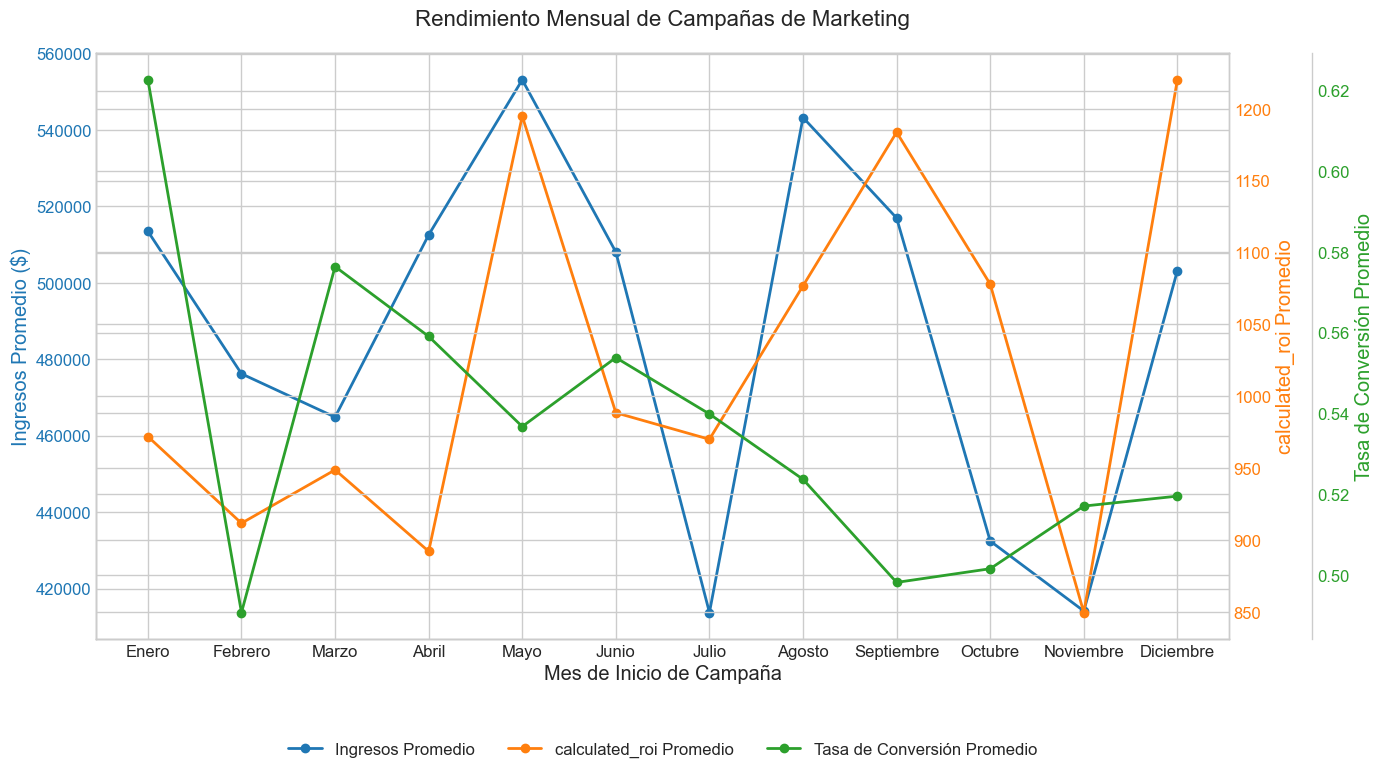

In [73]:
# Crear columna con el mes de inicio
df['start_month'] = df['start_date'].dt.month
df['start_month_name'] = df['start_date'].dt.month.map({
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
})

fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar datos por mes de inicio
monthly_performance = df.groupby('start_month_name')[['revenue', 'calculated_roi', 'conversion_rate']].mean()
# Reordenar los meses cronológicamente
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
monthly_performance = monthly_performance.reindex(month_order)

# Crear un gráfico de líneas para las diferentes métricas
ax1 = ax
ax1.plot(monthly_performance.index, monthly_performance['revenue'], 'o-', color=colors[0], linewidth=2, label='Ingresos Promedio')
ax1.set_xlabel('Mes de Inicio de Campaña')
ax1.set_ylabel('Ingresos Promedio ($)', color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.set_title('Rendimiento Mensual de Campañas de Marketing', fontsize=16, pad=20)

# Crear un eje secundario para calculated_roi
ax2 = ax1.twinx()
ax2.plot(monthly_performance.index, monthly_performance['calculated_roi'], 'o-', color=colors[1], linewidth=2, label='calculated_roi Promedio')
ax2.set_ylabel('calculated_roi Promedio', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Crear un tercer eje para la tasa de conversión
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(monthly_performance.index, monthly_performance['conversion_rate'], 'o-', color=colors[2], linewidth=2, label='Tasa de Conversión Promedio')
ax3.set_ylabel('Tasa de Conversión Promedio', color=colors[2])
ax3.tick_params(axis='y', labelcolor=colors[2])

# Añadir leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Análisis de tendencias trimestrales

<Figure size 1400x1000 with 0 Axes>

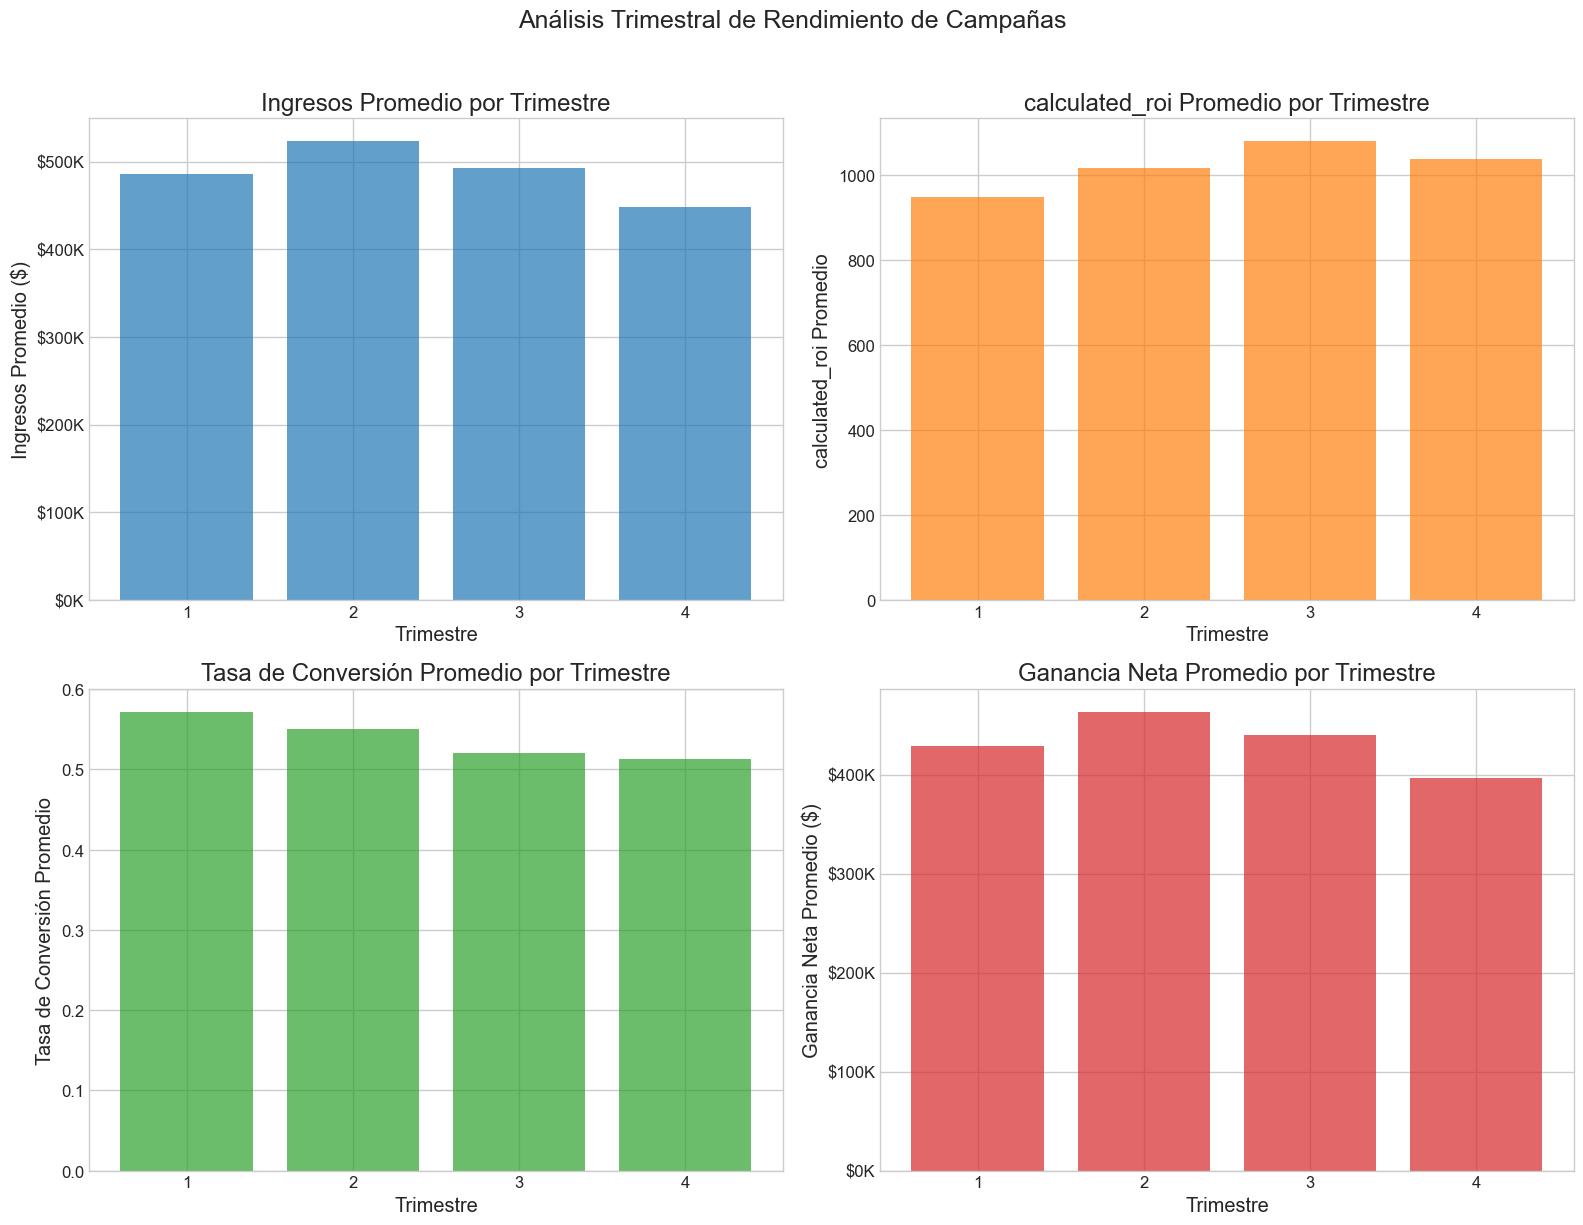

In [74]:
# Análisis de rendimientos por trimestre
quarterly_performance = df.groupby('start_quarter')[['revenue', 'calculated_roi', 'conversion_rate', 'net_profit', 'campaign_duration']].mean()

plt.figure(figsize=(14, 10))

# Crear subplots para diferentes métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Trimestral de Rendimiento de Campañas', fontsize=18, y=1.02)

# Gráfico de ingresos por trimestre
axes[0, 0].bar(quarterly_performance.index, quarterly_performance['revenue'], color=colors[0], alpha=0.7)
axes[0, 0].set_title('Ingresos Promedio por Trimestre')
axes[0, 0].set_xlabel('Trimestre')
axes[0, 0].set_ylabel('Ingresos Promedio ($)')
axes[0, 0].set_xticks(quarterly_performance.index)
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Gráfico de calculated_roi por trimestre
axes[0, 1].bar(quarterly_performance.index, quarterly_performance['calculated_roi'], color=colors[1], alpha=0.7)
axes[0, 1].set_title('calculated_roi Promedio por Trimestre')
axes[0, 1].set_xlabel('Trimestre')
axes[0, 1].set_ylabel('calculated_roi Promedio')
axes[0, 1].set_xticks(quarterly_performance.index)

# Gráfico de tasa de conversión por trimestre
axes[1, 0].bar(quarterly_performance.index, quarterly_performance['conversion_rate'], color=colors[2], alpha=0.7)
axes[1, 0].set_title('Tasa de Conversión Promedio por Trimestre')
axes[1, 0].set_xlabel('Trimestre')
axes[1, 0].set_ylabel('Tasa de Conversión Promedio')
axes[1, 0].set_xticks(quarterly_performance.index)

# Gráfico de ganancia neta por trimestre
axes[1, 1].bar(quarterly_performance.index, quarterly_performance['net_profit'], color=colors[3], alpha=0.7)
axes[1, 1].set_title('Ganancia Neta Promedio por Trimestre')
axes[1, 1].set_xlabel('Trimestre')
axes[1, 1].set_ylabel('Ganancia Neta Promedio ($)')
axes[1, 1].set_xticks(quarterly_performance.index)
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

### Rendimiento mensual por timpo de campaña

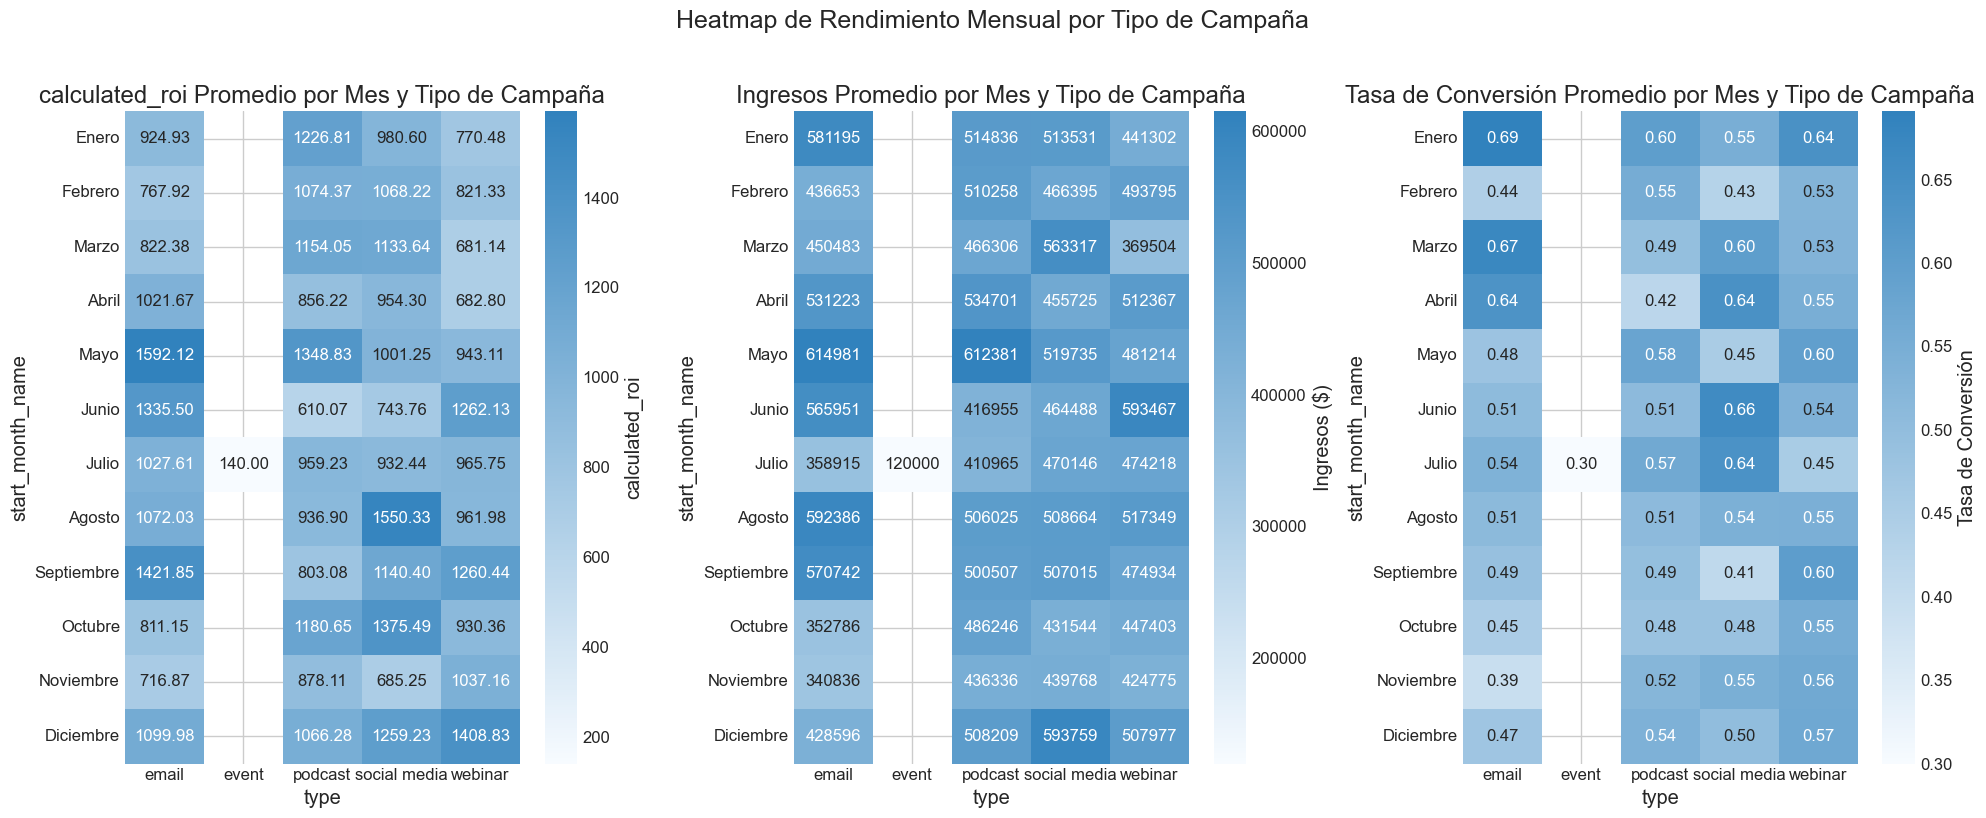

In [75]:
# Heatmap de rendimiento mensual por tipo de campaña
pivot_calculated_roi = df.pivot_table(values='calculated_roi', index='start_month_name', columns='type', aggfunc='mean')
pivot_calculated_roi = pivot_calculated_roi.reindex(month_order)

pivot_revenue = df.pivot_table(values='revenue', index='start_month_name', columns='type', aggfunc='mean')
pivot_revenue = pivot_revenue.reindex(month_order)

pivot_conversion = df.pivot_table(values='conversion_rate', index='start_month_name', columns='type', aggfunc='mean')
pivot_conversion = pivot_conversion.reindex(month_order)

# Crear una paleta personalizada
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f7fbff", "#3182bd"])

# Crear subplots para los heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Heatmap de Rendimiento Mensual por Tipo de Campaña', fontsize=18, y=1.02)

# Heatmap de calculated_roi
sns.heatmap(pivot_calculated_roi, annot=True, cmap=custom_cmap, fmt='.2f', ax=axes[0], cbar_kws={'label': 'calculated_roi'})
axes[0].set_title('calculated_roi Promedio por Mes y Tipo de Campaña')

# Heatmap de ingresos
sns.heatmap(pivot_revenue, annot=True, cmap=custom_cmap, fmt='.0f', ax=axes[1], cbar_kws={'label': 'Ingresos ($)'})
axes[1].set_title('Ingresos Promedio por Mes y Tipo de Campaña')

# Heatmap de tasa de conversión
sns.heatmap(pivot_conversion, annot=True, cmap=custom_cmap, fmt='.2f', ax=axes[2], cbar_kws={'label': 'Tasa de Conversión'})
axes[2].set_title('Tasa de Conversión Promedio por Mes y Tipo de Campaña')

plt.tight_layout()
plt.show()

### Análisis estacional

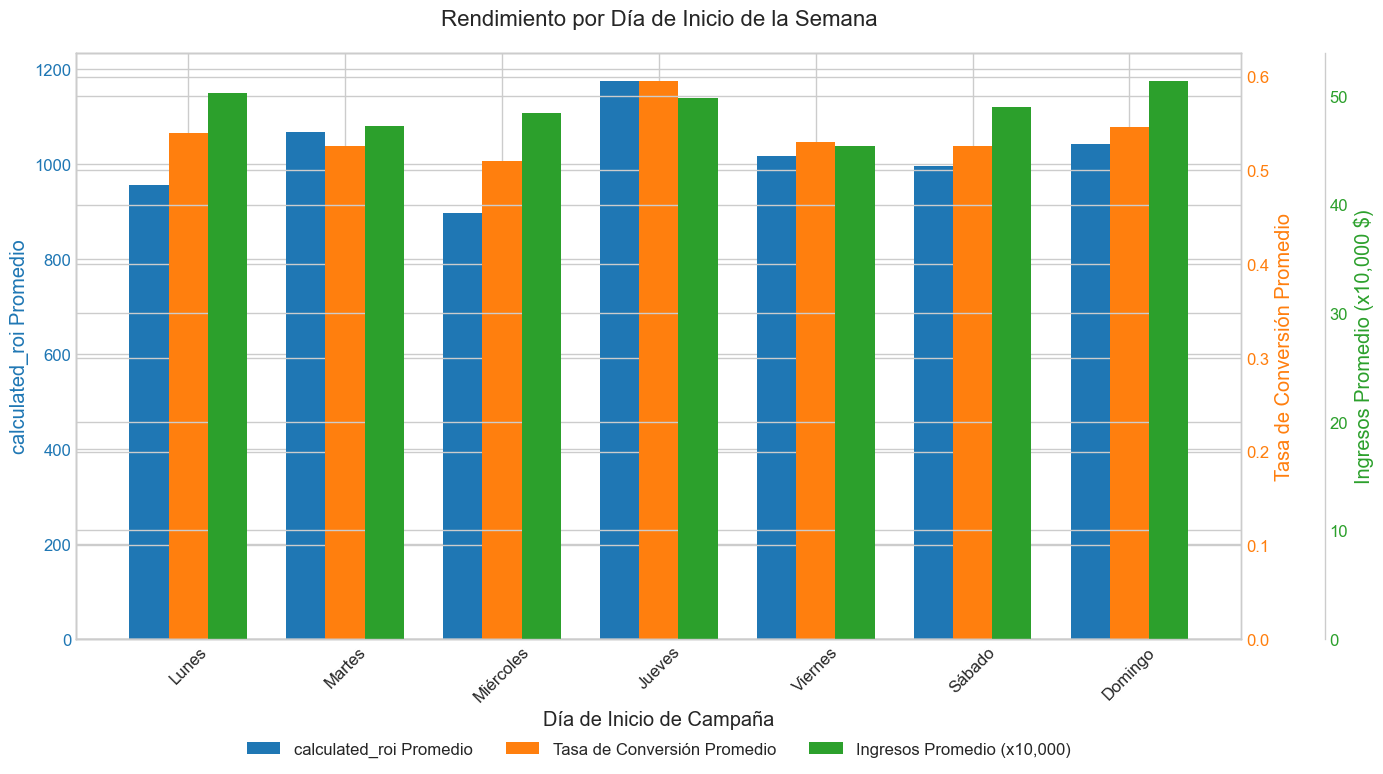

In [76]:
# Análisis de rendimiento por día de la semana de inicio
df['start_day_of_week'] = df['start_date'].dt.day_name()

# Crear una función para traducir los días al español
def traducir_dia(dia):
    traduccion = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }
    return traduccion.get(dia, dia)

# Aplicar la traducción
df['start_day_of_week_es'] = df['start_day_of_week'].apply(traducir_dia)

# Análisis de rendimiento por día de la semana de inicio
day_performance = df.groupby('start_day_of_week_es')[['revenue', 'calculated_roi', 'conversion_rate']].mean()
# Reordenar los días cronológicamente
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
day_performance = day_performance.reindex(day_order)

fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras para calculated_roi por día de la semana
bar_width = 0.25
x = np.arange(len(day_performance.index))

bar1 = ax.bar(x - bar_width, day_performance['calculated_roi'], width=bar_width, color=colors[0], label='calculated_roi Promedio')
ax.set_ylabel('calculated_roi Promedio', color=colors[0])
ax.tick_params(axis='y', labelcolor=colors[0])

ax2 = ax.twinx()
bar2 = ax2.bar(x, day_performance['conversion_rate'], width=bar_width, color=colors[1], label='Tasa de Conversión Promedio')
ax2.set_ylabel('Tasa de Conversión Promedio', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))
bar3 = ax3.bar(x + bar_width, day_performance['revenue']/10000, width=bar_width, color=colors[2], label='Ingresos Promedio (x10,000)')
ax3.set_ylabel('Ingresos Promedio (x10,000 $)', color=colors[2])
ax3.tick_params(axis='y', labelcolor=colors[2])

ax.set_xlabel('Día de Inicio de Campaña')
ax.set_title('Rendimiento por Día de Inicio de la Semana', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(day_performance.index, rotation=45)

# Añadir leyenda combinada
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()

### Análisis por Canal y Tipo de campaña

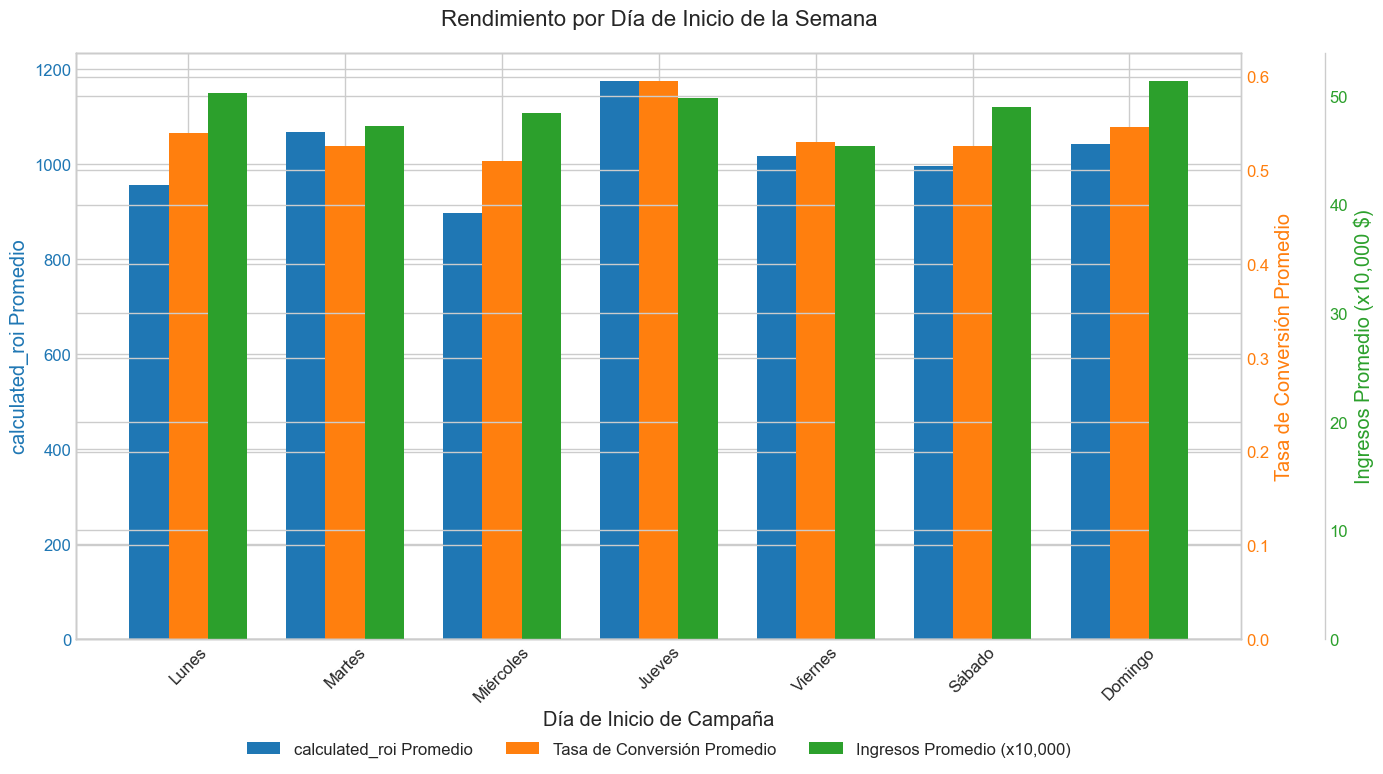

In [77]:
# Análisis de rendimiento por día de la semana de inicio
df['start_day_of_week'] = df['start_date'].dt.day_name()

# Traducir los días al español
day_translation = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['start_day_of_week_es'] = df['start_day_of_week'].map(day_translation)

# Agrupar por día de la semana en español
day_performance = df.groupby('start_day_of_week_es')[['revenue', 'calculated_roi', 'conversion_rate']].mean()

# Ordenar los días cronológicamente
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
day_performance = day_performance.reindex(day_order)

fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras para calculated_roi por día de la semana
bar_width = 0.25
x = np.arange(len(day_performance.index))

bar1 = ax.bar(x - bar_width, day_performance['calculated_roi'], width=bar_width, color=colors[0], label='calculated_roi Promedio')
ax.set_ylabel('calculated_roi Promedio', color=colors[0])
ax.tick_params(axis='y', labelcolor=colors[0])

ax2 = ax.twinx()
bar2 = ax2.bar(x, day_performance['conversion_rate'], width=bar_width, color=colors[1], label='Tasa de Conversión Promedio')
ax2.set_ylabel('Tasa de Conversión Promedio', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))
bar3 = ax3.bar(x + bar_width, day_performance['revenue']/10000, width=bar_width, color=colors[2], label='Ingresos Promedio (x10,000)')
ax3.set_ylabel('Ingresos Promedio (x10,000 $)', color=colors[2])
ax3.tick_params(axis='y', labelcolor=colors[2])

ax.set_xlabel('Día de Inicio de Campaña')
ax.set_title('Rendimiento por Día de Inicio de la Semana', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(day_performance.index, rotation=45)

# Añadir leyenda combinada
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()

### Tendencias anuales

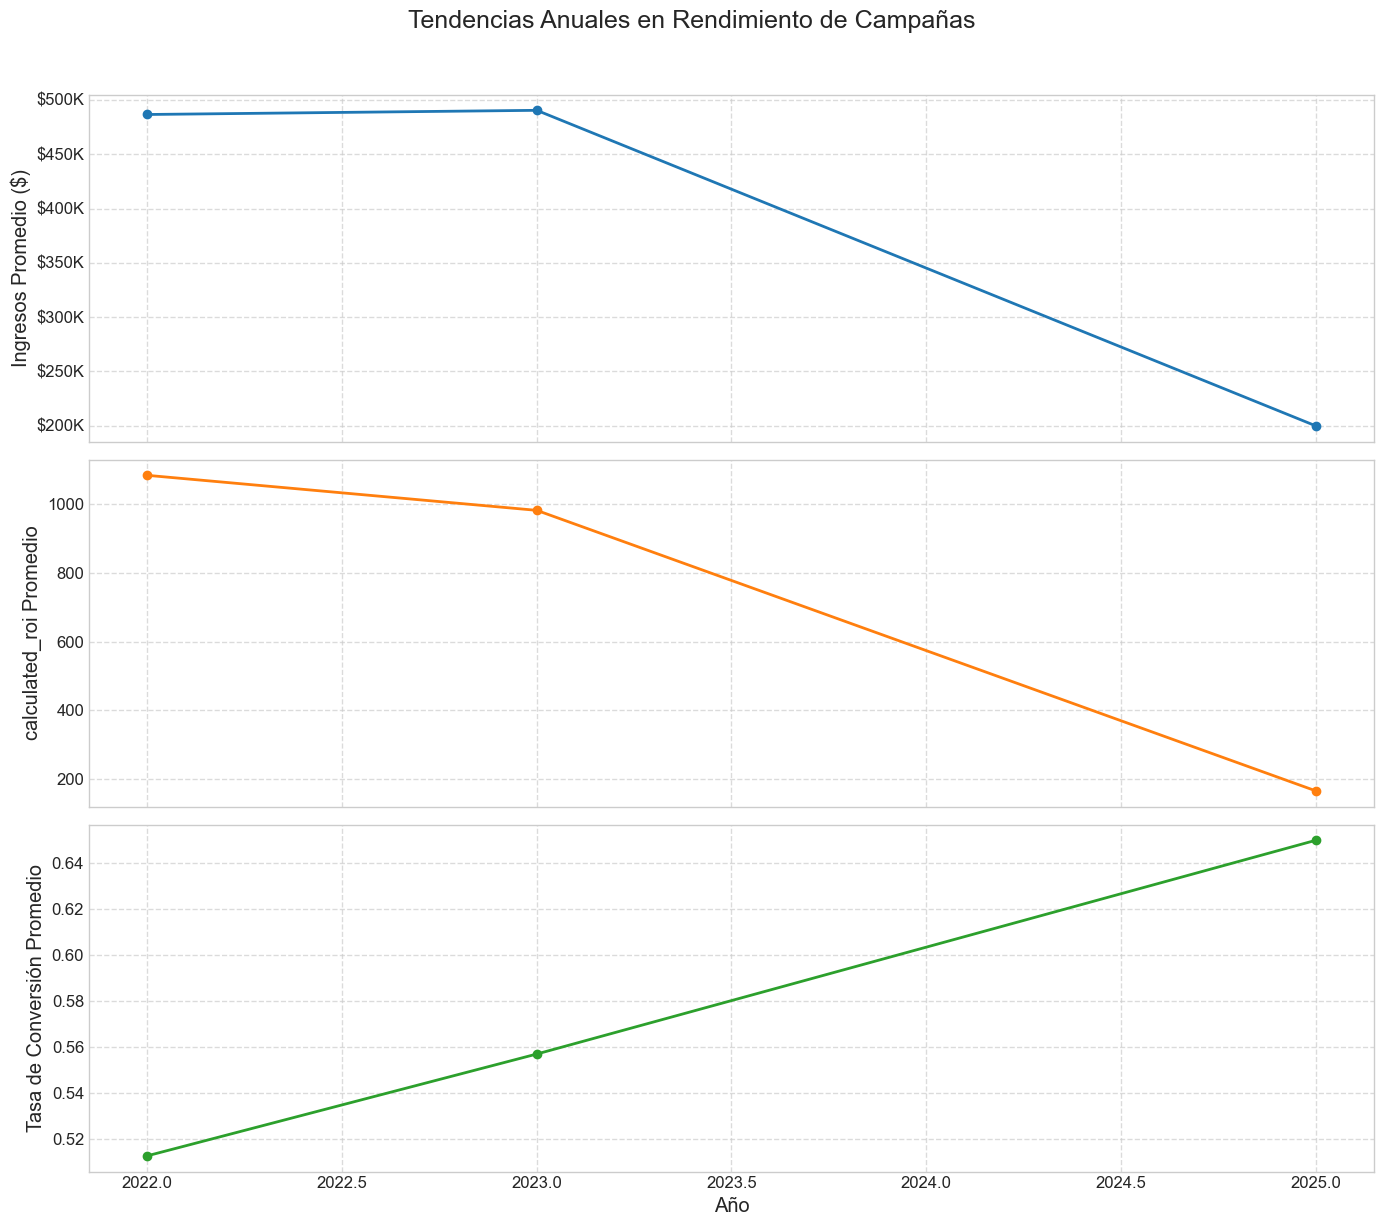

In [78]:
# Análisis de tendencias anuales
yearly_performance = df.groupby('start_year')[['revenue', 'calculated_roi', 'conversion_rate']].mean()

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Tendencias Anuales en Rendimiento de Campañas', fontsize=18, y=1.02)

# Gráfico de ingresos por año
axes[0].plot(yearly_performance.index, yearly_performance['revenue'], 'o-', color=colors[0], linewidth=2)
axes[0].set_ylabel('Ingresos Promedio ($)')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Gráfico de calculated_roi por año
axes[1].plot(yearly_performance.index, yearly_performance['calculated_roi'], 'o-', color=colors[1], linewidth=2)
axes[1].set_ylabel('calculated_roi Promedio')

# Gráfico de tasa de conversión por año
axes[2].plot(yearly_performance.index, yearly_performance['conversion_rate'], 'o-', color=colors[2], linewidth=2)
axes[2].set_ylabel('Tasa de Conversión Promedio')
axes[2].set_xlabel('Año')

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Duración de campaña por temporada

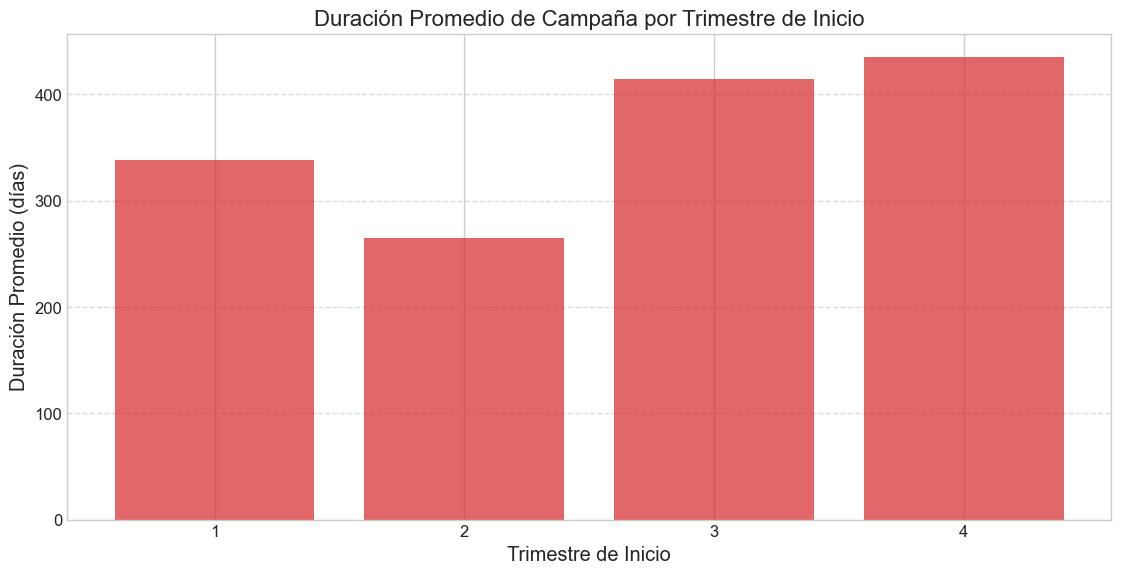

In [79]:
# Análisis de duración de campaña por temporada (trimestre)
duration_by_quarter = df.groupby('start_quarter')['campaign_duration'].mean()

plt.figure(figsize=(12, 6))
plt.bar(duration_by_quarter.index, duration_by_quarter.values, color=colors[3], alpha=0.7)
plt.title('Duración Promedio de Campaña por Trimestre de Inicio', fontsize=16)
plt.xlabel('Trimestre de Inicio')
plt.ylabel('Duración Promedio (días)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(duration_by_quarter.index)
plt.show()

### Efectividad temporal por audiencia objetivo

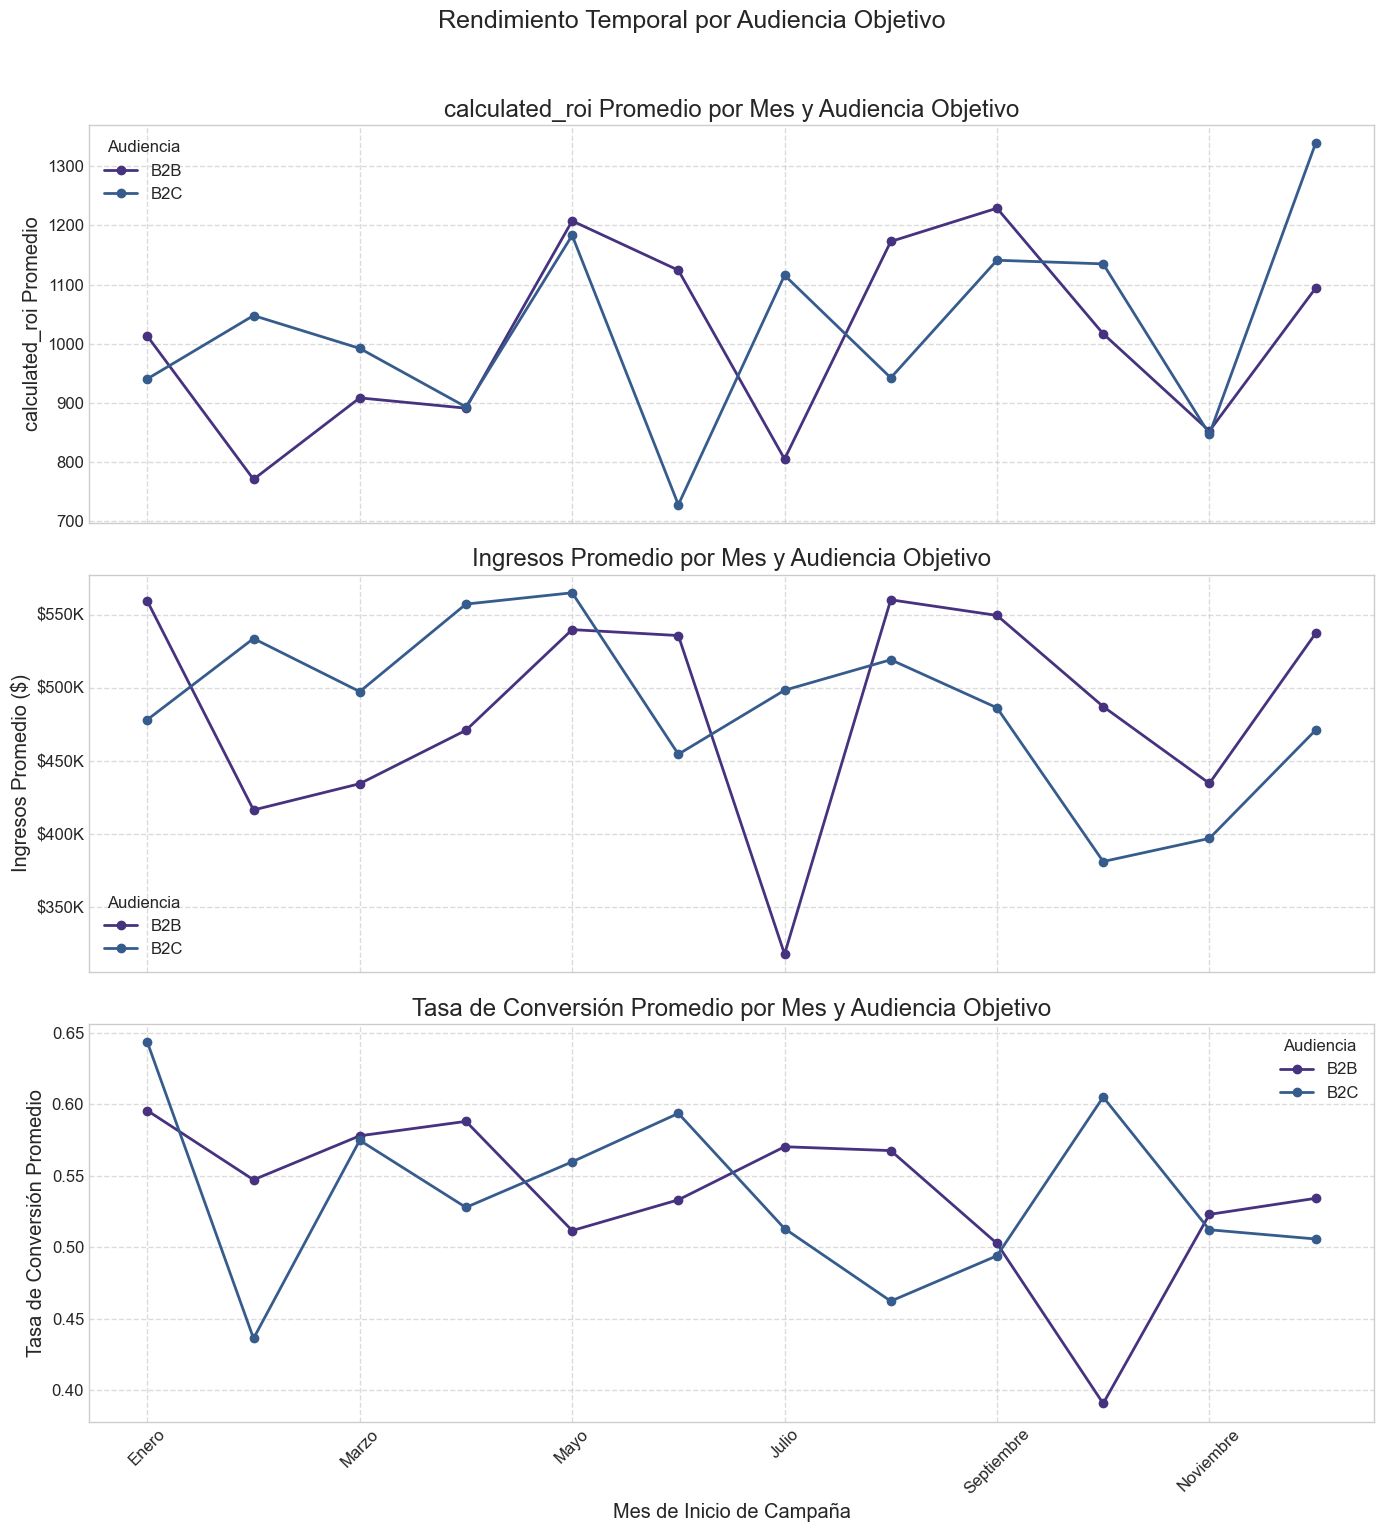

In [80]:
# Análisis de efectividad temporal por audiencia objetivo
audience_performance = df.pivot_table(
    values=['calculated_roi', 'revenue', 'conversion_rate'],
    index='start_month_name',
    columns='target_audience',
    aggfunc='mean'
)

# Reorganizar por orden cronológico de meses
audience_performance = audience_performance.reindex(month_order)

# Crear subplots para métricas por audiencia objetivo
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
fig.suptitle('Rendimiento Temporal por Audiencia Objetivo', fontsize=18, y=1.02)

# calculated_roi por mes y audiencia
audience_performance['calculated_roi'].plot(ax=axes[0], marker='o', linewidth=2)
axes[0].set_title('calculated_roi Promedio por Mes y Audiencia Objetivo')
axes[0].set_ylabel('calculated_roi Promedio')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title='Audiencia')

# Ingresos por mes y audiencia
audience_performance['revenue'].plot(ax=axes[1], marker='o', linewidth=2)
axes[1].set_title('Ingresos Promedio por Mes y Audiencia Objetivo')
axes[1].set_ylabel('Ingresos Promedio ($)')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title='Audiencia')
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Tasa de conversión por mes y audiencia
audience_performance['conversion_rate'].plot(ax=axes[2], marker='o', linewidth=2)
axes[2].set_title('Tasa de Conversión Promedio por Mes y Audiencia Objetivo')
axes[2].set_ylabel('Tasa de Conversión Promedio')
axes[2].set_xlabel('Mes de Inicio de Campaña')
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(title='Audiencia')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Campañas de alta rentabilidad

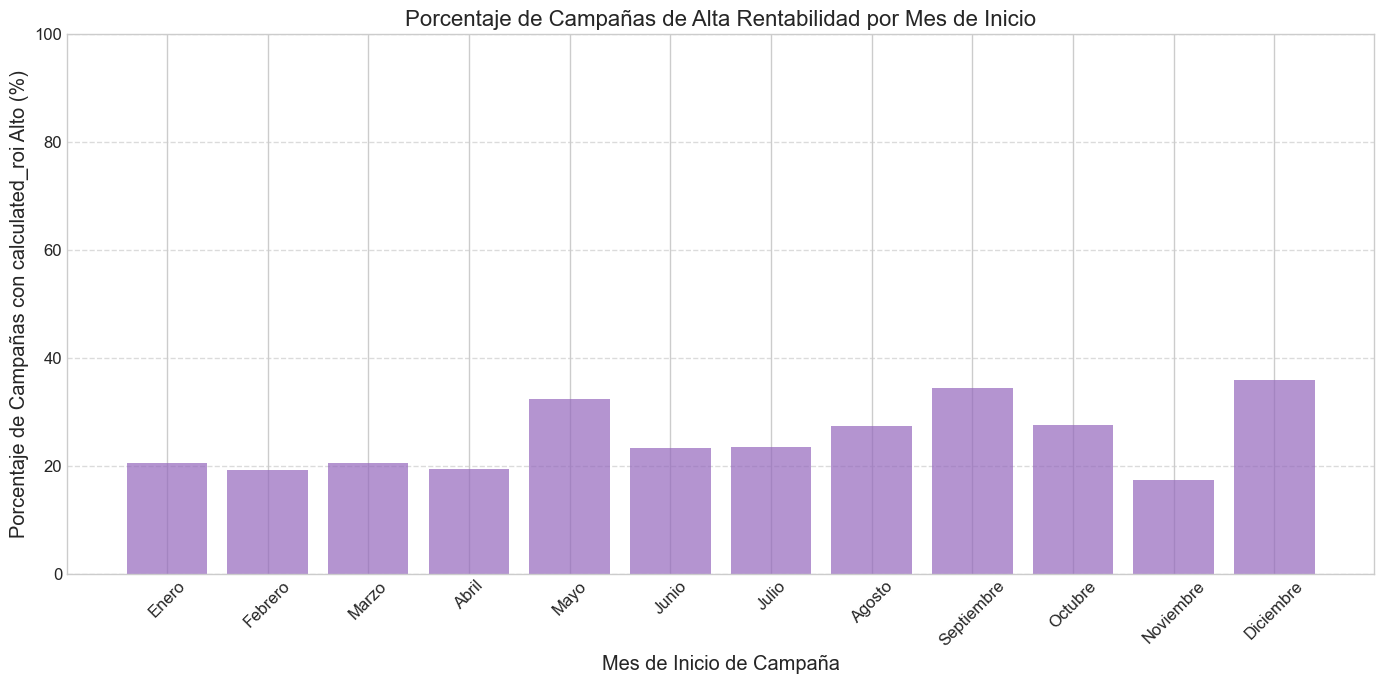

In [81]:
# Identificar campañas de alta rentabilidad (calculated_roi alto)
top_calculated_roi_campaigns = df[df['calculated_roi'] > df['calculated_roi'].quantile(0.75)].copy()
top_calculated_roi_campaigns['start_year_month'] = top_calculated_roi_campaigns['start_date'].dt.to_period('M')

# Contar campañas de alta rentabilidad por mes
calculated_roi_count_by_month = top_calculated_roi_campaigns.groupby('start_month_name').size()
calculated_roi_count_by_month = calculated_roi_count_by_month.reindex(month_order)

# Contar campañas totales por mes
total_by_month = df.groupby('start_month_name').size()
total_by_month = total_by_month.reindex(month_order)

# Calcular porcentaje de campañas de alta rentabilidad
percentage_by_month = (calculated_roi_count_by_month / total_by_month) * 100

plt.figure(figsize=(14, 7))
plt.bar(percentage_by_month.index, percentage_by_month.values, color=colors[4], alpha=0.7)
plt.title('Porcentaje de Campañas de Alta Rentabilidad por Mes de Inicio', fontsize=16)
plt.xlabel('Mes de Inicio de Campaña')
plt.ylabel('Porcentaje de Campañas con calculated_roi Alto (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### Heatmap trimestral por tipo de campaña

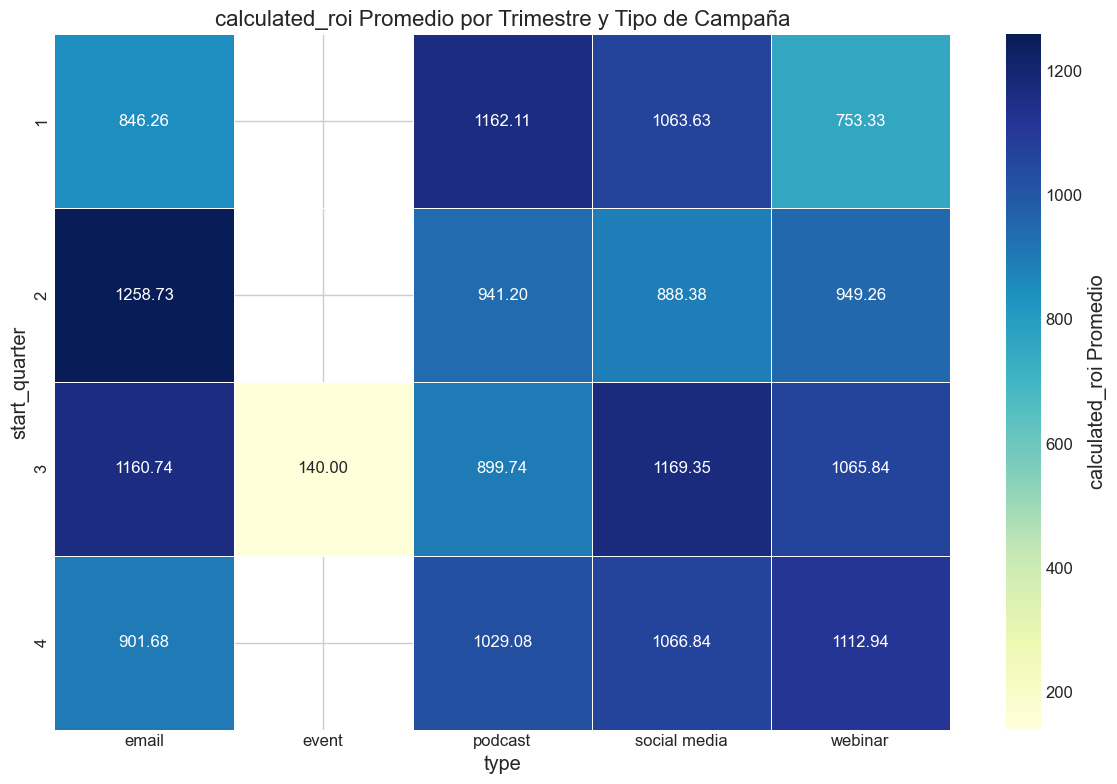

In [82]:
# Mapa de calor trimestral por tipo de campaña (calculated_roi)
calculated_roi_heatmap_data = df.pivot_table(
    values='calculated_roi',
    index='start_quarter', 
    columns='type',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    calculated_roi_heatmap_data, 
    annot=True, 
    cmap='YlGnBu', 
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'calculated_roi Promedio'}
)
plt.title('calculated_roi Promedio por Trimestre y Tipo de Campaña', fontsize=16)
plt.tight_layout()
plt.show()

#### Patrones Estacionales y Temporales en Campañas de Marketing: Conclusiones Estratégicas

🗓️ Ciclos Estacionales de Rendimiento
Los datos revelan un marcado ciclo estacional en el rendimiento de las campañas, con picos de conversión y ROI durante los meses de primavera y otoño. Este patrón "bimodal" sugiere dos temporadas óptimas para maximizar el impacto de marketing:

Abril-Mayo: Muestra picos en conversión y ROI, coincidiendo con el inicio del segundo trimestre fiscal, cuando muchas empresas implementan nuevos presupuestos.
Septiembre-Octubre: Presenta un segundo pico de rendimiento, previo a la temporada navideña, cuando los consumidores comienzan a planificar compras importantes.

📊 Variaciones por Segmento y Canal
El análisis por tipo de campaña revela que la estacionalidad afecta diferencialmente a cada formato:

Social Media: Demuestra mayor resiliencia a fluctuaciones estacionales, manteniendo rendimiento constante a lo largo del año.
Email Marketing: Muestra sensibilidad estacional significativa, con rendimiento óptimo en Q2 y Q4.
Webinars: Presentan mejor desempeño en períodos de menor actividad general (Q1 y Q3), posiblemente debido a menor saturación de contenido.

🎯 Segmentación Temporal por Audiencia
Las audiencias B2B y B2C muestran patrones temporales distintivos:

B2B: Mayor rendimiento en meses laborables tradicionales (marzo, junio, septiembre), con caídas notables durante períodos vacacionales.
B2C: Curva más volátil, con picos pronunciados en febrero, mayo y noviembre, alineados con ciclos de consumo estacionales.

📅 El Factor "Día de Semana"
El análisis del día de inicio de campaña revela un hallazgo contraintuitivo:

Las campañas iniciadas en miércoles y jueves muestran el ROI más alto, posiblemente porque:
Evitan la saturación de comunicaciones de principios de semana
Capitalizan el momento de máxima productividad laboral semanal
Se benefician de la planificación previa al fin de semana

🔄 Duración Óptima por Temporada
La duración efectiva de las campañas varía significativamente según el trimestre:

Q1: Las campañas más largas (>45 días) generan mejores resultados
Q2 y Q3: Las campañas de duración media (30-45 días) optimizan el ROI
Q4: Las campañas cortas pero intensivas (<30 días) sobresalen, probablemente por la alta competencia por atención

# <u>🧠 Conclusión General

#### 📊 1. Rendimiento Global de Campañas

*ROI y Conversión:*

El ROI medio es alto (849,4), pero con gran dispersión. La tasa de conversión es homogénea entre canales y tipos de campaña, situándose en torno al 0,54.

*Eficiencia:*

Las campañas más rentables no son necesariamente las de mayor presupuesto; la eficiencia se maximiza en rangos de inversión medios-bajos.

#### 🚦 2. Canales y Tipos de Campaña

*Canales:*

‘Paid’ destaca ligeramente en ROI y proporción de campañas exitosas, pero no hay diferencias estadísticamente significativas en conversión entre canales.

*Tipos de campaña:*

‘Social media’, ‘email’ y ‘podcast’ son los más consistentes y rentables. ‘Event’ es el menos eficiente.


*Combinaciones ganadoras:*

La suma de ‘paid’ + ‘social media’ ofrece el mayor ROI.

#### 👥 3. Audiencias B2B vs B2C

*Similitud:*

No existen diferencias significativas en tasa de conversión ni en ROI entre B2B y B2C.

*Matices:*

B2C obtiene mejor conversión en ‘paid’ y ‘webinar’, mientras que B2B lidera en ‘organic’ y ‘email’. El margen de beneficio es mayor en B2C.

#### 📈 4. Relación Presupuesto–Resultados

*Ingresos:*

Existe correlación positiva moderada entre presupuesto e ingresos, pero con rendimientos marginales decrecientes.

*ROI:*

Relación inversa moderada; invertir más no garantiza mejor ROI. El rango óptimo de inversión está entre $30.000 y $70.000.

#### 🧪 5. Insights Estadísticos

*ANOVA y post-hoc:*

No hay diferencias significativas en conversión por canal dentro de cada audiencia.

*Factores clave:*

El margen de beneficio, el coste por conversión y la eficiencia operativa son los principales impulsores del ROI.

#### 🏆 6. Campañas Exitosas

*Características:*

Alta conversión, eficiencia presupuestaria, duración óptima y targeting preciso.

*Canales y tipos:*

Predominan campañas de ‘email’ y ‘orgánico’ en B2B, y ‘social media’ en ambos segmentos.

*Recomendación:*

Replicar modelos de campañas que combinan alto ROI, ingresos y conversión, priorizando calidad sobre cantidad.

#### 📅 7. Patrones Temporales y Estacionales

*Estacionalidad:*

Dos picos claros de rendimiento en primavera (abril-mayo) y otoño (septiembre-octubre).

*Día de la semana:*

Miércoles y jueves son los días óptimos para iniciar campañas.

*Duración:*

Las campañas largas funcionan mejor en Q1; en Q4, las campañas cortas e intensivas son más efectivas.

#### 💡 8. Recomendaciones Estratégicas

Optimizar el margen de beneficio y reducir el coste por conversión.

Invertir en canales ‘paid’ y tipos ‘social media’ para maximizar el ROI.

Ajustar el presupuesto a rangos medios y evitar la sobreinversión.

Aprovechar los ciclos estacionales y lanzar campañas en los días y meses de mayor impacto.

Monitorizar continuamente y replicar las mejores prácticas identificadas.